## Prédiction du prix de l'or à (Gold ETF) 

#### L'étude consiste prédire avec précision le futur cours de clôture ajusté de l'ETF Gold sur une période donnée dans le futur.

     Le Dataset soumis à notre étude comporte:
     1718 lignes
     80 colonnes
     
     les variables soumise a l'étude sont:
     
     1)les attributs concernant l'or (Gold ETF) :
     -open
     -high
     -low
     -close
     -Adj close <<==>> Variable cible (tagret) 
     
     2)les attributs concernats les indices pouvant intervenir sur le court de l'or:
     
     - L'indice S&P 500 concernant les 500 plus grandes entreprises aux Etats Unis : 'SPopen', 'SPhigh', 'SPlow', 'SPclose', 'SPAjclose', 'SPvolume' 
     
     -Des taux des obligations américaines : 'DJopen','DJhigh', 'DJlow', 'DJclose', 'DJAjclose', 'DJvolume ' de l'indice Dow Jones , 
     
     -L'Eldorado Gold Corporation (EGO): 'EGopen', 'EGhigh', 'EGlow', 'EGclose', 'EGAjclose', 'EGvolume' 
     
     -Le taux de change EUR USD'EUPrice', 'EUopen', 'EUhigh', ' EUlow', 'EUTrend' 
     
     -Les contrats à terme sur le pétrole brut Brent :'OFPrice', 'OFOpen', 'OFHigh', 'OFLow', 'OFVolume', 'OFTrend' 
     
     -Le prix  pétrole brut WTI USD : 'OSPrice', 'OSOpen', ' OSHigh', 'OSLow', 'OSTrend',  
     
     - de Silver Futures(Contrat a termes) : 'SFPrice', 'SFOpen', 'SFHigh', 'SFlow', 'SFVolume', 'SFTrend' 
     
     -Le taux des obligations américaines: 'USBPrice', 'USBOpen ', 'USBHigh', 'USBLow', 'USBTrend',
     
     -Le du prix du platine : 'PLTPrice', 'PLTOpen', 'PLTHigh', 'PLTLow', 'PLTTrend',
     
     -Le du prix du palladium : 'PLDPrice', 'PLDOpen', 'PLDHigh', 'PLDLow', 'PLDTrend' 
     -Le des prix du rhodium : 'RHOPRICE'
     
     -Le prix de l'indice du dollar américain : 'USDIPrice', 'USDIOpen', 'USDIHigh', 'USDILow', 'USDIVolume', 'USDITrend'
     
     -L'ETF Gold Miners: 'GDXOpen', 'GDXHigh', 'GDXLow', 'GDXClose', 'GDXAdj Close', 'GDXVoVlume', 
     
     - L'ETF pétrolier USO : 'USOOpen', 'USOHigh', 'USOLow', 'USOClose', 'USOAdj Close', 'USOVolume'

### Le projet se déclinant en deux grandes phases
      1)Analyse Exploratoire.
      
      2)Modélisation et Prédiction.
      
     
      l'éssentiel du travail dans un premier temps sera axé sur l'Analyse Exploratoire.
     

### 1) Analyse Exploratoire

In [2]:
#importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
#import dataprep

from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt
import statsmodels.api as sm 

from statsmodels.tsa.stattools import adfuller, kpss

import warnings

sns.set()
warnings.filterwarnings("ignore")

In [3]:
#Optimisation pour un affichage minimale des lignes et colonnes du Dataframes(changements de valeurs minimales par defaut)
 
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_column', 80)

In [4]:
#importation du Dataframe
df=pd.read_csv('FINAL_USO.csv',sep=',', date_parser=["Date"])
df.head(3)

Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   

     Volume     SP_open     SP_high      SP_low    SP_close  SP_Ajclose  \
0  21521900  123.029999  123.199997  121.989998  122.180000  105.441238   
1  18124300  122.230003  122.949997  121.300003  121.589996  105.597549   
2  12547200  122.059998  122.320000  120.029999  120.290001  104.468536   

   SP_volume      DJ_open      DJ_high       DJ_low     DJ_close   DJ_Ajclose  \
0  199109200  11825.29004  11967.83984  11825.21973  11868.80957  11868.80957   
1  220481400  11870.25000  11968.17969  11819.30957  11866.38965  11866.38965   
2  183903000  11866.54004  11925.87988  11735.19043  11766.25977  11766.25977   

   DJ_volume    EG_open    EG_high     EG_low   EG_close  EG_Ajclose  \
0  136930000  74.550003  76.150002  72.150002  72.900002   70.431755   
1  389520000  73.599998  75.099998  73.349998  74.900002   72.364037   
2  135170000  69.099998  69.800003  64.199997  64.699997   62.509384   

   EG_volume  EU_Price  EU_open  EU_high  EU_low  EU_Trend  OF_Price  OF_Open  \
0     787900    1.3018   1.2982   1.3051  1.2957         1    105.09   104.88   
1     896600    1.3035   1.3020   1.3087  1.2997         1    103.35   103.51   
2    2096700    1.2995   1.3043   1.3044  1.2981         0    103.64   103.63   

   OF_High  OF_Low  OF_Volume  OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  \
0   106.50  104.88      14330         1     93.42    94.91    96.00   93.33   
1   104.56  102.46     140080         0     93.79    93.43    94.80   92.53   
2   104.57  102.37     147880         1     94.09    93.77    94.43   92.55   

   ...  SF_Price  SF_Open  SF_High  SF_Low  SF_Volume  SF_Trend  USB_Price  \
0  ...     53604    54248    54248   52316     119440         1      1.911   
1  ...     53458    53650    54030   52890      65390         0      1.851   
2  ...     52961    53400    53400   52544      67280         0      1.810   

   USB_Open  USB_High  USB_Low  USB_Trend  PLT_Price  PLT_Open  PLT_High  \
0     1.911     1.911    1.911          1    1414.65   1420.30   1423.35   
1     1.851     1.851    1.851          0    1420.25   1414.75   1431.75   
2     1.810     1.810    1.810          0    1411.10   1422.65   1427.60   

   PLT_Low  PLT_Trend  PLD_Price  PLD_Open  PLD_High  PLD_Low  PLD_Trend  \
0  1376.85          0     618.85     614.7    615.00    614.6          1   
1  1400.70          1     623.65     622.6    623.45    622.3          1   
2  1404.60          0     608.80     626.0    630.00    608.6          0   

   RHO_PRICE  USDI_Price  USDI_Open  USDI_High  USDI_Low  USDI_Volume  \
0       1425      80.341     80.565     80.630    80.130        22850   
1       1400      80.249     80.175     80.395    79.935        13150   
2       1400      80.207     80.300     80.470    80.125          970   

   USDI_Trend   GDX_Open   GDX_High    GDX_Low  GDX_Close  GDX_Adj Close  \
0           0  53.009998  53.139999  51.570000  51.680000      48.973877   
1           0  52.500000  53.180000  52.040001  52.680000      49.921513   
2           0  52.490002  52.549999  51.029999  51.169998      48.490578   

   GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  USO_Adj Close  \
0    20605600  36.900002  36.939999  36.049999  36.130001      36.130001   
1    16285400  36.180000  36.500000  35.730000  36.270000      36.270000   
2    15120200  36.389999  36.450001  35.930000  36.200001      36.200001   

   USO_Volume  
0    12616700  
1    12578800  
2     7418200  

[3 rows x 81 columns]

In [5]:
# Determination des différents types de variables, ici on remaque que le dataframe n'est pas enregistré en tant que Dataframe de serie temporelle.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [6]:
#Conversion de la variable "Date" en type date pour les séries temporelles
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
#Positionnement de la variable "Date" en tant que index du Dataframe
df = df.set_index("Date")
df.head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

              Volume     SP_open     SP_high      SP_low    SP_close  \
Date                                                                   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998   

            SP_Ajclose  SP_volume      DJ_open      DJ_high       DJ_low  \
Date                                                                       
2011-12-15  105.441238  199109200  11825.29004  11967.83984  11825.21973   
2011-12-16  105.597549  220481400  11870.25000  11968.17969  11819.30957   
2011-12-19  104.468536  183903000  11866.54004  11925.87988  11735.19043   
2011-12-20  107.629784  225418100  11769.20996  12117.12988  11768.83008   
2011-12-21  107.838242  194230900  12103.58008  12119.70020  11999.44043   

               DJ_close   DJ_Ajclose  DJ_volume    EG_open    EG_high  \
Date                                                                    
2011-12-15  11868.80957  11868.80957  136930000  74.550003  76.150002   
2011-12-16  11866.38965  11866.38965  389520000  73.599998  75.099998   
2011-12-19  11766.25977  11766.25977  135170000  69.099998  69.800003   
2011-12-20  12103.58008  12103.58008  165180000  66.449997  68.099998   
2011-12-21  12107.74023  12107.74023  163250000  67.099998  69.400002   

               EG_low   EG_close  EG_Ajclose  EG_volume  EU_Price  EU_open  \
Date                                                                         
2011-12-15  72.150002  72.900002   70.431755     787900    1.3018   1.2982   
2011-12-16  73.349998  74.900002   72.364037     896600    1.3035   1.3020   
2011-12-19  64.199997  64.699997   62.509384    2096700    1.2995   1.3043   
2011-12-20  66.000000  67.000000   64.731514     875300    1.3079   1.3003   
2011-12-21  66.900002  68.500000   66.180725     837600    1.3045   1.3079   

            EU_high  EU_low  EU_Trend  OF_Price  OF_Open  OF_High  OF_Low  \
Date                                                                        
2011-12-15   1.3051  1.2957         1    105.09   104.88   106.50  104.88   
2011-12-16   1.3087  1.2997         1    103.35   103.51   104.56  102.46   
2011-12-19   1.3044  1.2981         0    103.64   103.63   104.57  102.37   
2011-12-20   1.3133  1.2994         1    106.73   104.30   107.27  103.91   
2011-12-21   1.3197  1.3024         0    107.71   107.15   108.17  106.16   

            OF_Volume  OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  OS_Trend  \
Date                                                                            
2011-12-15      14330         1     93.42    94.91    96.00   93.33         0   
2011-12-16     140080         0     93.79    93.43    94.80   92.53         1   
2011-12-19     147880         1     94.09    93.77    94.43   92.55         1   
2011-12-20     170240         1     95.55    96.39    99.70   96.39         1   
2011-12-21     145090         1     99.01    97.54    99.26   96.81         1   

            SF_Price  SF_Open  SF_High  SF_Low  SF_Volume  SF_Trend  \
Date                                                                  
2011-12-15     53604    54248    54248   52316     119440         1   
2011-12-16     53458    53650    54030   52890      65390         0   
2011-12-19

In [8]:
# Visualisation des infos du  DataFrame, on constate une dataframe de serie temporelle 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

### Identification de la target
#### Adj close <<==>> Variable cible (tagret)

In [9]:
#dimension du dataframe
df.shape

(1718, 80)

### Identification des valeurs manquantes

In [10]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64

In [11]:
df1 = df.replace(" ?", np.NaN)

In [12]:
#Visualisation détaillée des valeurs manquantes pour chaque variables
a=df1.isna().sum()
for i in range(len(a.index)):
    print(a.index[i],"      ",a[i])

Open        0
High        0
Low        0
Close        0
Adj Close        0
Volume        0
SP_open        0
SP_high        0
SP_low        0
SP_close        0
SP_Ajclose        0
SP_volume        0
DJ_open        0
DJ_high        0
DJ_low        0
DJ_close        0
DJ_Ajclose        0
DJ_volume        0
EG_open        0
EG_high        0
EG_low        0
EG_close        0
EG_Ajclose        0
EG_volume        0
EU_Price        0
EU_open        0
EU_high        0
EU_low        0
EU_Trend        0
OF_Price        0
OF_Open        0
OF_High        0
OF_Low        0
OF_Volume        0
OF_Trend        0
OS_Price        0
OS_Open        0
OS_High        0
OS_Low        0
OS_Trend        0
SF_Price        0
SF_Open        0
SF_High        0
SF_Low        0
SF_Volume        0
SF_Trend        0
USB_Price        0
USB_Open        0
USB_High        0
USB_Low        0
USB_Trend        0
PLT_Price        0
PLT_Open        0
PLT_High        0
PLT_Low        0
PLT_Trend        0
PLD_Price        0
PLD_O

##### On peut conclure que notre  Dataframe ne conteint pas de valeurs manquantes

###### La prix de l'or tenant compte des facteurs exogènes liés au prix des autres indices boursiers des prix des matières premières brut ou transformées sur le marché, ainsi  pour les autres  indices boursiers, nous allons conserver le prix ajusté à la fermeture et le prix du jour des autre matériaux a la ferméture du marché (l'ensemble des autres composantes de chaque blocs devant conduire à la détermination du prix a la ferméture du marché)

In [13]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

In [14]:
###Constitution du nouveau DataFrame, pour l'ETF Gold, nous conserverons les valeurs 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume' afin d'afiner l'analyse :
df2=df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price','OS_Price','SF_Price','USB_Price','PLT_Price','PLD_Price','RHO_PRICE','USDI_Price','GDX_Adj Close','USO_Adj Close']]
df2

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...                ...         ...         ...         ...         ...   
2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

              Volume  SP_Ajclose   DJ_Ajclose  EG_Ajclose  EU_Price  OF_Price  \
Date                                                                            
2011-12-15  21521900  105.441238  11868.80957   70.431755    1.3018    105.09   
2011-12-16  18124300  105.597549  11866.38965   72.364037    1.3035    103.35   
2011-12-19  12547200  104.468536  11766.25977   62.509384    1.2995    103.64   
2011-12-20   9136300  107.629784  12103.58008   64.731514    1.3079    106.73   
2011-12-21  11996100  107.838242  12107.74023   66.180725    1.3045    107.71   
...              ...         ...          ...         ...       ...       ...   
2018-12-24   9736400  234.339996  21792.19922    2.950000    1.1400     50.47   
2018-12-26  14293500  246.179993  22878.44922    3.000000    1.1353     54.47   
2018-12-27  11874400  248.070007  23138.82031    2.950000    1.1430     52.16   
2018-12-28   6864700  247.750000  23062.40039    2.900000    1.1438     52.20   
2018-12-31   8449400  249.919998  23327.46094    2.880000    1.1470     53.80   

            OS_Price  SF_Price  USB_Price  PLT_Price  PLD_Price  RHO_PRICE  \
Date                                                                         
2011-12-15     93.42     53604      1.911    1414.65     618.85       1425   
2011-12-16     93.79     53458      1.851    1420.25     623.65       1400   
2011-12-19     94.09     52961      1.810    1411.10     608.80       1400   
2011-12-20     95.55     53487      1.927    1434.75     626.65       1400   
2011-12-21     99.01     53148      1.970    1429.05     635.90       1400   
...              ...       ...        ...        ...        ...        ...   
2018-12-24     42.27     37541      2.736     788.40    1172.80       2480   
2018-12-26     46.39     38253      2.810     799.25    1190.10       2480   
2018-12-27     45.23     38690      2.774     795.50    1196.00       2470   
2018-12-28     44.92     38706      2.716     790.25    1185.20       2460   
2018-12-31     45.00     38821      2.686     801.40    1197.50          0   

            USDI_Price  GDX_Adj Close  USO_Adj Close  
Date                                                  
2011-12-15      80.341      48.973877      36.130001  
2011-12-16      80.249      49.921513      36.270000  
2011-12-19      80.207      48.490578      36.200001  
2011-12-20      80.273      50.215282      37.560001  
2011-12-21      80.350      50.186852      38.110001  
...                ...            ...            ...  
2018-12-24      96.007      21.090000       9.290000  
2018-12-26      96.568      20.620001       9.900000  
2018-12-27      96.001      20.969999       9.620000  
2018-12-28      95.965      20.600000       9.530000  
2018-12-31      95.735      21.090000       9.660000  

[1718 rows x 20 columns]

In [15]:
###Constitution DataFrame des prix des indices boursiers,matériaux et matières premières a la clôture du marché:
df3=df2[['Adj Close','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price','OS_Price','SF_Price','USB_Price','PLT_Price','PLD_Price','RHO_PRICE','USDI_Price','GDX_Adj Close','USO_Adj Close']]
df3

Adj Close  SP_Ajclose   DJ_Ajclose  EG_Ajclose  EU_Price  \
Date                                                                    
2011-12-15  152.330002  105.441238  11868.80957   70.431755    1.3018   
2011-12-16  155.229996  105.597549  11866.38965   72.364037    1.3035   
2011-12-19  154.869995  104.468536  11766.25977   62.509384    1.2995   
2011-12-20  156.979996  107.629784  12103.58008   64.731514    1.3079   
2011-12-21  157.160004  107.838242  12107.74023   66.180725    1.3045   
...                ...         ...          ...         ...       ...   
2018-12-24  120.019997  234.339996  21792.19922    2.950000    1.1400   
2018-12-26  119.660004  246.179993  22878.44922    3.000000    1.1353   
2018-12-27  120.570000  248.070007  23138.82031    2.950000    1.1430   
2018-12-28  121.059998  247.750000  23062.40039    2.900000    1.1438   
2018-12-31  121.250000  249.919998  23327.46094    2.880000    1.1470   

            OF_Price  OS_Price  SF_Price  USB_Price  PLT_Price  PLD_Price  \
Date                                                                        
2011-12-15    105.09     93.42     53604      1.911    1414.65     618.85   
2011-12-16    103.35     93.79     53458      1.851    1420.25     623.65   
2011-12-19    103.64     94.09     52961      1.810    1411.10     608.80   
2011-12-20    106.73     95.55     53487      1.927    1434.75     626.65   
2011-12-21    107.71     99.01     53148      1.970    1429.05     635.90   
...              ...       ...       ...        ...        ...        ...   
2018-12-24     50.47     42.27     37541      2.736     788.40    1172.80   
2018-12-26     54.47     46.39     38253      2.810     799.25    1190.10   
2018-12-27     52.16     45.23     38690      2.774     795.50    1196.00   
2018-12-28     52.20     44.92     38706      2.716     790.25    1185.20   
2018-12-31     53.80     45.00     38821      2.686     801.40    1197.50   

            RHO_PRICE  USDI_Price  GDX_Adj Close  USO_Adj Close  
Date                                                             
2011-12-15       1425      80.341      48.973877      36.130001  
2011-12-16       1400      80.249      49.921513      36.270000  
2011-12-19       1400      80.207      48.490578      36.200001  
2011-12-20       1400      80.273      50.215282      37.560001  
2011-12-21       1400      80.350      50.186852      38.110001  
...               ...         ...            ...            ...  
2018-12-24       2480      96.007      21.090000       9.290000  
2018-12-26       2480      96.568      20.620001       9.900000  
2018-12-27       2470      96.001      20.969999       9.620000  
2018-12-28       2460      95.965      20.600000       9.530000  
2018-12-31          0      95.735      21.090000       9.660000  

[1718 rows x 15 columns]

### Visualisation de la variable cible :

In [16]:
df4=df2[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
df4.rename(columns={"Adj Close": "Adj_Close"},inplace=True)
df4

Open        High         Low       Close   Adj_Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...                ...         ...         ...         ...         ...   
2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

              Volume  
Date                  
2011-12-15  21521900  
2011-12-16  18124300  
2011-12-19  12547200  
2011-12-20   9136300  
2011-12-21  11996100  
...              ...  
2018-12-24   9736400  
2018-12-26  14293500  
2018-12-27  11874400  
2018-12-28   6864700  
2018-12-31   8449400  

[1718 rows x 6 columns]

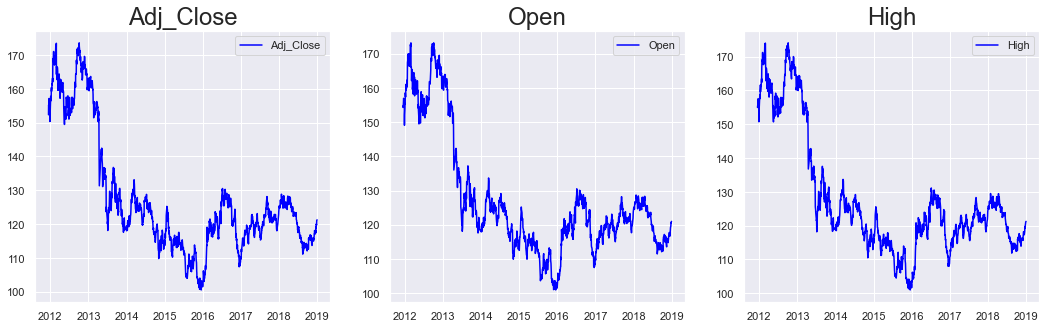

In [17]:
#visualisation des différentes variables 
plt.rcParams["figure.figsize"] = (18, 5)

fig, ax = plt.subplots(1, 3)

ax[0].plot(df4.Adj_Close, color = "blue", label = "Adj_Close")
ax[0].set_title("Adj_Close", size = 24)
ax[0].legend()

ax[1].plot(df4.Open, color = "blue", label = "Open")
ax[1].set_title("Open", size = 24)
ax[1].legend()

ax[2].plot(df4.High, color = "blue", label = "High")
ax[2].set_title("High", size = 24)
ax[2].legend()

plt.show()

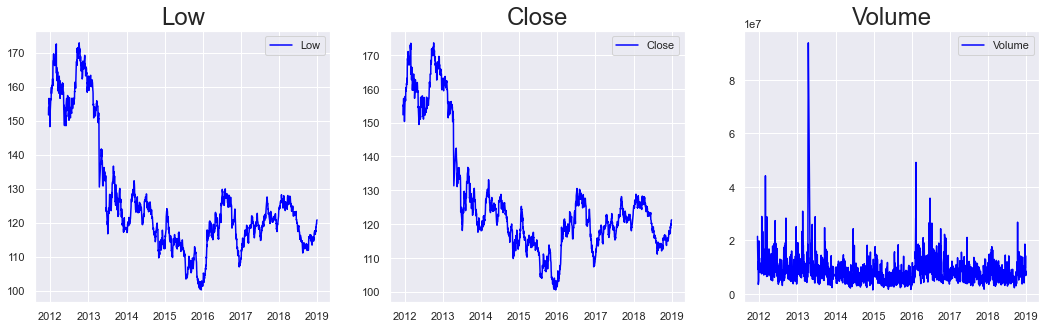

In [18]:
#visualisation des différentes variables 
plt.rcParams["figure.figsize"] = (18, 5)

fig, ax = plt.subplots(1, 3)

ax[0].plot(df4.Low, color = "blue", label = "Low")
ax[0].set_title("Low", size = 24)
ax[0].legend()

ax[1].plot(df4.Close, color = "blue", label = "Close")
ax[1].set_title("Close", size = 24)
ax[1].legend()

ax[2].plot(df4.Volume, color = "blue", label = "Volume")
ax[2].set_title("Volume", size = 24)
ax[2].legend()

plt.show()

#### le graphe des variables 'Open', 'High', 'Low', 'Close', 'Adj_Close' étant les même sur le période 2012-2019, elles apportent donc le meme niveaux d'information. 
#### l'on va donc conserver les variables 'Adj_Close' et 'Volume' comme variables caractéristiques de l'ETF Gold pour la suite de l'analyse.

In [19]:
#Mise a jour du dataset relatif à l'ETF Gold
df4=df4.drop(['Open', 'High', 'Low', 'Close'],axis=1)
df4

Adj_Close    Volume
Date                            
2011-12-15  152.330002  21521900
2011-12-16  155.229996  18124300
2011-12-19  154.869995  12547200
2011-12-20  156.979996   9136300
2011-12-21  157.160004  11996100
...                ...       ...
2018-12-24  120.019997   9736400
2018-12-26  119.660004  14293500
2018-12-27  120.570000  11874400
2018-12-28  121.059998   6864700
2018-12-31  121.250000   8449400

[1718 rows x 2 columns]

<AxesSubplot:xlabel='Date'>

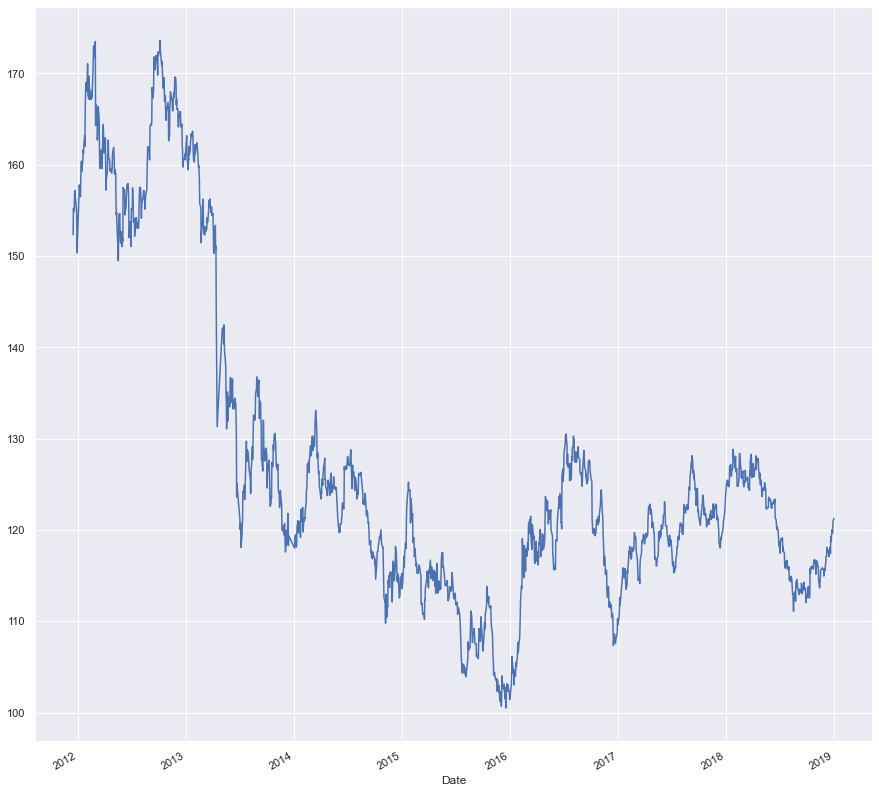

In [20]:
# visualisation de la variable cible("Adj Close") sur la période 2011-2019
plt.figure(figsize=(15, 15))
df4["Adj_Close"].plot()

### Visualisation de la variable cible sur les différentes périodes (semaines, mois, trimestre, semestre et annuel en utilisant le lissage par moyenne mobile) afin d'observer les différentes tendances :

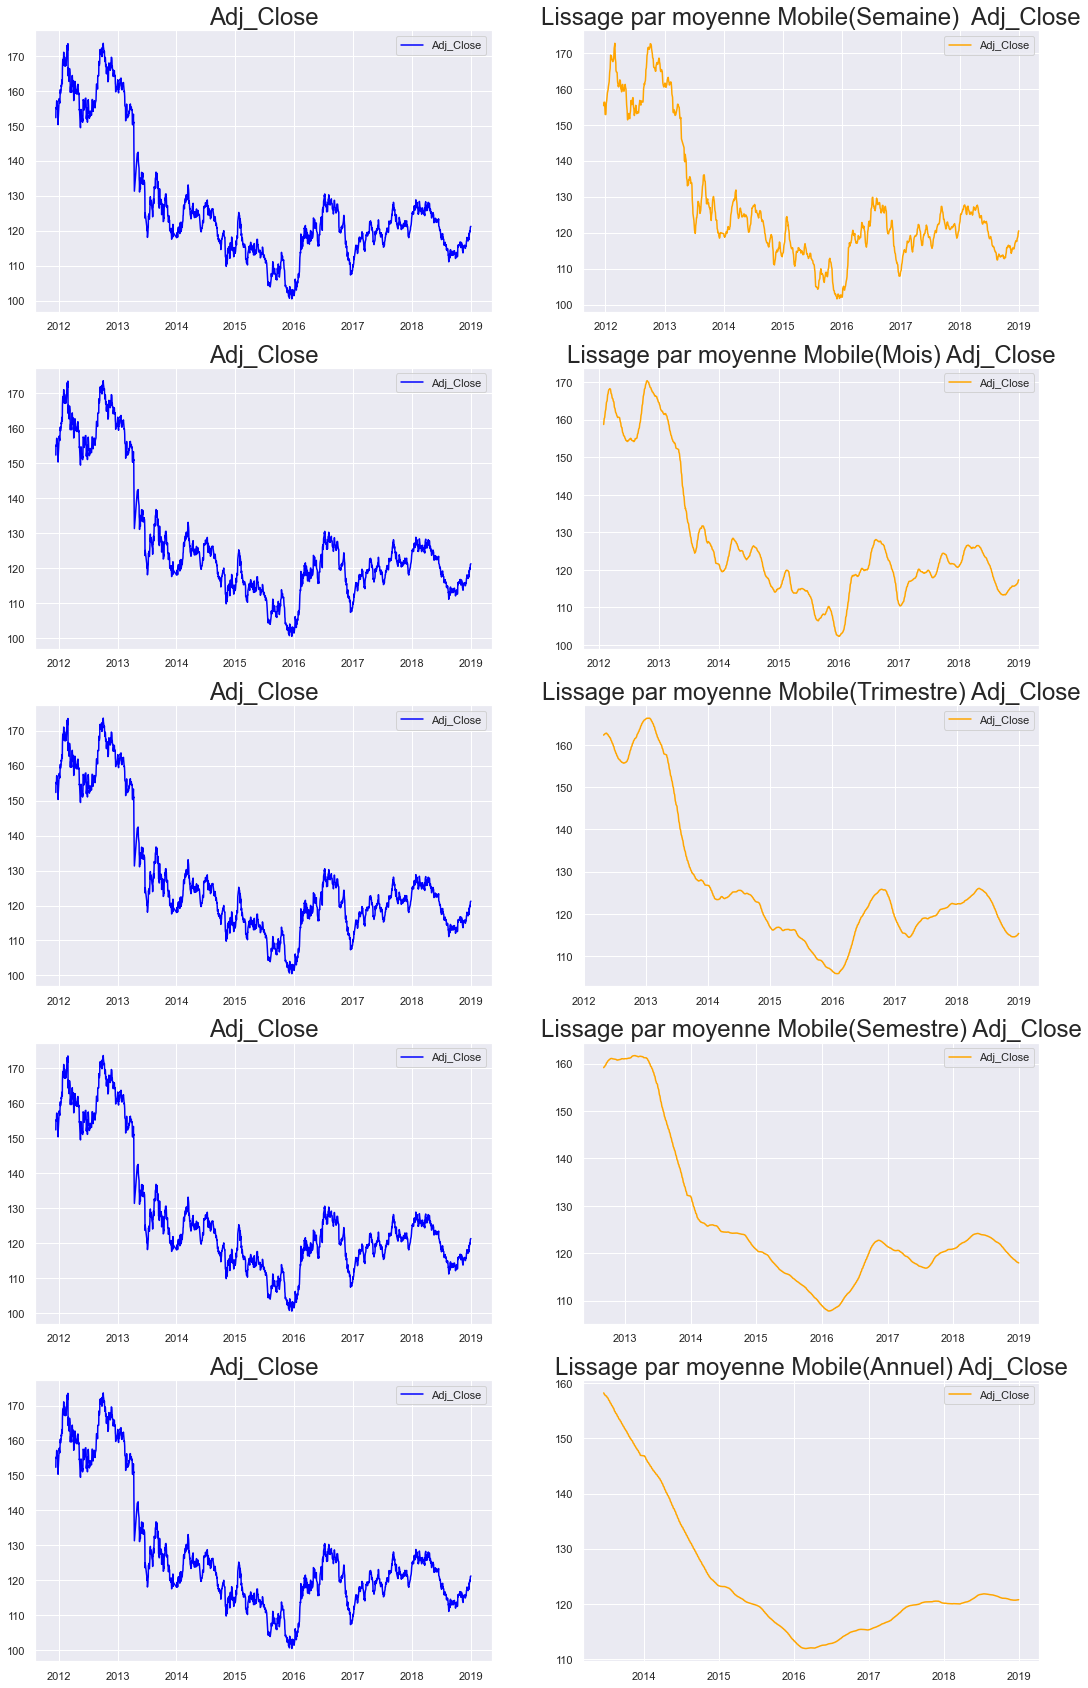

In [21]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

#visuamisation par semaine (Window = 5) 
ax[0, 0].plot(df4.Adj_Close, color = "blue", label = "Adj_Close")
ax[0, 0].set_title("Adj_Close", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(df4.Adj_Close.rolling(window=5).mean(), color = "orange", label = "Adj_Close")
ax[0, 1].set_title("Lissage par moyenne Mobile(Semaine)  Adj_Close", size = 24)
ax[0, 1].legend()


# visualisation par mois (Window = 30)
ax[1, 0].plot(df4.Adj_Close, color = "blue", label = "Adj_Close")
ax[1, 0].set_title("Adj_Close", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(df4.Adj_Close.rolling(window=30).mean(), color = "orange", label = "Adj_Close")
ax[1, 1].set_title("Lissage par moyenne Mobile(Mois) Adj_Close", size = 24)
ax[1, 1].legend()


# Visualisation par trimestre (Window = 5)
ax[2, 0].plot(df4.Adj_Close, color = "blue", label = "Adj_Close")
ax[2, 0].set_title("Adj_Close", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(df4.Adj_Close.rolling(window=90).mean(), color = "orange", label = "Adj_Close")
ax[2, 1].set_title("Lissage par moyenne Mobile(Trimestre) Adj_Close", size = 24)
ax[2, 1].legend()


# Visualisation par semestre (Window = 180)
ax[3, 0].plot(df4.Adj_Close, color = "blue", label = "Adj_Close")
ax[3, 0].set_title("Adj_Close", size = 24)
ax[3, 0].legend()

ax[3, 1].plot(df4.Adj_Close.rolling(window=180).mean(), color = "orange", label = "Adj_Close")
ax[3, 1].set_title("Lissage par moyenne Mobile(Semestre) Adj_Close", size = 24)
ax[3, 1].legend()


# Vidualisation par année (Window = 360)
ax[4, 0].plot(df4.Adj_Close, color = "blue", label = "Adj_Close")
ax[4, 0].set_title("Adj_Close", size = 24)
ax[4, 0].legend()

ax[4, 1].plot(df4.Adj_Close.rolling(window=360).mean(), color = "orange", label = "Adj_Close")
ax[4, 1].set_title("Lissage par moyenne Mobile(Annuel) Adj_Close", size = 24)
ax[4, 1].legend()

plt.show()

     On observe une chute brutale du cout de l'ETF Gold à la mi-année 2013 avec un prix a minima boservé en 2016.
     Le marché de l'ETF Gold  tend a reprendre depuis la mi-année 2016 avec une stagnation des prix depuis la fin 2017

<AxesSubplot:xlabel='Date'>

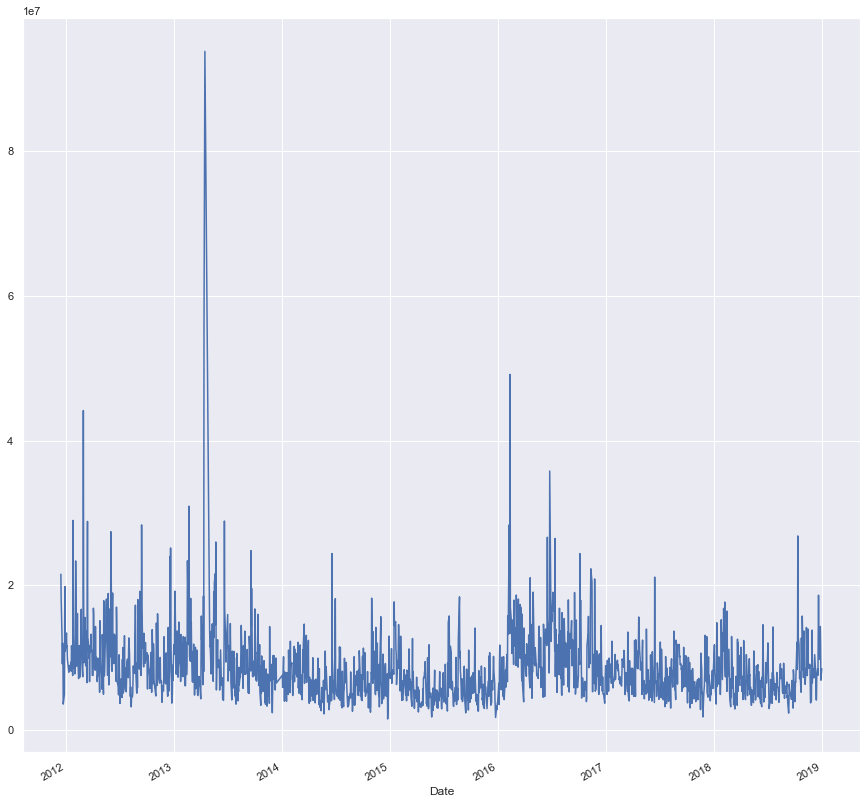

In [22]:
# visualisation de la variable cible("Volume") sur la période 2011-2019
plt.figure(figsize=(15, 15))
df4["Volume"].plot()

    Le volume d'action vendu de l'ETF Gold est relativement stable sur la période 2011-2019 néamoins, l'on observe une hausse du volume a la mi-année 2013 puis une chute brutale la même année.


### Visualisation de la variable Volume(volume d'action ETF Gold  vendu ) sur les différentes périodes (semaines, mois, trimestre, semestre et annuel en utilisant le lissage par moyenne mobile) afin d'observer les différentes tendances : 

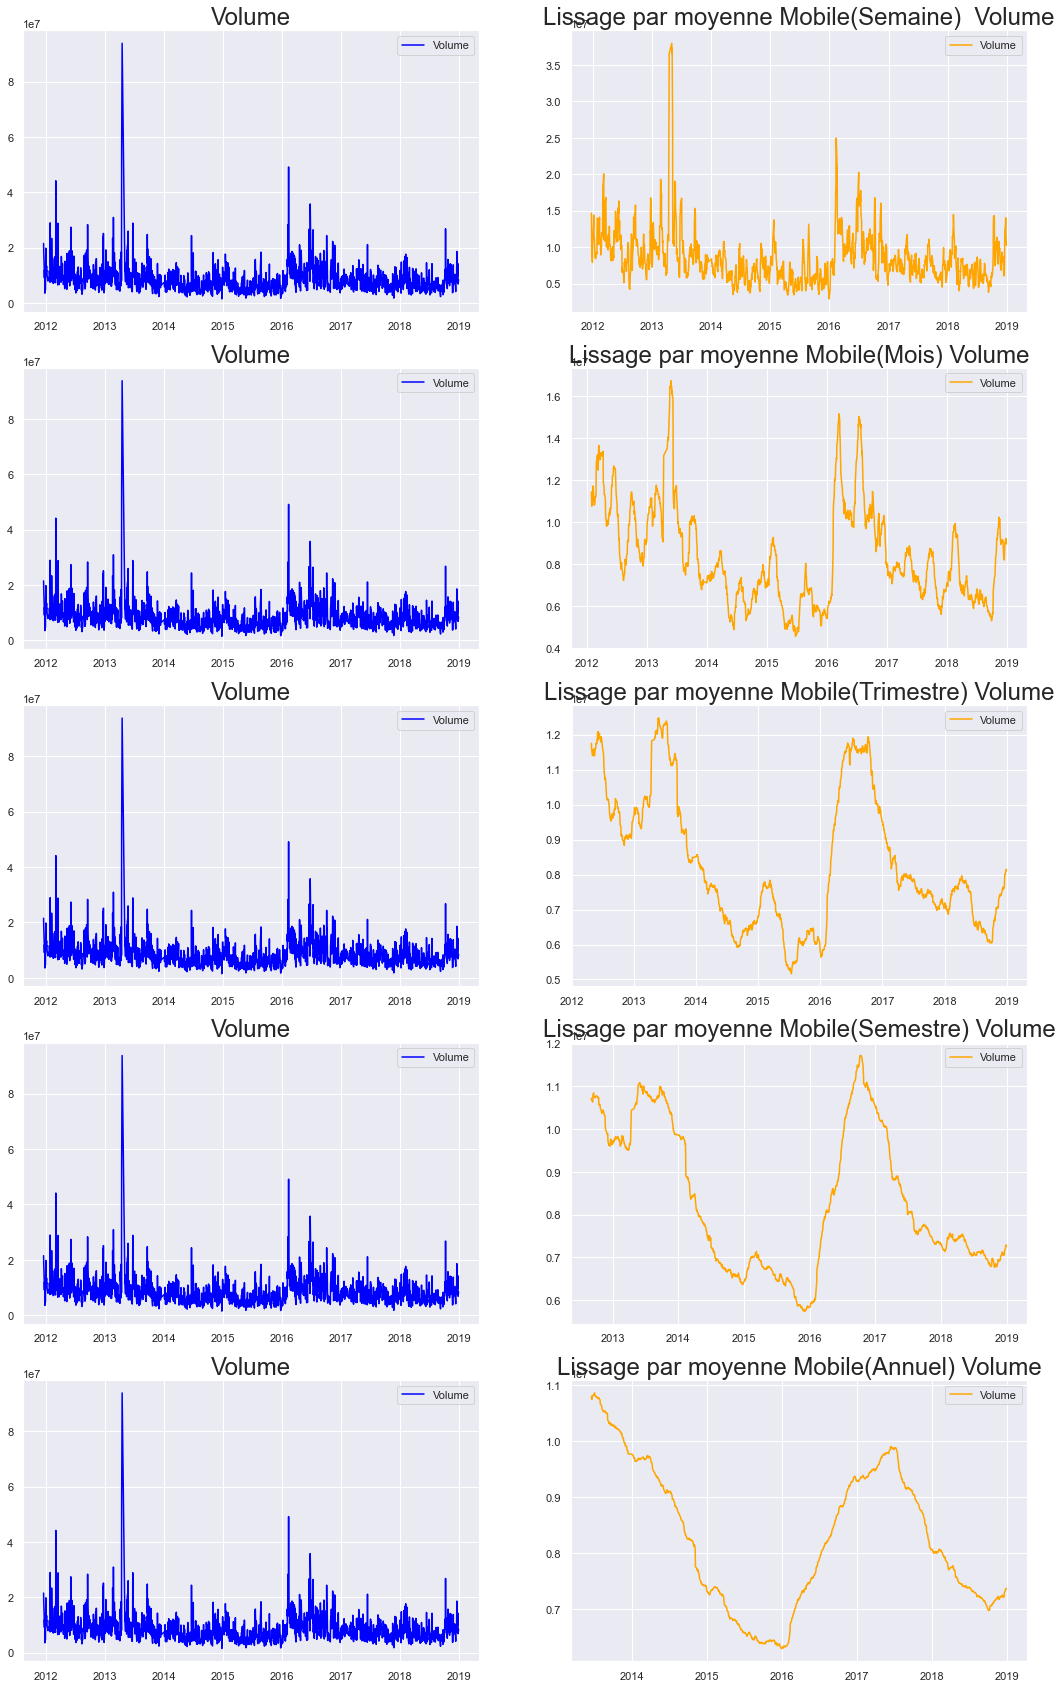

In [23]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

#visuamisation par semaine (Window = 5) 
ax[0, 0].plot(df4.Volume, color = "blue", label = "Volume")
ax[0, 0].set_title("Volume", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(df4.Volume.rolling(window=5).mean(), color = "orange", label = "Volume")
ax[0, 1].set_title("Lissage par moyenne Mobile(Semaine)  Volume", size = 24)
ax[0, 1].legend()


# visualisation par mois (Window = 30)
ax[1, 0].plot(df4.Volume, color = "blue", label = "Volume")
ax[1, 0].set_title("Volume", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(df4.Volume.rolling(window=30).mean(), color = "orange", label = "Volume")
ax[1, 1].set_title("Lissage par moyenne Mobile(Mois) Volume", size = 24)
ax[1, 1].legend()


# Visualisation par trimestre (Window = 5)
ax[2, 0].plot(df4.Volume, color = "blue", label = "Volume")
ax[2, 0].set_title("Volume", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(df4.Volume.rolling(window=90).mean(), color = "orange", label = "Volume")
ax[2, 1].set_title("Lissage par moyenne Mobile(Trimestre) Volume", size = 24)
ax[2, 1].legend()


# Visualisation par semestre (Window = 180)
ax[3, 0].plot(df4.Volume, color = "blue", label = "Volume")
ax[3, 0].set_title("Volume", size = 24)
ax[3, 0].legend()

ax[3, 1].plot(df4.Volume.rolling(window=180).mean(), color = "orange", label = "Volume")
ax[3, 1].set_title("Lissage par moyenne Mobile(Semestre) Volume", size = 24)
ax[3, 1].legend()


# Vidualisation par année (Window = 360)
ax[4, 0].plot(df4.Volume, color = "blue", label = "Volume")
ax[4, 0].set_title("Volume", size = 24)
ax[4, 0].legend()

ax[4, 1].plot(df4.Volume.rolling(window=360).mean(), color = "orange", label = "Volume")
ax[4, 1].set_title("Lissage par moyenne Mobile(Annuel) Volume", size = 24)
ax[4, 1].legend()

plt.show()

    Globalement, l'on remarque que le volume d'action vendu, suit le mouvement du coût de l'or sur le marché. Aussi les volumes ont brutalement evolué au premier trimestre 2013 puis une chue brutal la meme année. le marché tend a reprendre depuis la mi-année 2017 avec avec des fluactuation plus ou moin en baisse observé courant de l'année 2018

### Visualisation des autres variables composant le dataset final : 

In [24]:
df5=df2[['Adj Close', 'Volume','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price','OS_Price','SF_Price','USB_Price','PLT_Price','PLD_Price','RHO_PRICE','USDI_Price','GDX_Adj Close','USO_Adj Close']]
df5

Adj Close    Volume  SP_Ajclose   DJ_Ajclose  EG_Ajclose  \
Date                                                                    
2011-12-15  152.330002  21521900  105.441238  11868.80957   70.431755   
2011-12-16  155.229996  18124300  105.597549  11866.38965   72.364037   
2011-12-19  154.869995  12547200  104.468536  11766.25977   62.509384   
2011-12-20  156.979996   9136300  107.629784  12103.58008   64.731514   
2011-12-21  157.160004  11996100  107.838242  12107.74023   66.180725   
...                ...       ...         ...          ...         ...   
2018-12-24  120.019997   9736400  234.339996  21792.19922    2.950000   
2018-12-26  119.660004  14293500  246.179993  22878.44922    3.000000   
2018-12-27  120.570000  11874400  248.070007  23138.82031    2.950000   
2018-12-28  121.059998   6864700  247.750000  23062.40039    2.900000   
2018-12-31  121.250000   8449400  249.919998  23327.46094    2.880000   

            EU_Price  OF_Price  OS_Price  SF_Price  USB_Price  PLT_Price  \
Date                                                                       
2011-12-15    1.3018    105.09     93.42     53604      1.911    1414.65   
2011-12-16    1.3035    103.35     93.79     53458      1.851    1420.25   
2011-12-19    1.2995    103.64     94.09     52961      1.810    1411.10   
2011-12-20    1.3079    106.73     95.55     53487      1.927    1434.75   
2011-12-21    1.3045    107.71     99.01     53148      1.970    1429.05   
...              ...       ...       ...       ...        ...        ...   
2018-12-24    1.1400     50.47     42.27     37541      2.736     788.40   
2018-12-26    1.1353     54.47     46.39     38253      2.810     799.25   
2018-12-27    1.1430     52.16     45.23     38690      2.774     795.50   
2018-12-28    1.1438     52.20     44.92     38706      2.716     790.25   
2018-12-31    1.1470     53.80     45.00     38821      2.686     801.40   

            PLD_Price  RHO_PRICE  USDI_Price  GDX_Adj Close  USO_Adj Close  
Date                                                                        
2011-12-15     618.85       1425      80.341      48.973877      36.130001  
2011-12-16     623.65       1400      80.249      49.921513      36.270000  
2011-12-19     608.80       1400      80.207      48.490578      36.200001  
2011-12-20     626.65       1400      80.273      50.215282      37.560001  
2011-12-21     635.90       1400      80.350      50.186852      38.110001  
...               ...        ...         ...            ...            ...  
2018-12-24    1172.80       2480      96.007      21.090000       9.290000  
2018-12-26    1190.10       2480      96.568      20.620001       9.900000  
2018-12-27    1196.00       2470      96.001      20.969999       9.620000  
2018-12-28    1185.20       2460      95.965      20.600000       9.530000  
2018-12-31    1197.50          0      95.735      21.090000       9.660000  

[1718 rows x 16 columns]

In [25]:
col3=df5.columns
col3=col3.drop(['Adj Close','Volume'])
col3

Index(['SP_Ajclose', 'DJ_Ajclose', 'EG_Ajclose', 'EU_Price', 'OF_Price',
       'OS_Price', 'SF_Price', 'USB_Price', 'PLT_Price', 'PLD_Price',
       'RHO_PRICE', 'USDI_Price', 'GDX_Adj Close', 'USO_Adj Close'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

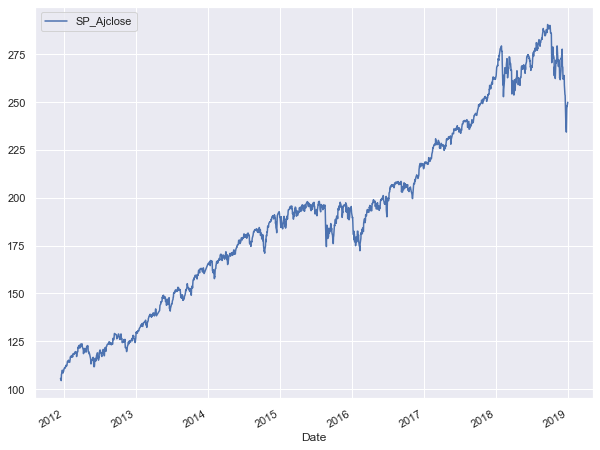

<Figure size 720x576 with 0 Axes>

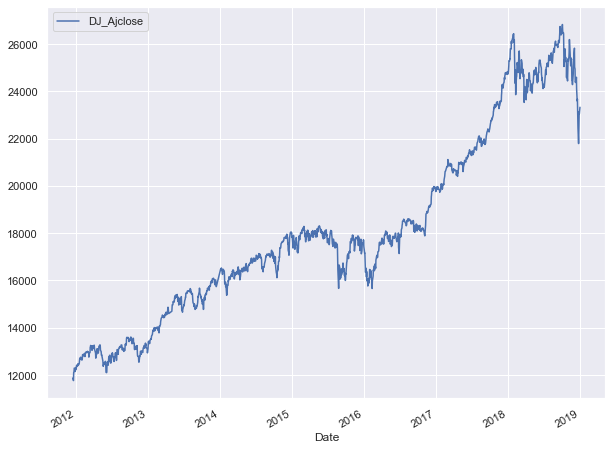

<Figure size 720x576 with 0 Axes>

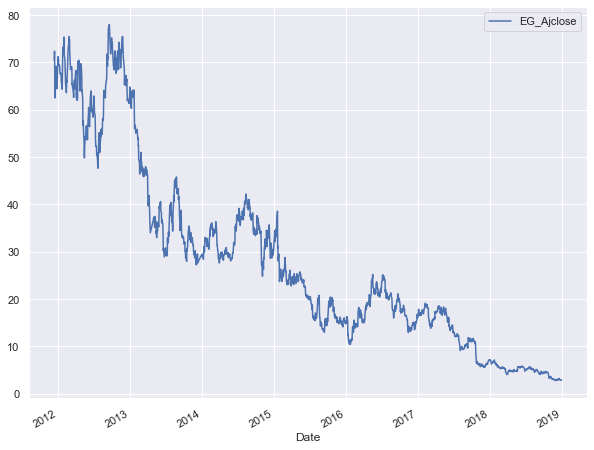

<Figure size 720x576 with 0 Axes>

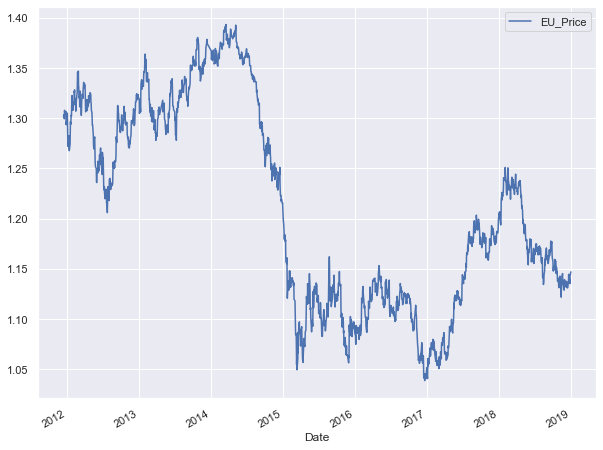

<Figure size 720x576 with 0 Axes>

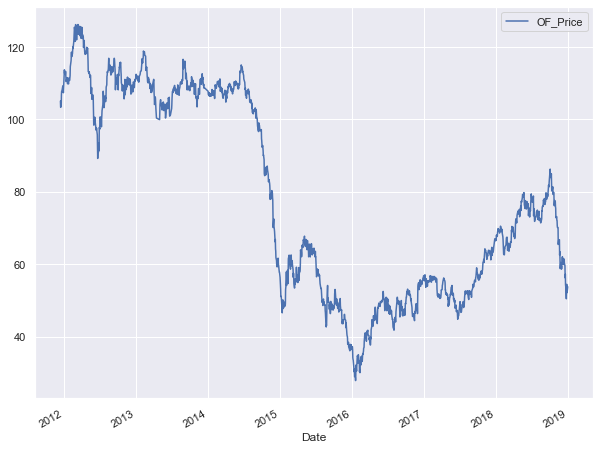

<Figure size 720x576 with 0 Axes>

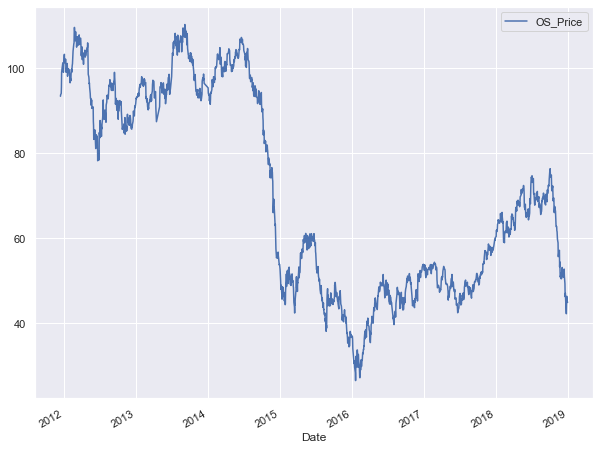

<Figure size 720x576 with 0 Axes>

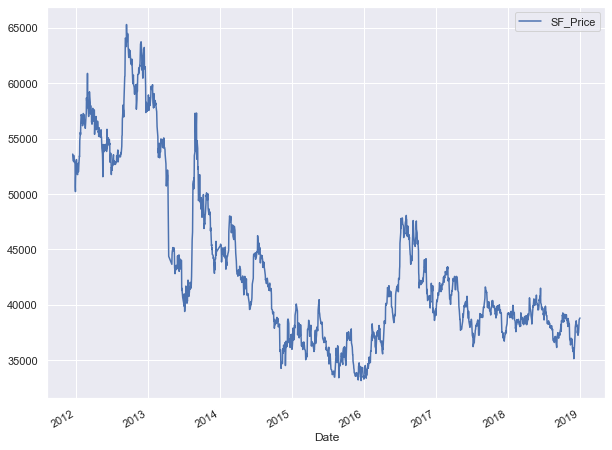

<Figure size 720x576 with 0 Axes>

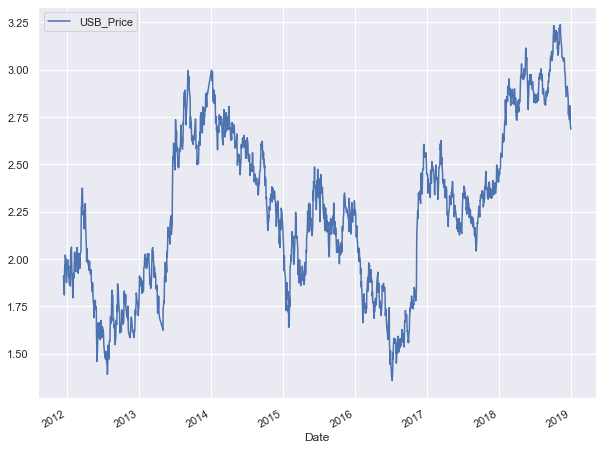

<Figure size 720x576 with 0 Axes>

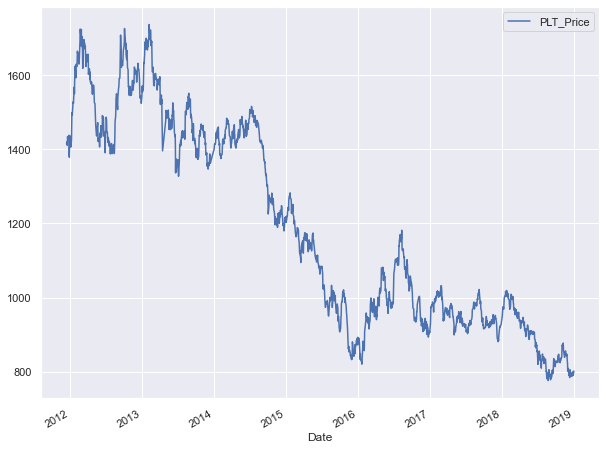

<Figure size 720x576 with 0 Axes>

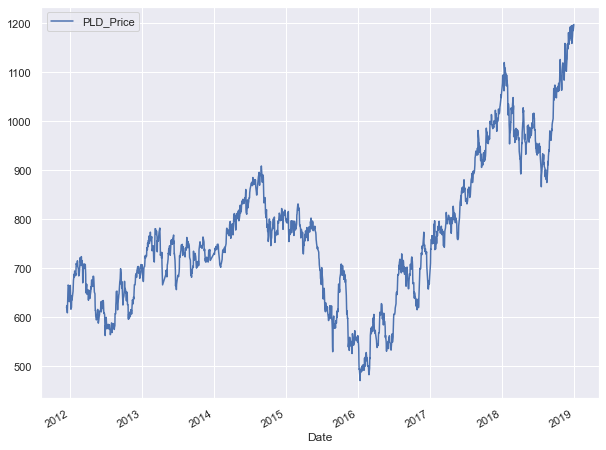

<Figure size 720x576 with 0 Axes>

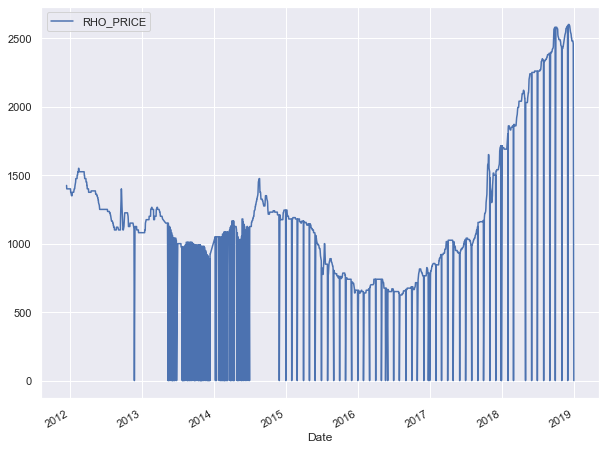

<Figure size 720x576 with 0 Axes>

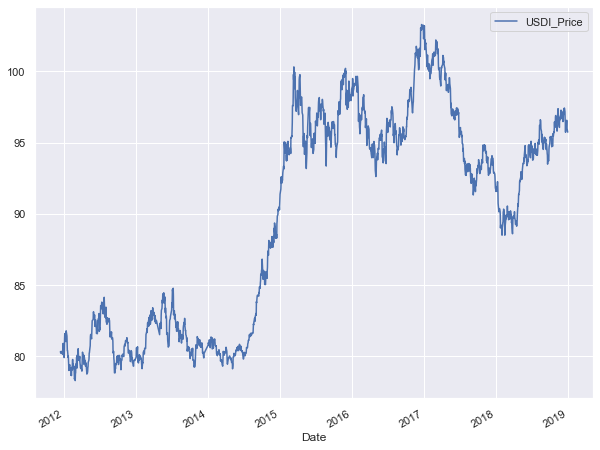

<Figure size 720x576 with 0 Axes>

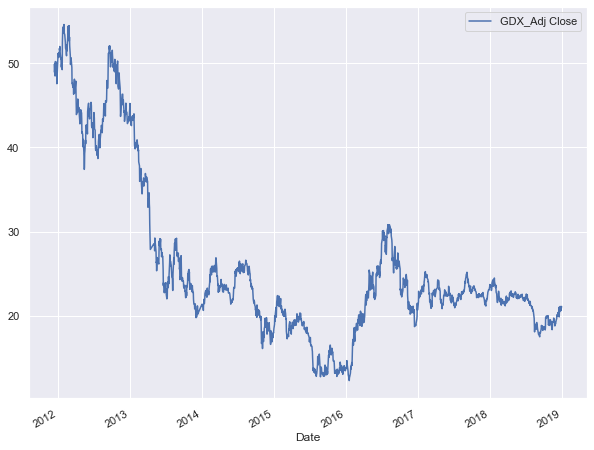

<Figure size 720x576 with 0 Axes>

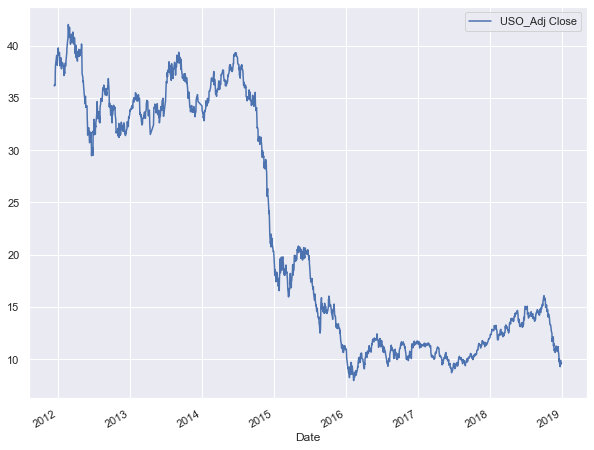

In [26]:
#Visualisation sur la période 2011-2019
#plt.figure(figsize=(15, 15))
#df4["Volume"].plot()
plt.rcParams["figure.figsize"] = 10, 8

for elt in col3:
    plt.figure(figsize=(10, 8))
    df5[[elt]].plot( )

     Globalement l'on remarque une baisse des couts des matériaux et indice boursier qui debute en fin d'année 2015 avec un pique a la baisse en 2016

### Relation entre la variable cible et les autres indicateurs :

<Figure size 720x576 with 0 Axes>

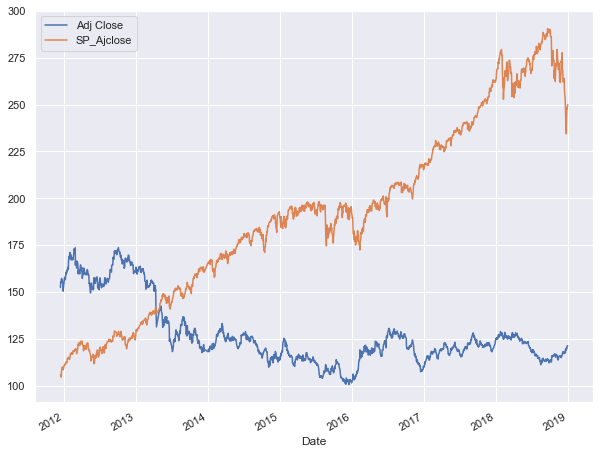

<Figure size 720x576 with 0 Axes>

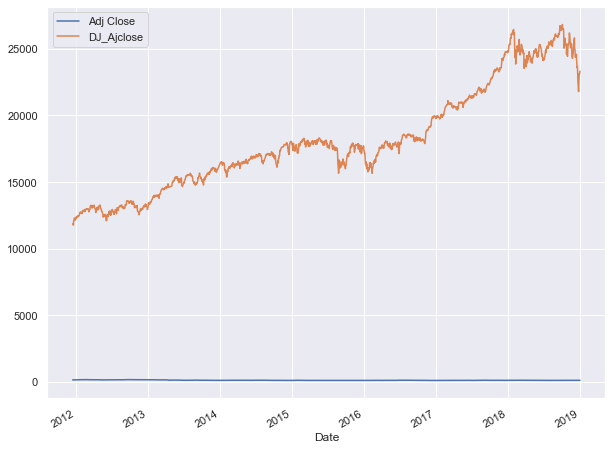

<Figure size 720x576 with 0 Axes>

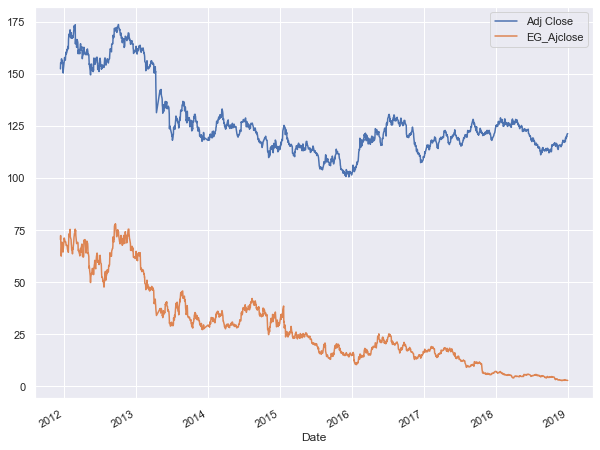

<Figure size 720x576 with 0 Axes>

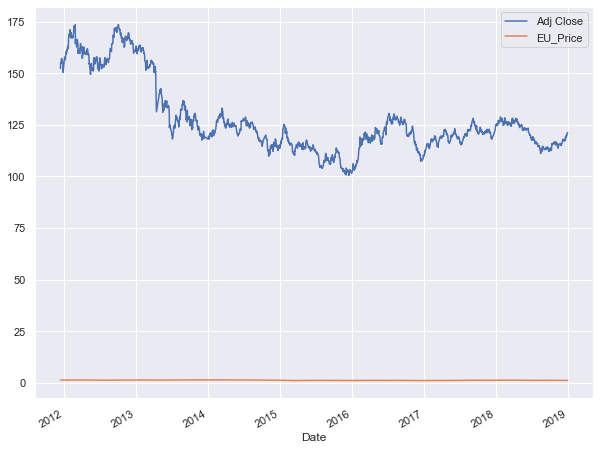

<Figure size 720x576 with 0 Axes>

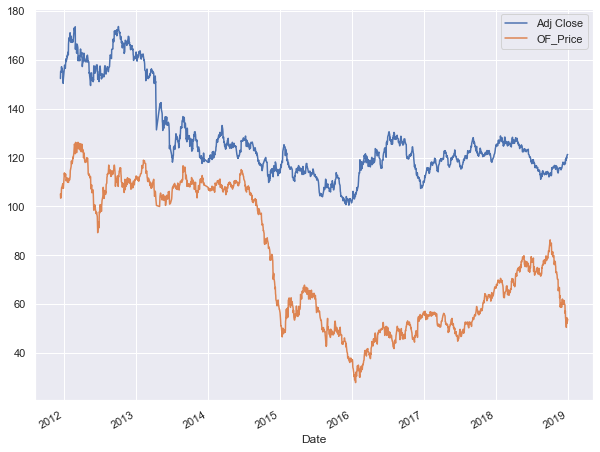

<Figure size 720x576 with 0 Axes>

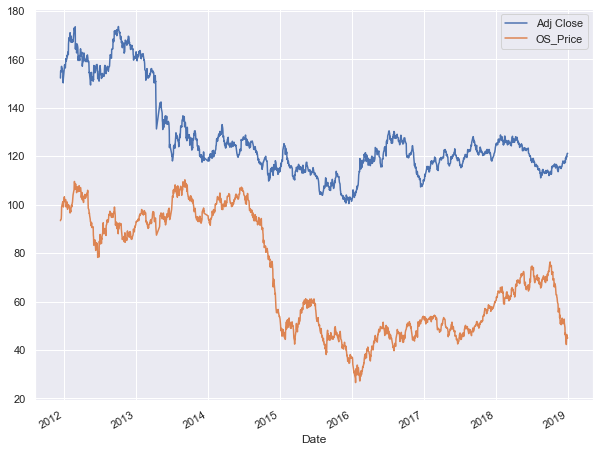

<Figure size 720x576 with 0 Axes>

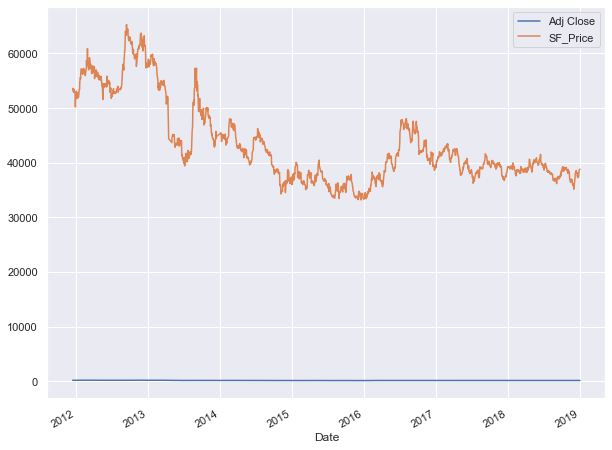

<Figure size 720x576 with 0 Axes>

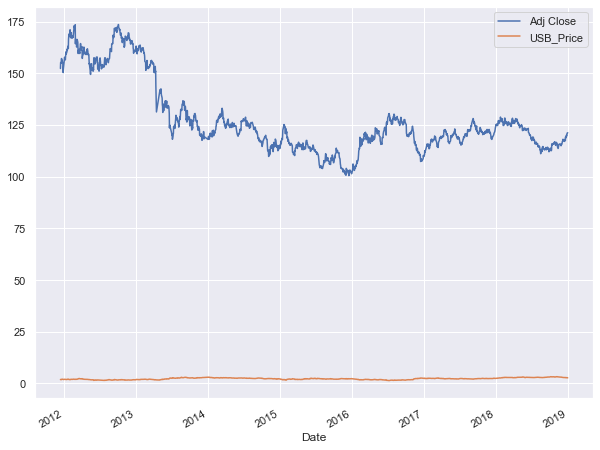

<Figure size 720x576 with 0 Axes>

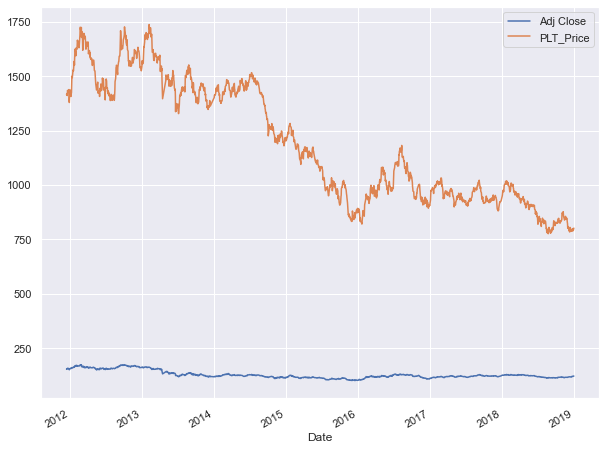

<Figure size 720x576 with 0 Axes>

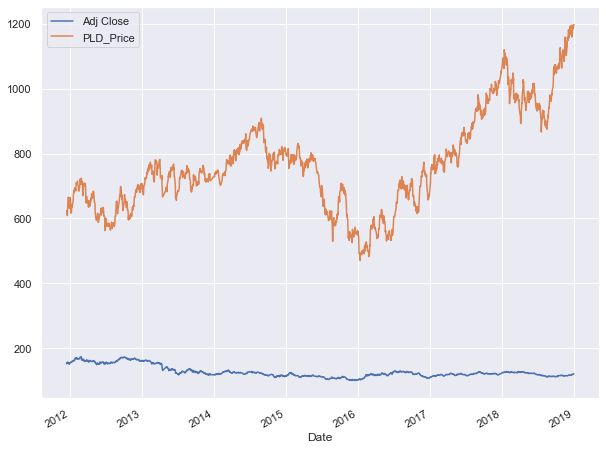

<Figure size 720x576 with 0 Axes>

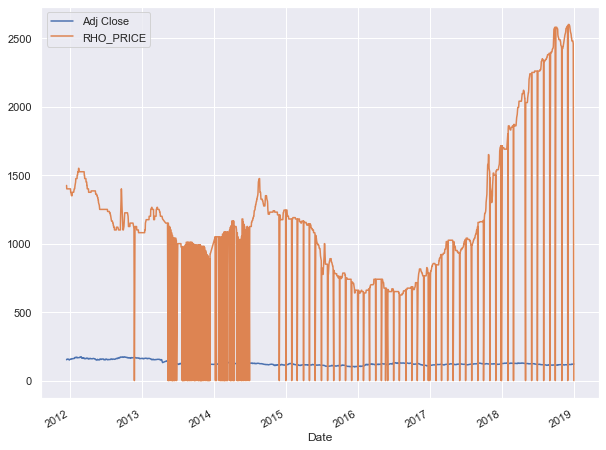

<Figure size 720x576 with 0 Axes>

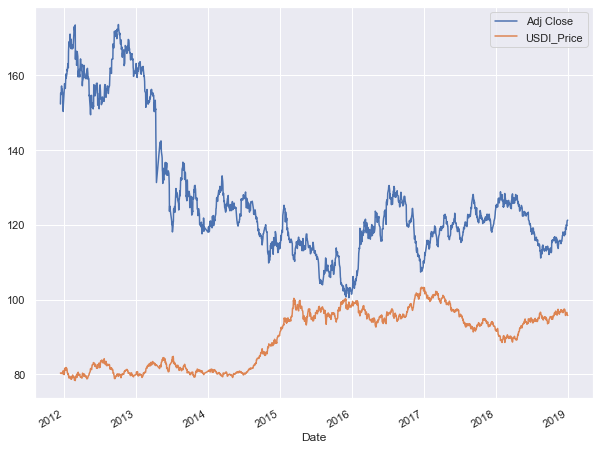

<Figure size 720x576 with 0 Axes>

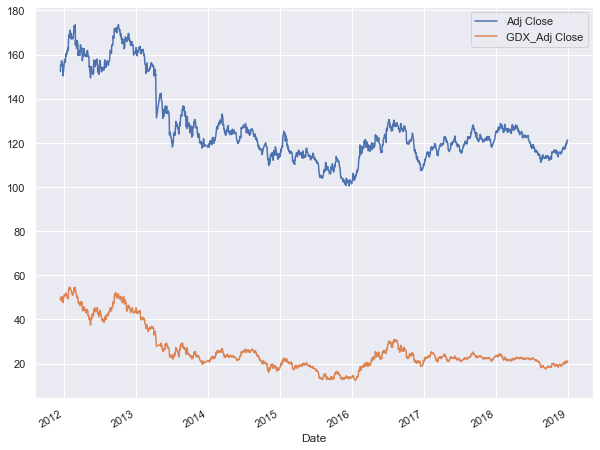

<Figure size 720x576 with 0 Axes>

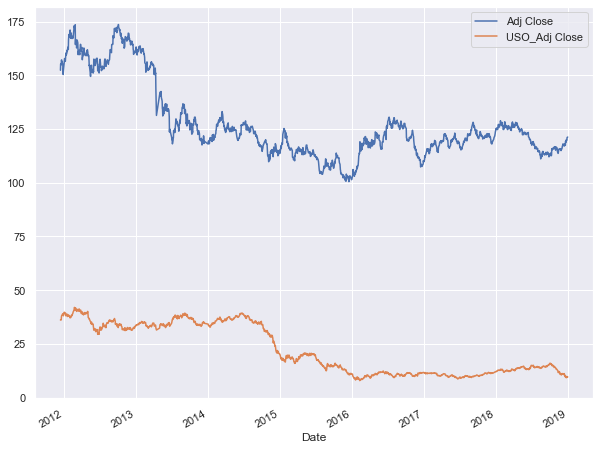

In [27]:
plt.rcParams["figure.figsize"] = 10, 8

for elt in col3:
    plt.figure(figsize=(10, 8))
    df5[[ "Adj Close",elt]].plot()

In [28]:
df5.corr()

Adj Close    Volume  SP_Ajclose  DJ_Ajclose  EG_Ajclose  \
Adj Close       1.000000  0.246778   -0.666071   -0.588411    0.859850   
Volume          0.246778  1.000000   -0.208594   -0.198461    0.187100   
SP_Ajclose     -0.666071 -0.208594    1.000000    0.989509   -0.902488   
DJ_Ajclose     -0.588411 -0.198461    0.989509    1.000000   -0.859977   
EG_Ajclose      0.859850  0.187100   -0.902488   -0.859977    1.000000   
EU_Price        0.581036  0.082017   -0.558575   -0.478621    0.619230   
OF_Price        0.710693  0.081602   -0.628413   -0.536211    0.747928   
OS_Price        0.630817  0.064082   -0.595273   -0.507989    0.692771   
SF_Price        0.947420  0.239380   -0.708038   -0.646737    0.869780   
USB_Price      -0.441347 -0.247441    0.559923    0.607675   -0.498329   
PLT_Price       0.775861  0.155742   -0.864895   -0.811543    0.908749   
PLD_Price      -0.213179 -0.180643    0.701170    0.771760   -0.477664   
RHO_PRICE       0.095782 -0.049155    0.393247    0.468068   -0.143369   
USDI_Price     -0.721569 -0.123885    0.697188    0.618134   -0.769361   
GDX_Adj Close   0.974980  0.250313   -0.657799   -0.588374    0.867314   
USO_Adj Close   0.635675  0.081642   -0.785103   -0.721378    0.814141   

               EU_Price  OF_Price  OS_Price  SF_Price  USB_Price  PLT_Price  \
Adj Close      0.581036  0.710693  0.630817  0.947420  -0.441347   0.775861   
Volume         0.082017  0.081602  0.064082  0.239380  -0.247441   0.155742   
SP_Ajclose    -0.558575 -0.628413 -0.595273 -0.708038   0.559923  -0.864895   
DJ_Ajclose    -0.478621 -0.536211 -0.507989 -0.646737   0.607675  -0.811543   
EG_Ajclose     0.619230  0.747928  0.692771  0.869780  -0.498329   0.908749   
EU_Price       1.000000  0.903890  0.918097  0.590900   0.135740   0.821030   
OF_Price       0.903890  1.000000  0.986421  0.734201   0.090251   0.868344   
OS_Price       0.918097  0.986421  1.000000  0.663126   0.154046   0.843934   
SF_Price       0.590900  0.734201  0.663126  1.000000  -0.402075   0.808133   
USB_Price      0.135740  0.090251  0.154046 -0.402075   1.000000  -0.302701   
PLT_Price      0.821030  0.868344  0.843934  0.808133  -0.302701   1.000000   
PLD_Price      0.030189 -0.013374  0.002524 -0.289833   0.683238  -0.326248   
RHO_PRICE      0.027498  0.122162  0.090490 -0.022740   0.407982  -0.176380   
USDI_Price    -0.970819 -0.932621 -0.924975 -0.719465   0.050497  -0.901038   
GDX_Adj Close  0.506262  0.665965  0.590622  0.934367  -0.465313   0.734653   
USO_Adj Close  0.887218  0.945406  0.949219  0.671612  -0.047223   0.930607   

               PLD_Price  RHO_PRICE  USDI_Price  GDX_Adj Close  USO_Adj Close  
Adj Close      -0.213179   0.095782   -0.721569       0.974980       0.635675  
Volume         -0.180643  -0.049155   -0.123885       0.250313       0.081642  
SP_Ajclose      0.701170   0.393247    0.697188      -0.657799      -0.785103  
DJ_Ajclose      0.771760   0.468068    0.618134      -0.588374      -0.721378  
EG_Ajclose     -0.477664  -0.143369   -0.769361       0.867314       0.814141  
EU_Price        0.030189   0.027498   -0.970819       0.506262       0.887218  
OF_Price       -0.013374   0.122162   -0.932621       0.665965       0.945406  
OS_Price        0.002524   0.090490   -0.924975       0.590622       0.949219  
SF_Price       -0.289833  -0.022740   -0.719465       0.934367       0.671612  
USB_Price       0.683238   0.407982    0.050497      -0.465313      -0.047223  
PLT_Price      -0.326248  -0.176380   -0.901038       0.734653       0.930607  
PLD_Price       1.000000   0.612363    0.113176      -0.250554      -0.218673  
RHO_PRICE       0.612363   1.000000   -0.001144       0.082225      -0.068746  
USDI_Price      0.113176  -0.001144    1.000000      -0.658763      -0.930767  
GDX_Adj Close  -0.250554   0.082225   -0.658763       1.000000       0.600756  
USO_Adj Close  -0.218673  -0.068746   -0.930767       0.600756       1.000000

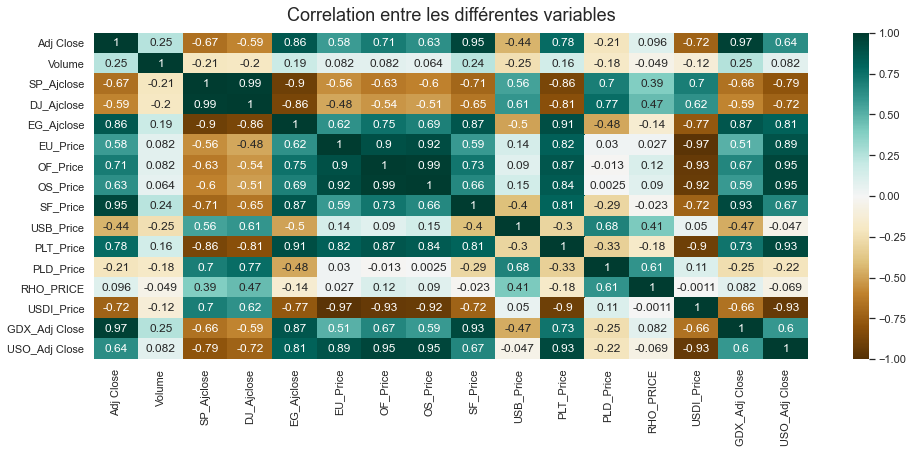

In [29]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df5.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation entre les différentes variables', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

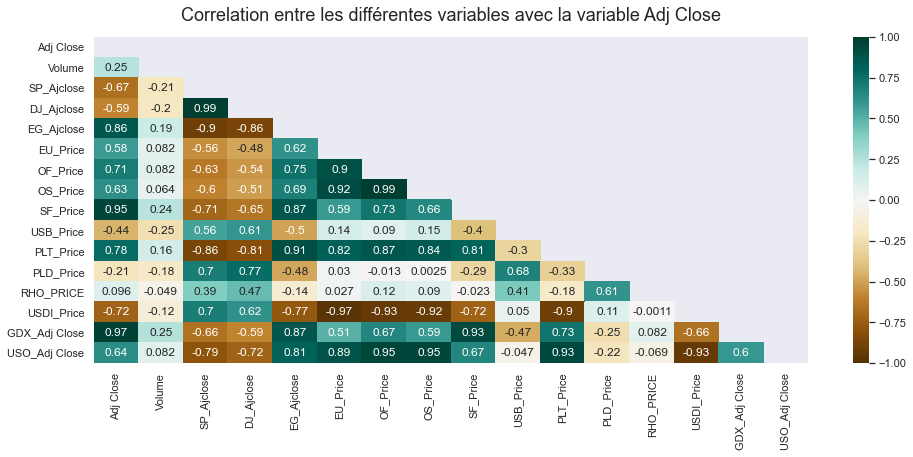

In [30]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df5.corr(), dtype=np.bool))
heatmap = sns.heatmap(df5.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation entre les différentes variables avec la variable Adj Close', fontdict={'fontsize':18}, pad=16);

     A un seuil de correlation de 50%, Les variables : ['EG_Ajclose', 'EU_Price', 'OF_Price','OS_Price', 'SF_Price', 'PLD_Price', 'GDX_Adj Close', 'USO_Adj Close'] sont celle qui presenete une meilleur corrélation linéaire et donc l'on les        conservera pour la suite de l'analyse.

In [31]:
#Constitution du nouveau dataFrame resultant
df6=df5[['Adj Close','EG_Ajclose', 'EU_Price', 'OF_Price','OS_Price', 'SF_Price', 'PLD_Price', 'GDX_Adj Close', 'USO_Adj Close']]
df6.rename(columns={"Adj Close": "Adj_Close", "GDX_Adj Close":"GDX_Adj_Close", "USO_Adj Close":"USO_Adj_Close"},inplace=True)
df6

Adj_Close  EG_Ajclose  EU_Price  OF_Price  OS_Price  SF_Price  \
Date                                                                         
2011-12-15  152.330002   70.431755    1.3018    105.09     93.42     53604   
2011-12-16  155.229996   72.364037    1.3035    103.35     93.79     53458   
2011-12-19  154.869995   62.509384    1.2995    103.64     94.09     52961   
2011-12-20  156.979996   64.731514    1.3079    106.73     95.55     53487   
2011-12-21  157.160004   66.180725    1.3045    107.71     99.01     53148   
...                ...         ...       ...       ...       ...       ...   
2018-12-24  120.019997    2.950000    1.1400     50.47     42.27     37541   
2018-12-26  119.660004    3.000000    1.1353     54.47     46.39     38253   
2018-12-27  120.570000    2.950000    1.1430     52.16     45.23     38690   
2018-12-28  121.059998    2.900000    1.1438     52.20     44.92     38706   
2018-12-31  121.250000    2.880000    1.1470     53.80     45.00     38821   

            PLD_Price  GDX_Adj_Close  USO_Adj_Close  
Date                                                 
2011-12-15     618.85      48.973877      36.130001  
2011-12-16     623.65      49.921513      36.270000  
2011-12-19     608.80      48.490578      36.200001  
2011-12-20     626.65      50.215282      37.560001  
2011-12-21     635.90      50.186852      38.110001  
...               ...            ...            ...  
2018-12-24    1172.80      21.090000       9.290000  
2018-12-26    1190.10      20.620001       9.900000  
2018-12-27    1196.00      20.969999       9.620000  
2018-12-28    1185.20      20.600000       9.530000  
2018-12-31    1197.50      21.090000       9.660000  

[1718 rows x 9 columns]

### Analyse du dataframe resultant  des et visualisations valeurs abérentes :

In [32]:
#df6.boxplot()

In [33]:
#df6[['Adj Close']].boxplot()

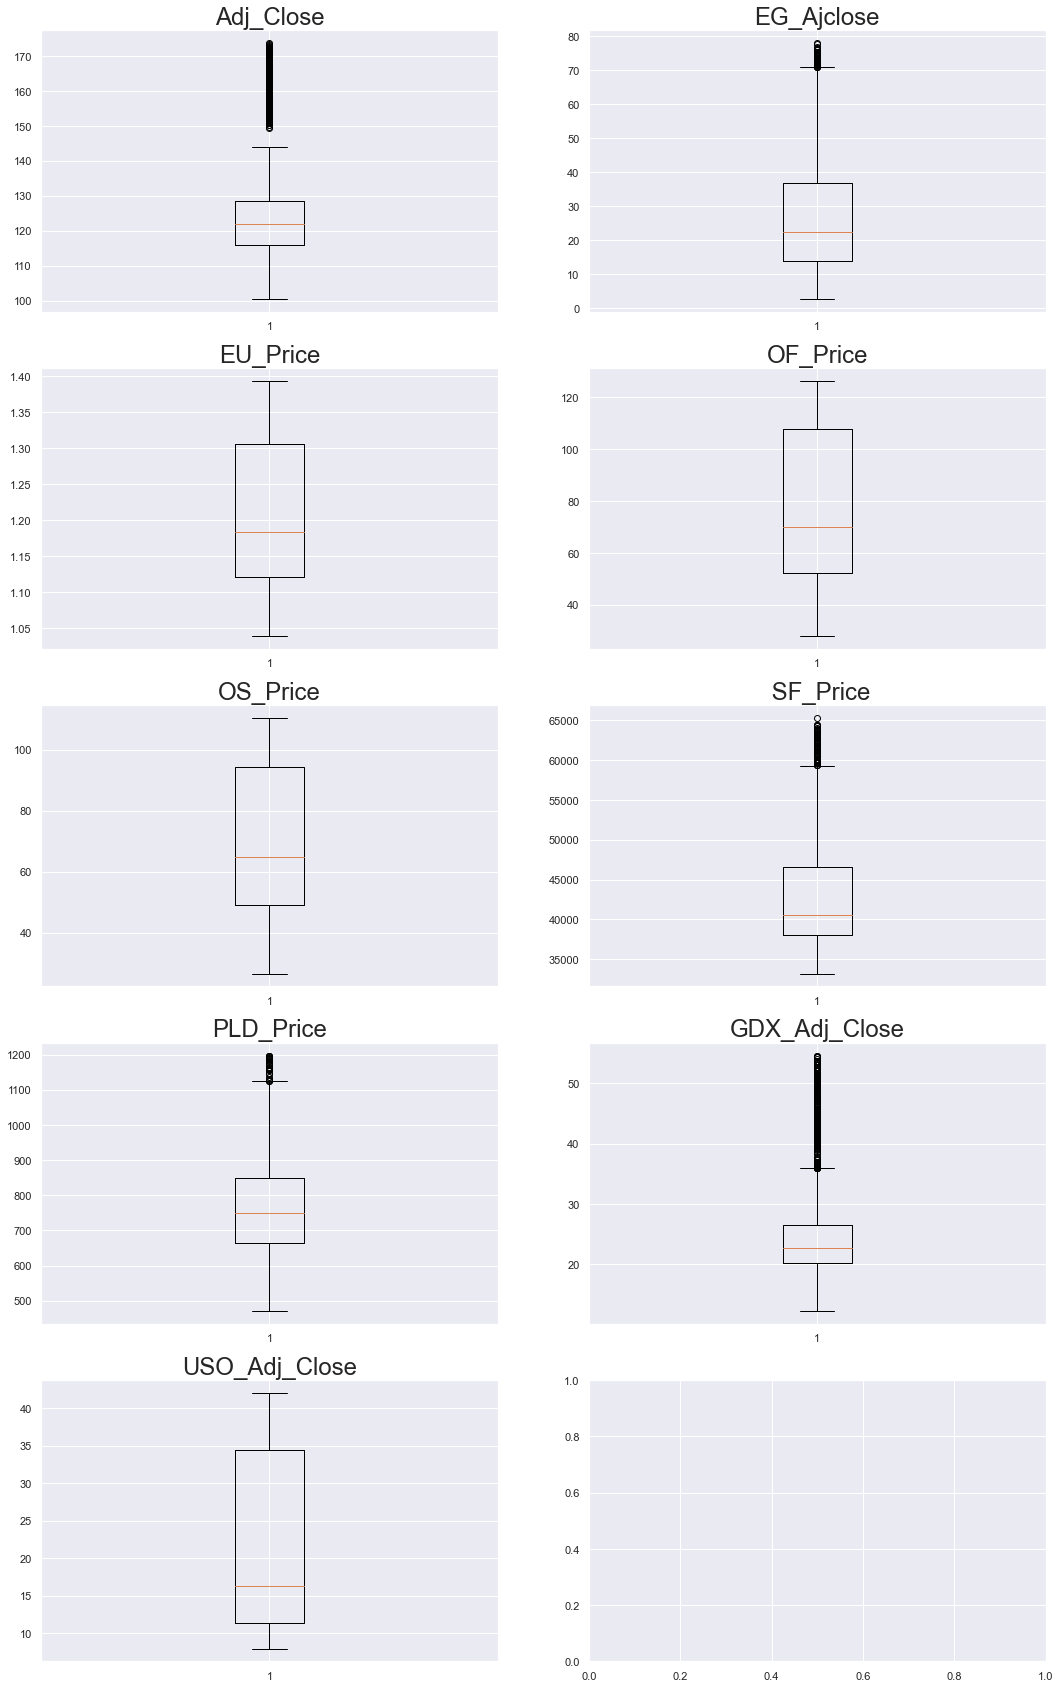

In [34]:
plt.rcParams["figure.figsize"] = 18, 30

fig, ax = plt.subplots(5, 2)

#Boxplot pour la variable Adj_Close
ax[0, 0].boxplot(df6.Adj_Close)
ax[0, 0].set_title("Adj_Close", size = 24)

#Boxplot pour la variable EG_Ajclose
ax[0, 1].boxplot(df6.EG_Ajclose)
ax[0, 1].set_title("EG_Ajclose", size = 24)



#Boxplot pour la variable EU_Price
ax[1, 0].boxplot(df6.EU_Price)
ax[1, 0].set_title("EU_Price", size = 24)

#Boxplot pour la variable OF_Price
ax[1, 1].boxplot(df6.OF_Price)
ax[1, 1].set_title("OF_Price", size = 24)



#Boxplot pour la variable OS_Price
ax[2, 0].boxplot(df6.OS_Price)
ax[2, 0].set_title("OS_Price", size = 24)

#Boxplot pour la variable SF_Price
ax[2, 1].boxplot(df6.SF_Price)
ax[2, 1].set_title(" SF_Price", size = 24)



#Boxplot pour la variable PLD_Price
ax[3, 0].boxplot(df6.PLD_Price)
ax[3, 0].set_title("PLD_Price", size = 24)

#Boxplot pour la variable GDX_Adj_Close
ax[3, 1].boxplot(df6.GDX_Adj_Close)
ax[3, 1].set_title("GDX_Adj_Close", size = 24)



#Boxplot pour la variable USO_Adj_Close
ax[4, 0].boxplot(df6.USO_Adj_Close)
ax[4, 0].set_title("USO_Adj_Close", size = 24)


plt.show()

     Globalement en plus du nombre de  valeurs abérentes élebvé au niveau des variables "Adj_Close","EG_AdjClose",           "SF_Price","PLD_Price", "GDX_Adj_Close", les distributions au niveau des variables ne sont pas symétrique

### Visualisation des distributions pour les variables : 
    Adj_Close, EG_Ajclose, EU_Price, OF_Price, OS_Price, SF_Price, PLD_Price, GDX_Adj_Close, USO_Adj_Close

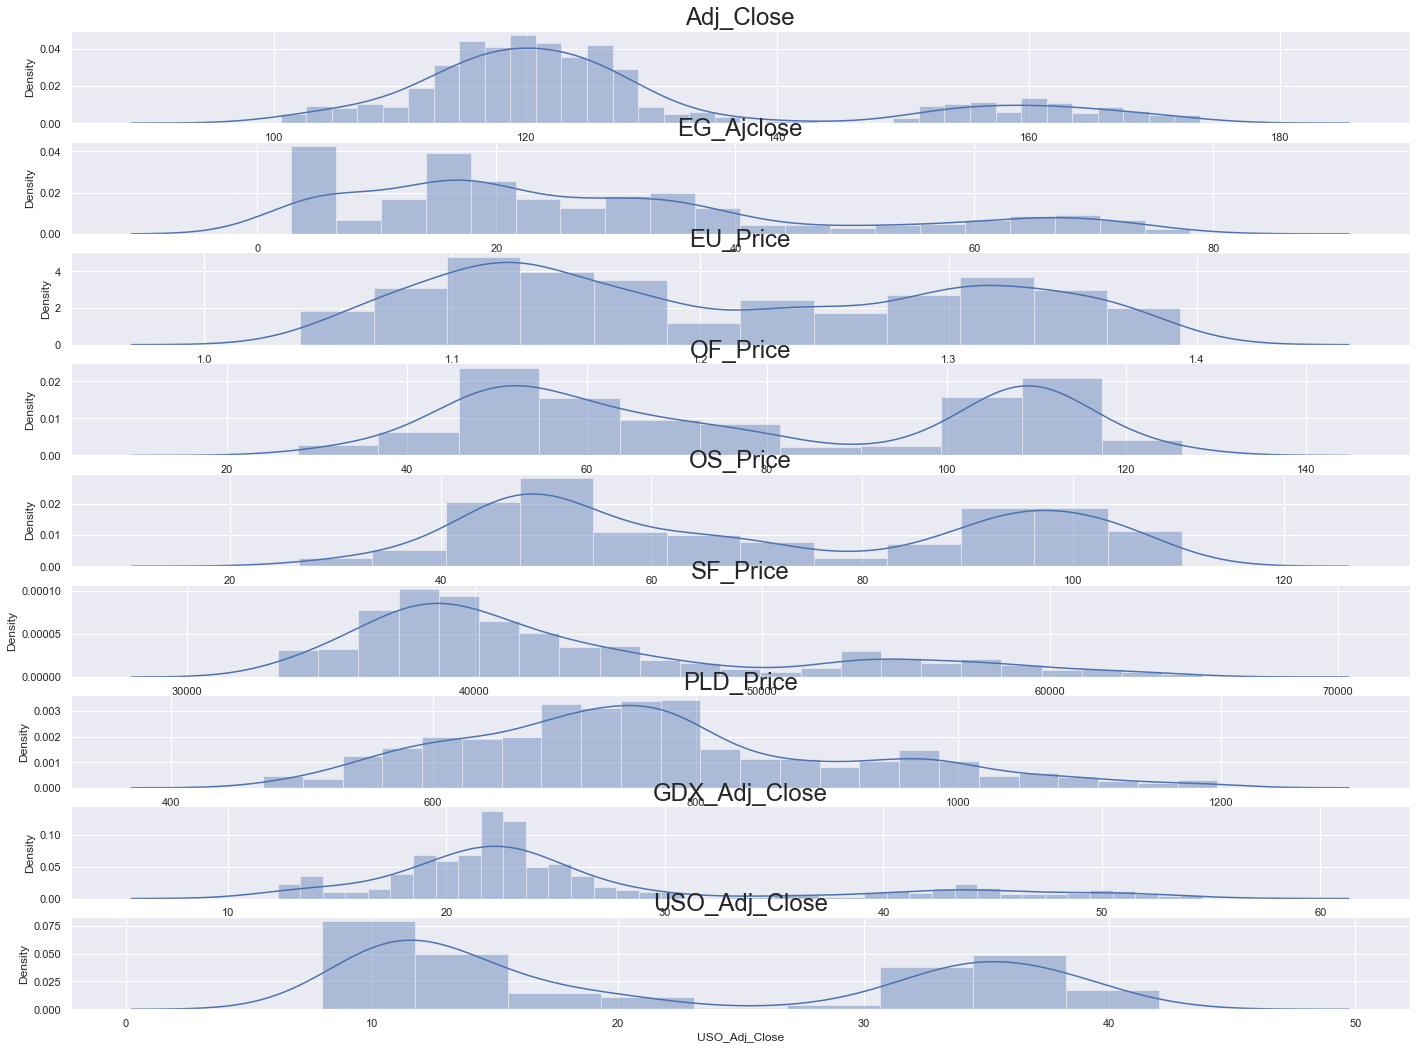

In [35]:
plt.rcParams["figure.figsize"] = 24, 18

fig, axes = plt.subplots(9, 1)

sns.distplot(df6.Adj_Close, ax = axes[0])
sns.distplot(df6.EG_Ajclose, ax = axes[1])
sns.distplot(df6.EU_Price, ax = axes[2])

sns.distplot(df6.OF_Price, ax = axes[3])
sns.distplot(df6.OS_Price, ax = axes[4])
sns.distplot(df6.SF_Price, ax = axes[5])

sns.distplot(df6.PLD_Price, ax = axes[6])
sns.distplot(df6.GDX_Adj_Close, ax = axes[7])
sns.distplot(df6.USO_Adj_Close, ax = axes[8])


axes[0].set_title("Adj_Close", size = 24)
axes[1].set_title("EG_Ajclose", size = 24)
axes[2].set_title("EU_Price", size = 24)

axes[3].set_title("OF_Price", size = 24)
axes[4].set_title("OS_Price", size = 24)
axes[5].set_title("SF_Price", size = 24)

axes[6].set_title("PLD_Price", size = 24)
axes[7].set_title("GDX_Adj_Close", size = 24)
axes[8].set_title("USO_Adj_Close", size = 24)

plt.show()

      La distibution des différentes variables en distribution normal, On peut approximer  la loi suivi par les variables a une loi normale non symétrique avec des étalements sur la droite dû aux valeurs abérentes

### 2) Modélisation

#### Visualisation de la decomposition saisonière

In [36]:
df6

Adj_Close  EG_Ajclose  EU_Price  OF_Price  OS_Price  SF_Price  \
Date                                                                         
2011-12-15  152.330002   70.431755    1.3018    105.09     93.42     53604   
2011-12-16  155.229996   72.364037    1.3035    103.35     93.79     53458   
2011-12-19  154.869995   62.509384    1.2995    103.64     94.09     52961   
2011-12-20  156.979996   64.731514    1.3079    106.73     95.55     53487   
2011-12-21  157.160004   66.180725    1.3045    107.71     99.01     53148   
...                ...         ...       ...       ...       ...       ...   
2018-12-24  120.019997    2.950000    1.1400     50.47     42.27     37541   
2018-12-26  119.660004    3.000000    1.1353     54.47     46.39     38253   
2018-12-27  120.570000    2.950000    1.1430     52.16     45.23     38690   
2018-12-28  121.059998    2.900000    1.1438     52.20     44.92     38706   
2018-12-31  121.250000    2.880000    1.1470     53.80     45.00     38821   

            PLD_Price  GDX_Adj_Close  USO_Adj_Close  
Date                                                 
2011-12-15     618.85      48.973877      36.130001  
2011-12-16     623.65      49.921513      36.270000  
2011-12-19     608.80      48.490578      36.200001  
2011-12-20     626.65      50.215282      37.560001  
2011-12-21     635.90      50.186852      38.110001  
...               ...            ...            ...  
2018-12-24    1172.80      21.090000       9.290000  
2018-12-26    1190.10      20.620001       9.900000  
2018-12-27    1196.00      20.969999       9.620000  
2018-12-28    1185.20      20.600000       9.530000  
2018-12-31    1197.50      21.090000       9.660000  

[1718 rows x 9 columns]

In [37]:
data6=df6.copy()
data6

Adj_Close  EG_Ajclose  EU_Price  OF_Price  OS_Price  SF_Price  \
Date                                                                         
2011-12-15  152.330002   70.431755    1.3018    105.09     93.42     53604   
2011-12-16  155.229996   72.364037    1.3035    103.35     93.79     53458   
2011-12-19  154.869995   62.509384    1.2995    103.64     94.09     52961   
2011-12-20  156.979996   64.731514    1.3079    106.73     95.55     53487   
2011-12-21  157.160004   66.180725    1.3045    107.71     99.01     53148   
...                ...         ...       ...       ...       ...       ...   
2018-12-24  120.019997    2.950000    1.1400     50.47     42.27     37541   
2018-12-26  119.660004    3.000000    1.1353     54.47     46.39     38253   
2018-12-27  120.570000    2.950000    1.1430     52.16     45.23     38690   
2018-12-28  121.059998    2.900000    1.1438     52.20     44.92     38706   
2018-12-31  121.250000    2.880000    1.1470     53.80     45.00     38821   

            PLD_Price  GDX_Adj_Close  USO_Adj_Close  
Date                                                 
2011-12-15     618.85      48.973877      36.130001  
2011-12-16     623.65      49.921513      36.270000  
2011-12-19     608.80      48.490578      36.200001  
2011-12-20     626.65      50.215282      37.560001  
2011-12-21     635.90      50.186852      38.110001  
...               ...            ...            ...  
2018-12-24    1172.80      21.090000       9.290000  
2018-12-26    1190.10      20.620001       9.900000  
2018-12-27    1196.00      20.969999       9.620000  
2018-12-28    1185.20      20.600000       9.530000  
2018-12-31    1197.50      21.090000       9.660000  

[1718 rows x 9 columns]

In [38]:
#Creation du dataframe avec la fréquence mensuel
data_max = data6.resample("M").max()
data_max

Adj_Close  EG_Ajclose  EU_Price  OF_Price  OS_Price  SF_Price  \
Date                                                                         
2011-12-31  157.160004   72.364037    1.3079    109.27    101.28     53604   
2012-01-31  169.309998   73.459251    1.3226    113.70    103.29     57165   
2012-02-29  173.490005   75.452530    1.3470    125.47    109.62     60883   
2012-03-31  166.610001   74.869125    1.3358    126.22    108.60     59221   
2012-04-30  162.940002   70.445045    1.3323    125.43    105.05     57595   
...                ...         ...       ...       ...       ...       ...   
2018-08-31  115.139999    5.300000    1.1708     77.77     70.64     38127   
2018-09-30  114.269997    4.800000    1.1777     82.72     73.78     38577   
2018-10-31  116.769997    4.750000    1.1594     86.29     76.39     39274   
2018-11-30  116.650002    3.650000    1.1453     73.17     63.52     38771   
2018-12-31  121.250000    3.250000    1.1470     62.08     53.16     38821   

            PLD_Price  GDX_Adj_Close  USO_Adj_Close  
Date                                                 
2011-12-31     665.55      50.215282      39.060001  
2012-01-31     694.20      54.303421      39.770000  
2012-02-29     723.60      54.617039      42.009998  
2012-03-31     716.00      53.115479      41.750000  
2012-04-30     683.50      47.888508      40.029999  
...               ...            ...            ...  
2018-08-31     980.30      21.048632      14.750000  
2018-09-30    1073.50      18.830368      15.520000  
2018-10-31    1126.10      19.994211      16.080000  
2018-11-30    1158.90      19.705736      13.460000  
2018-12-31    1197.50      21.090000      11.270000  

[85 rows x 9 columns]

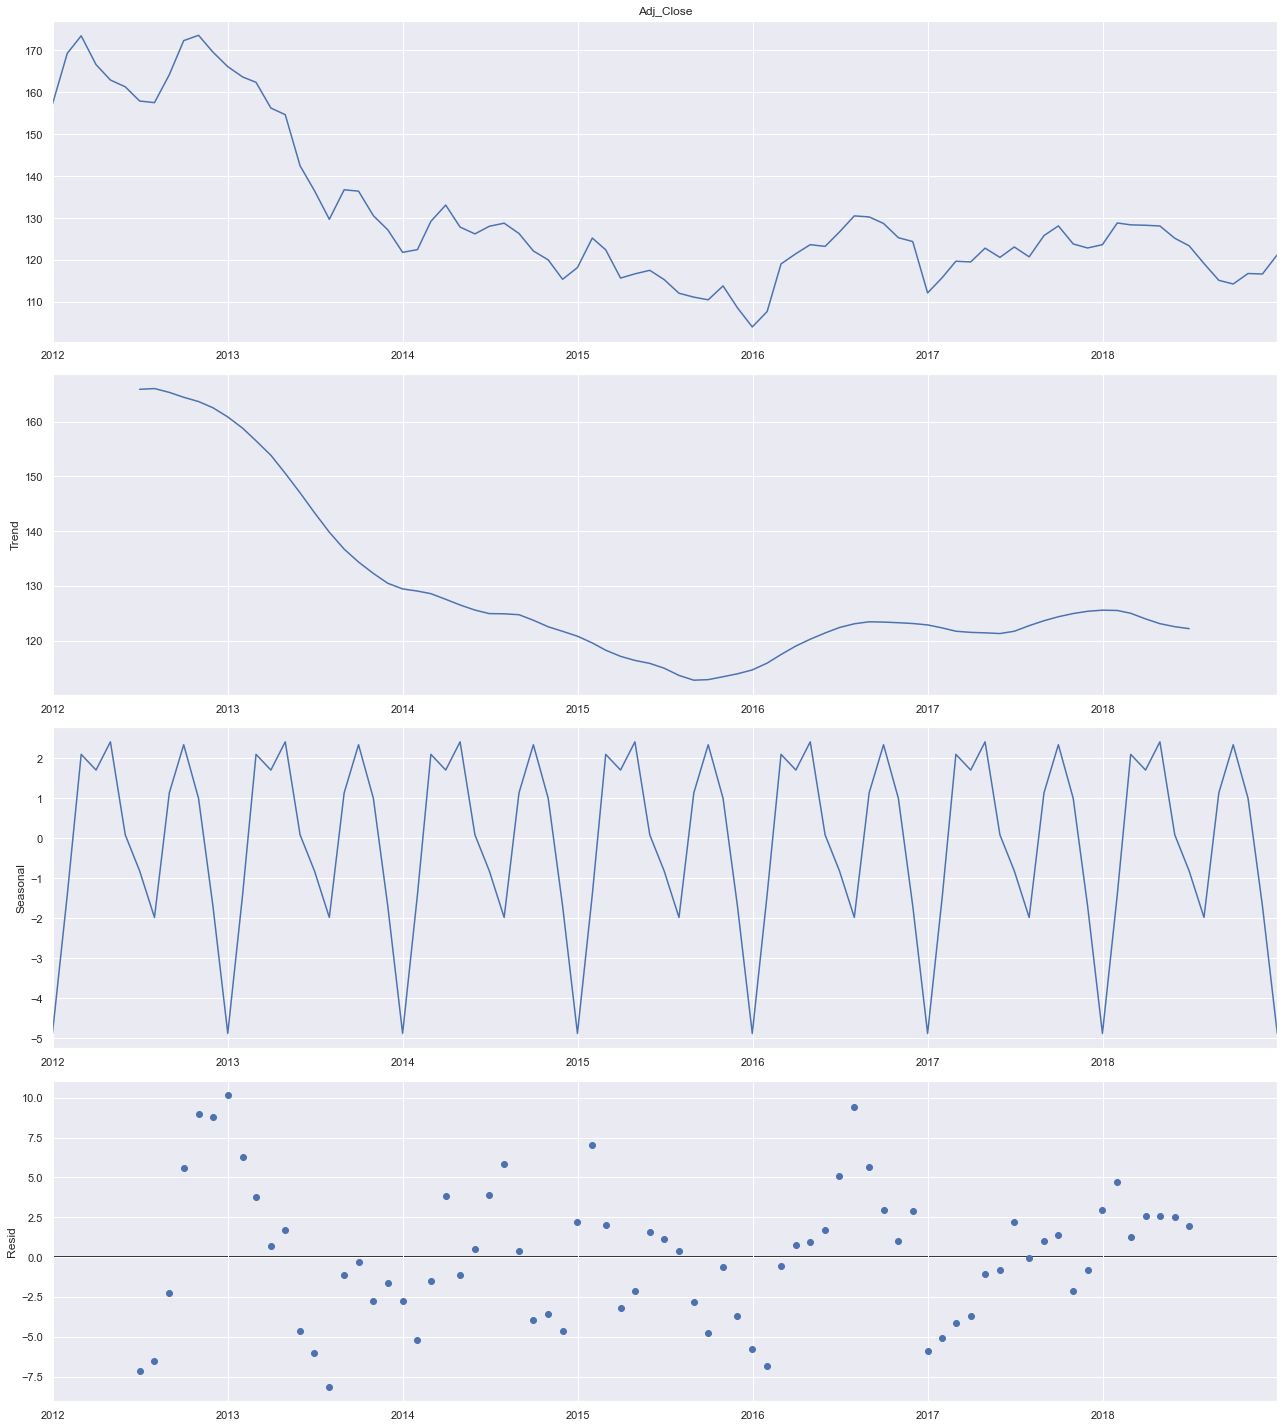

In [39]:
#Decomposition saisonière Adj_Close
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.Adj_Close)
result.plot()
plt.show()

    On observe une forte tendance a la baisse du prix de l'ETF Gold depuis la mis année 2013, la composante siasonière nous indique un schema repetitif d'élément ayant une incidence sur le cout de l'ETF Gold.  Le schema  residuel indique le prix de l'ETF Gold sensible au phénomène aléatoire(portant le prix a la hausse ou a la baisse).

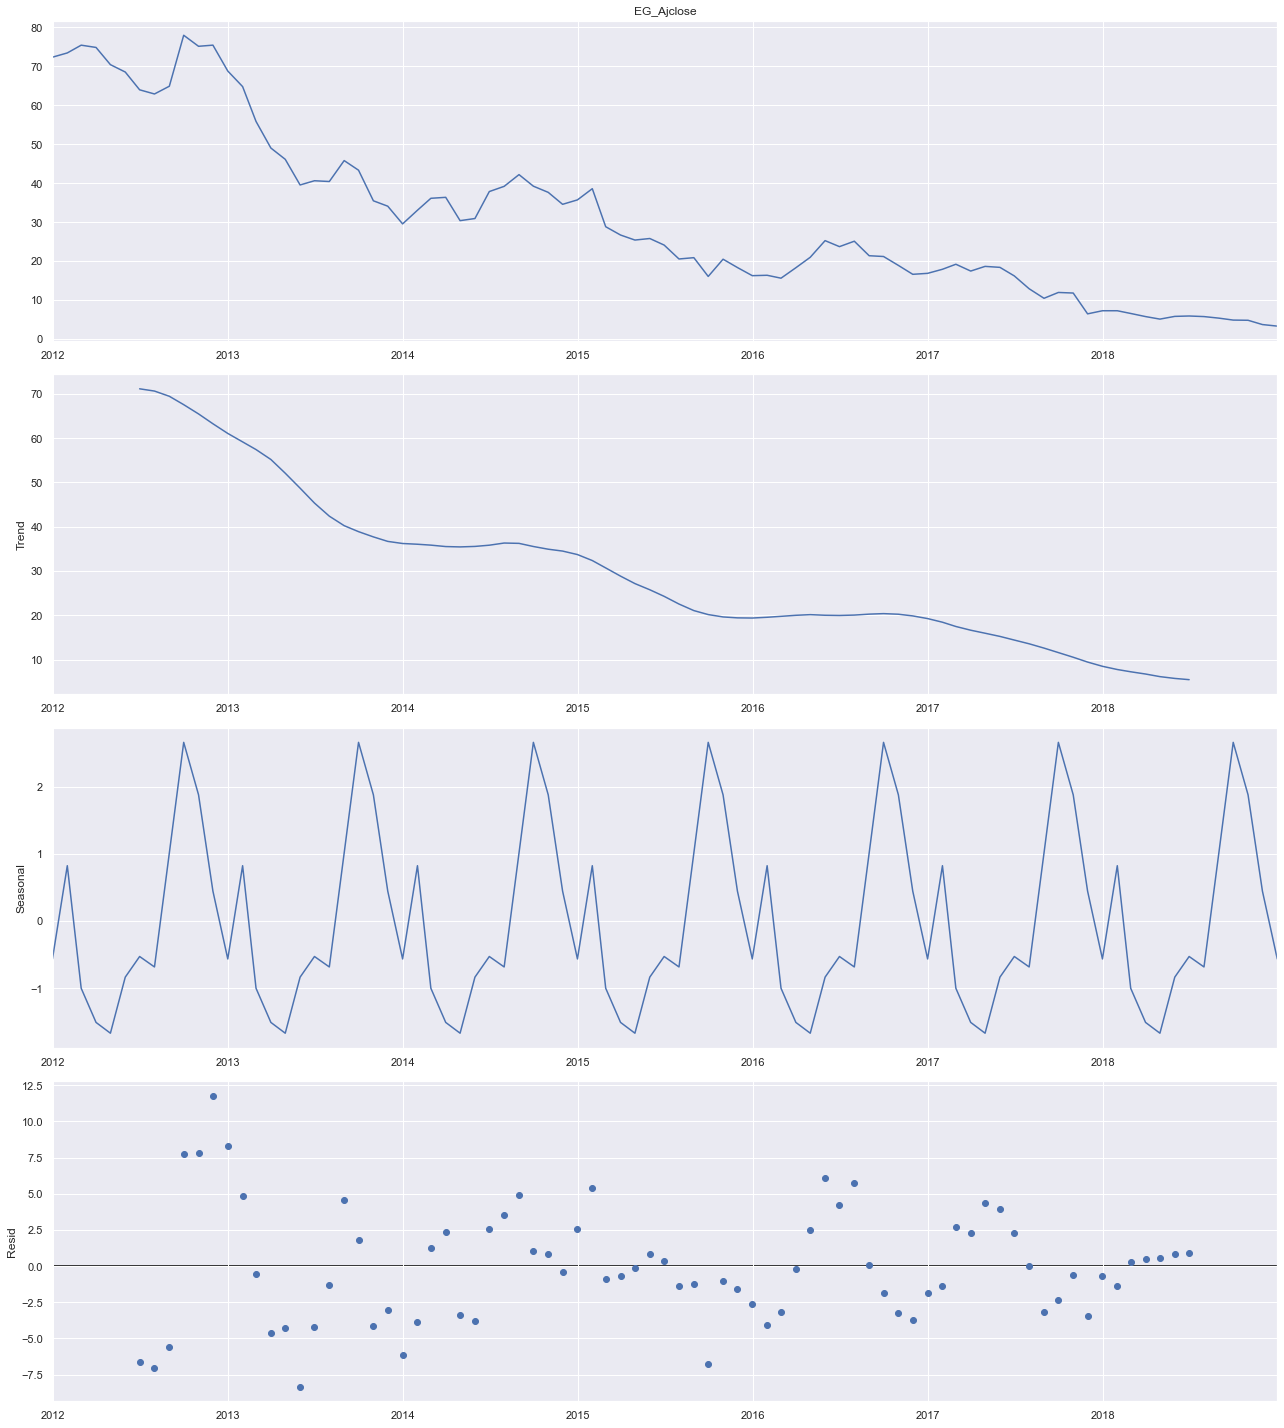

In [40]:
#Decomposition saisonière EG_Ajclose
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.EG_Ajclose)
result.plot()
plt.show()

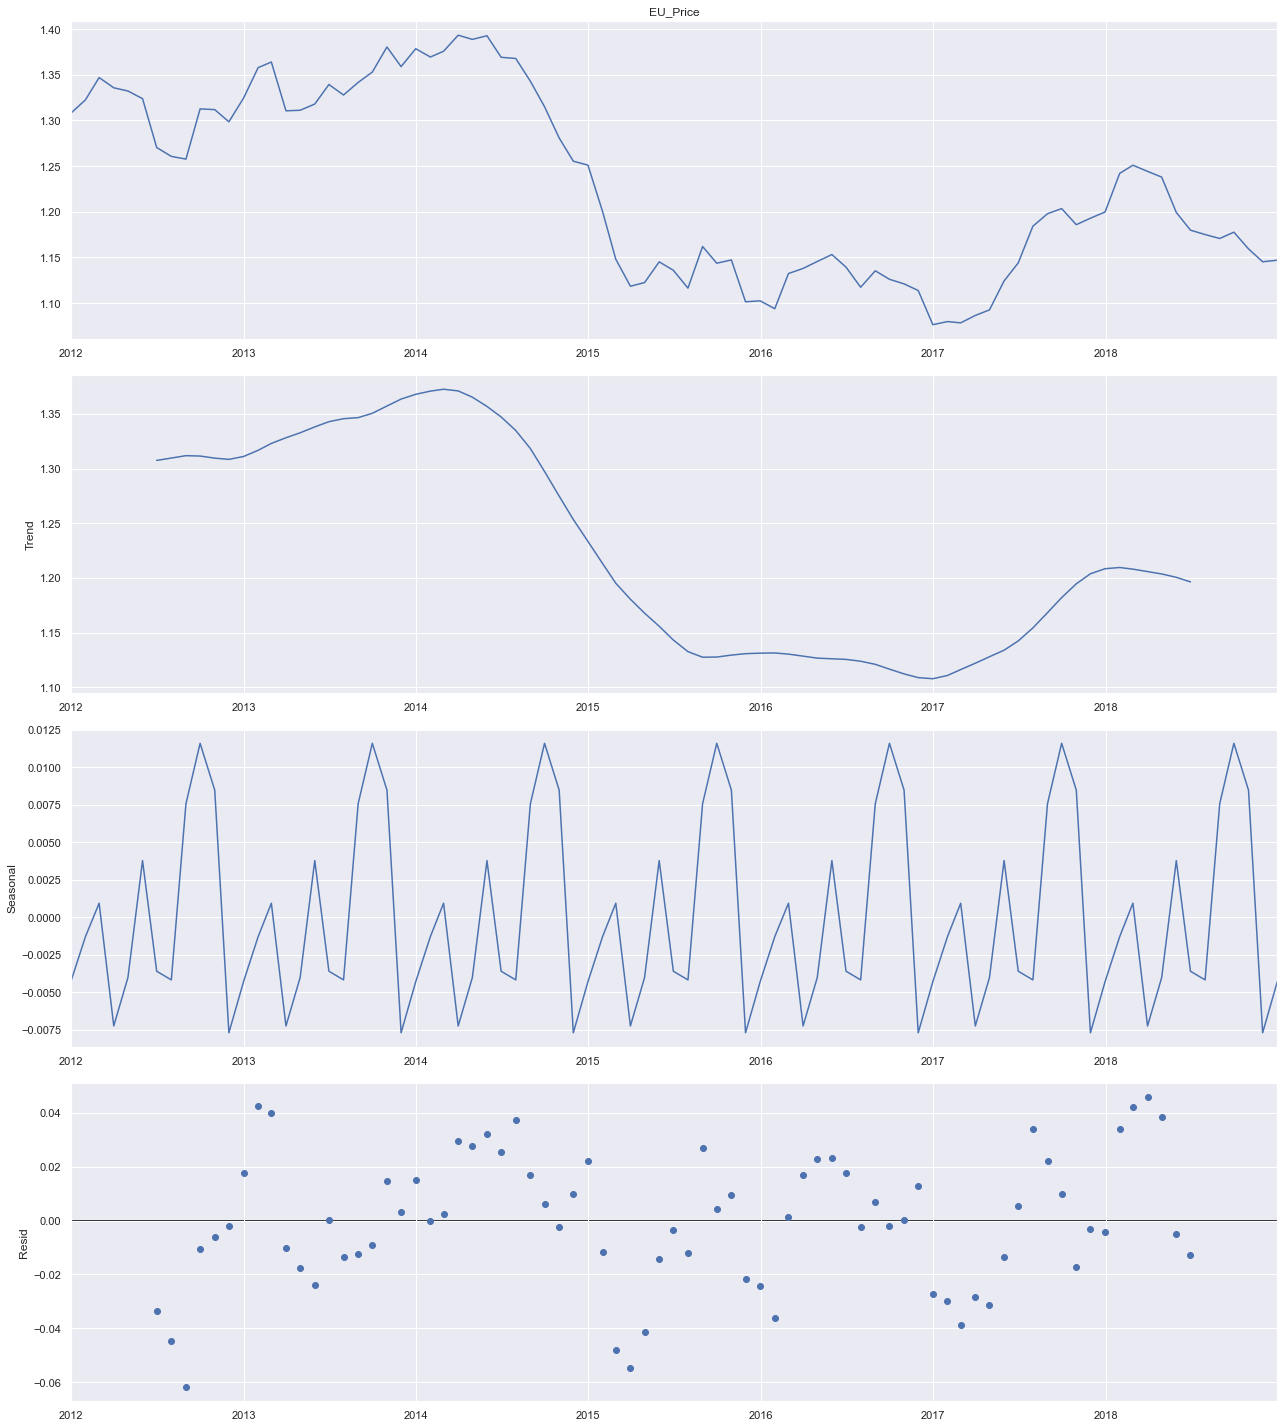

In [41]:
#Decomposition saisonière EU_Price
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.EU_Price)
result.plot()
plt.show()

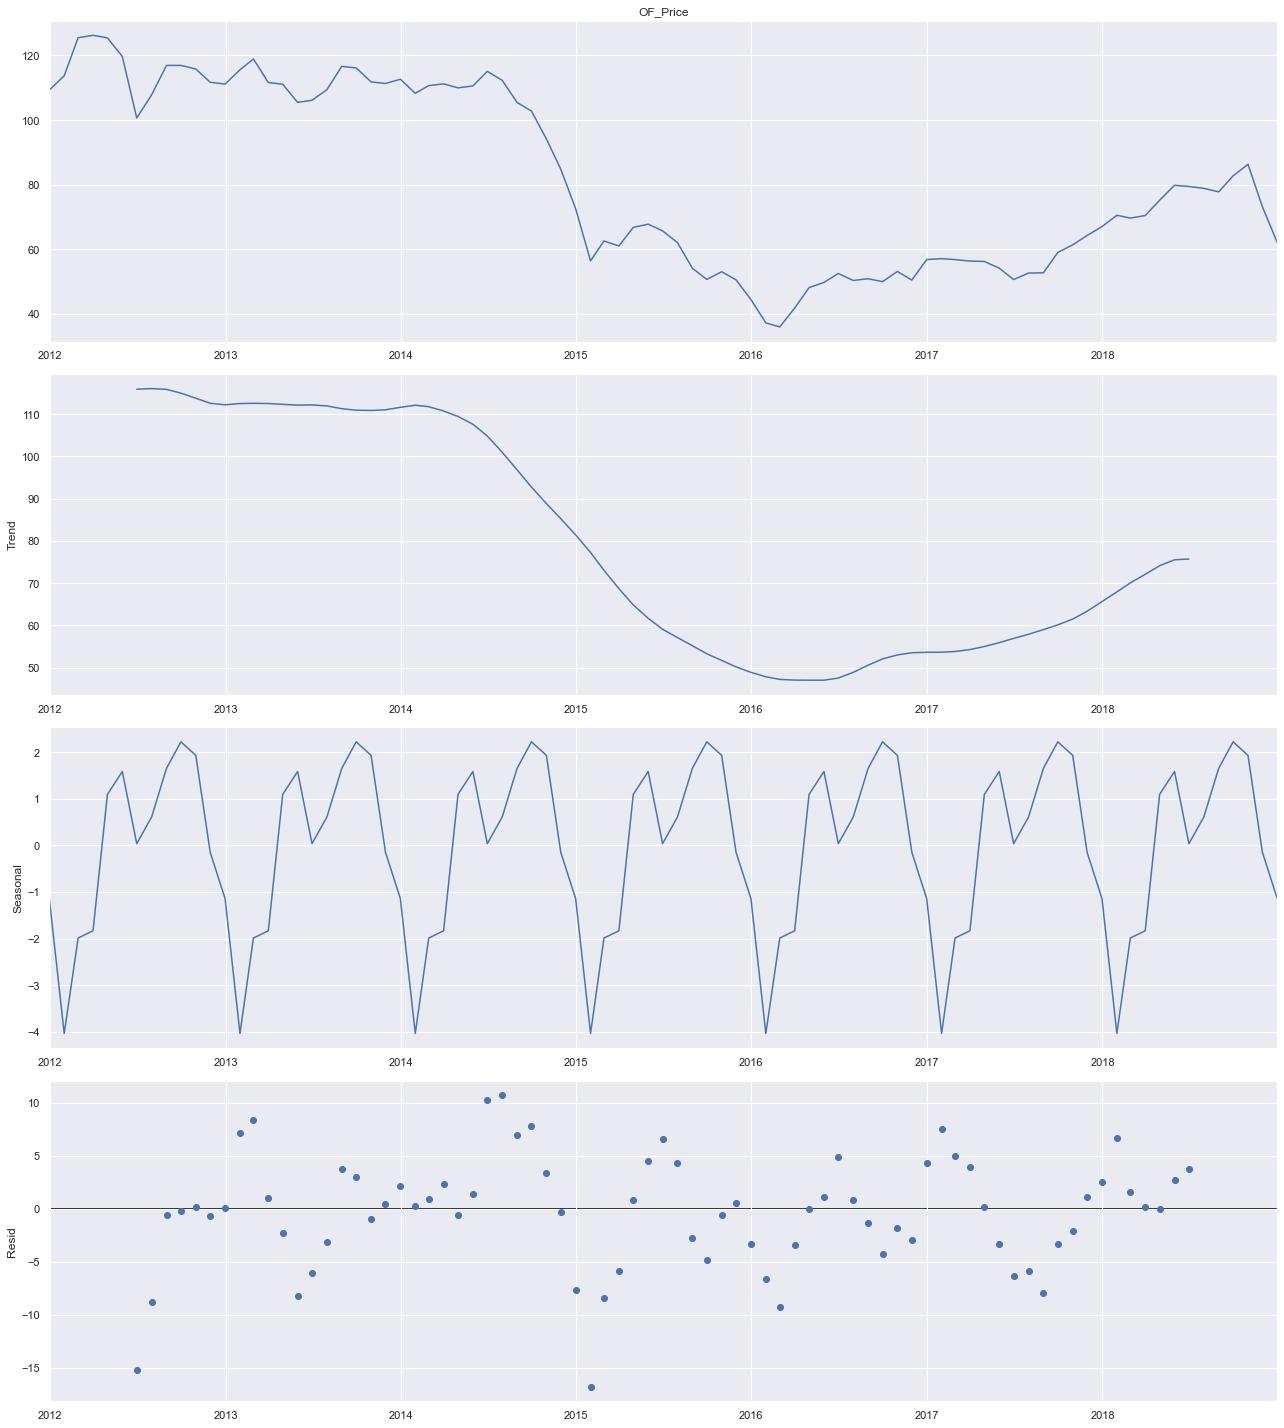

In [42]:
#Decomposition saisonière OF_Price
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.OF_Price)
result.plot()
plt.show()

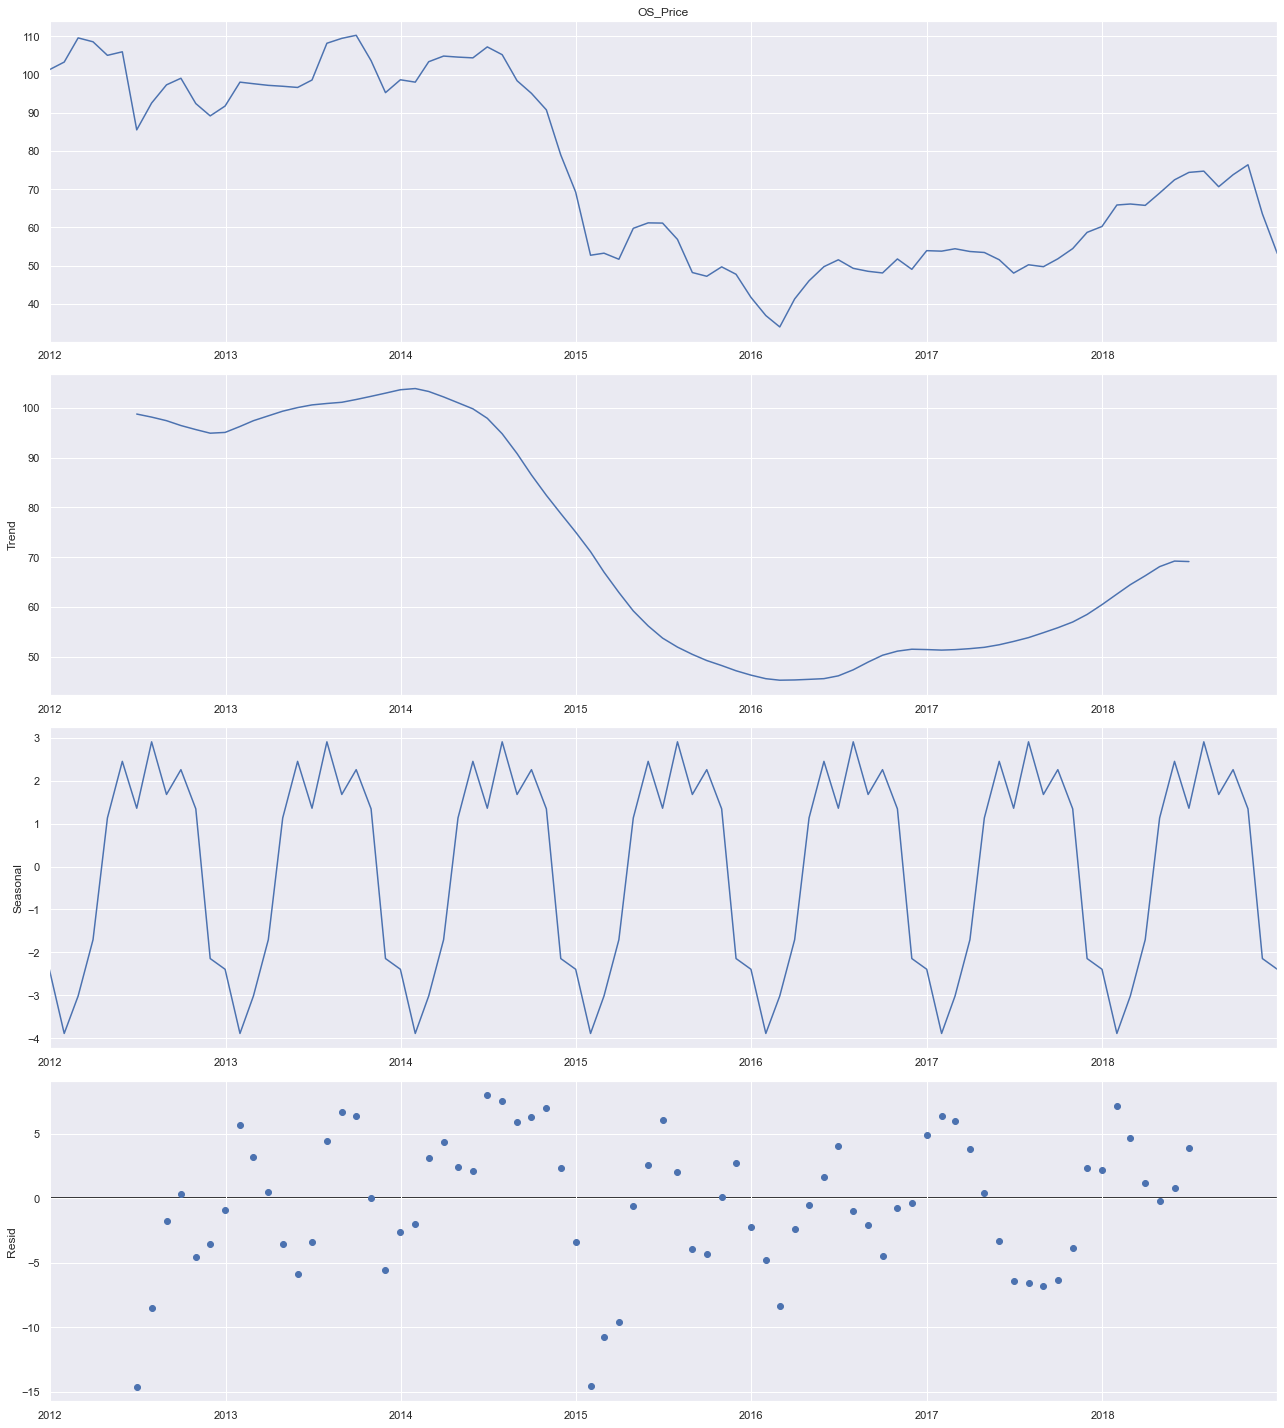

In [43]:
#Decomposition saisonière OS_Price
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.OS_Price)
result.plot()
plt.show()

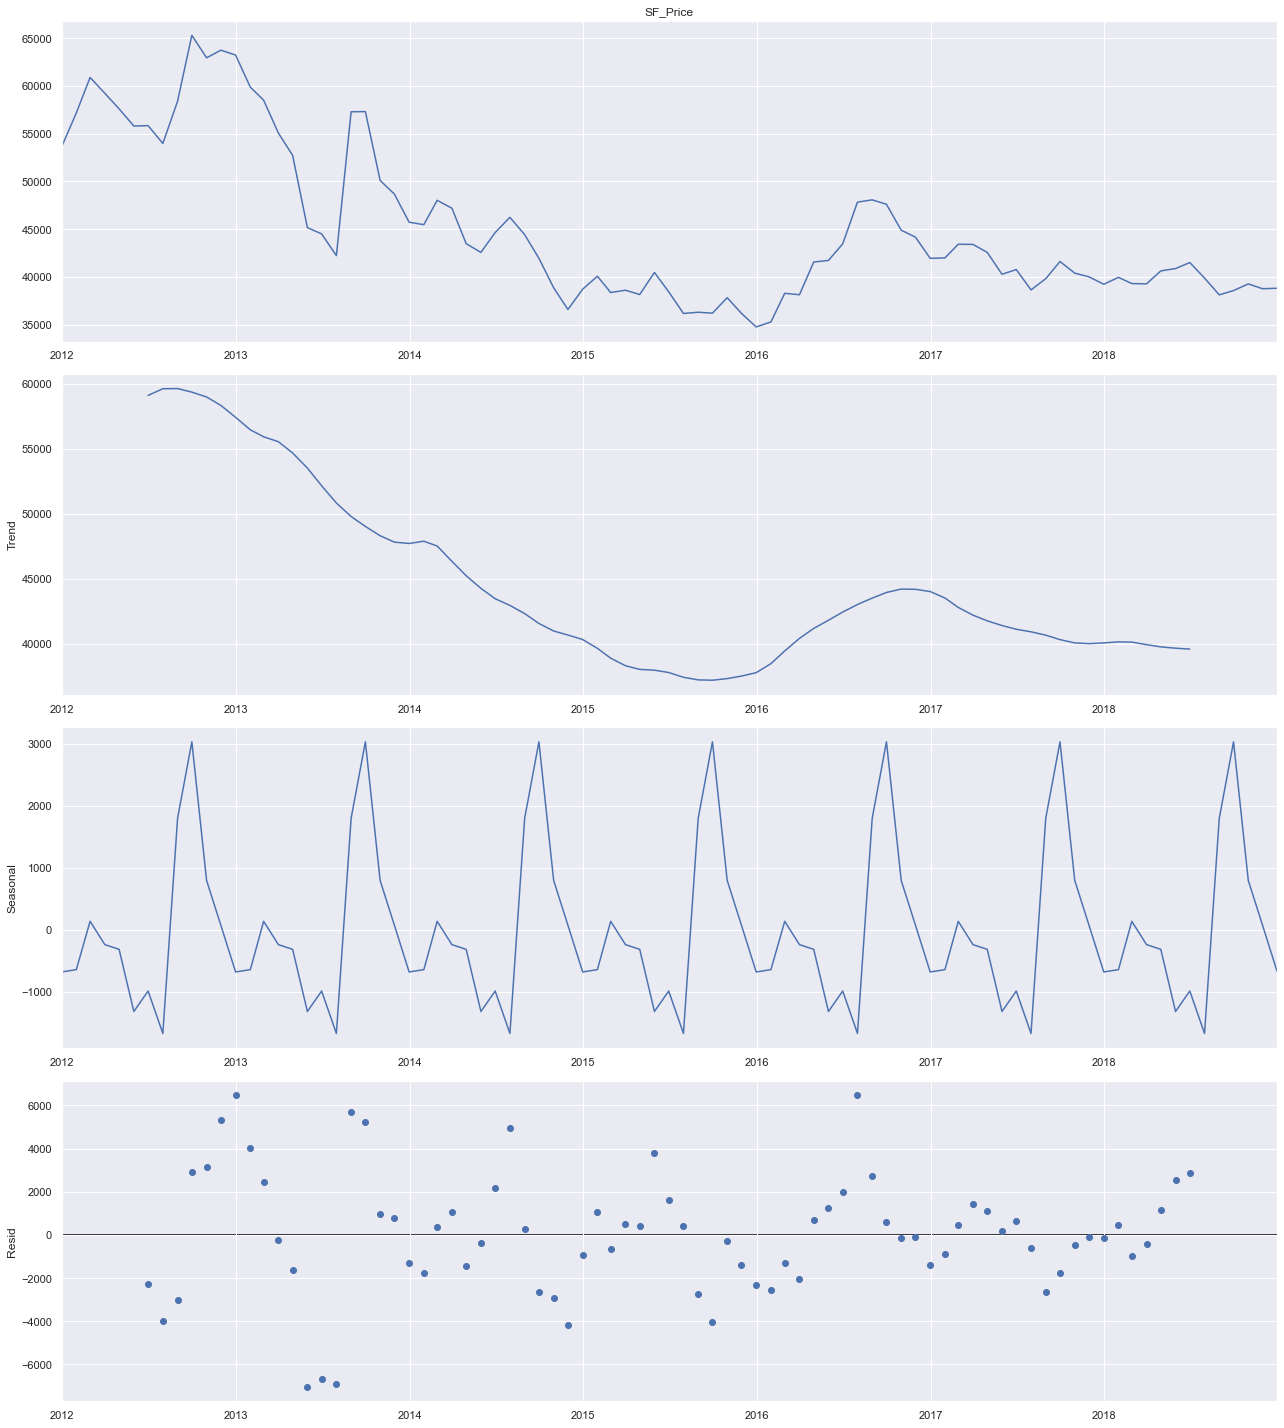

In [44]:
#Decomposition saisonière SF_Price
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.SF_Price)
result.plot()
plt.show()

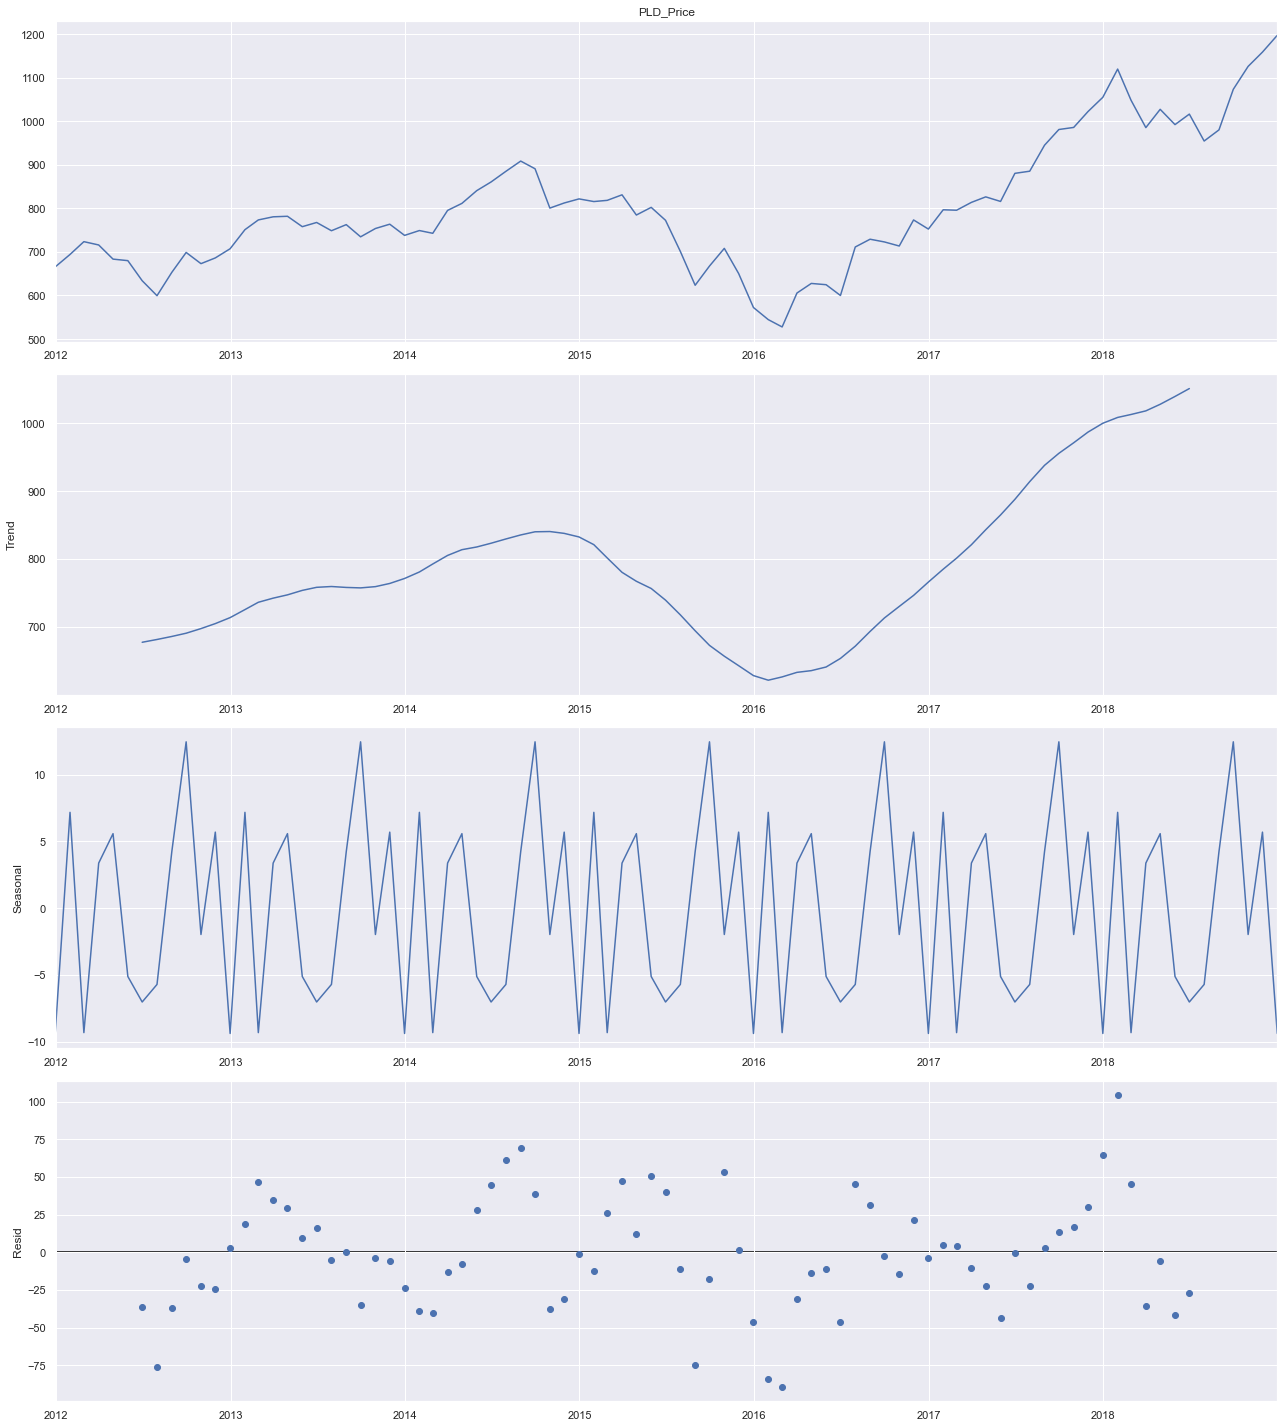

In [45]:
#Decomposition saisonière PLD_Price
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.PLD_Price)
result.plot()
plt.show()

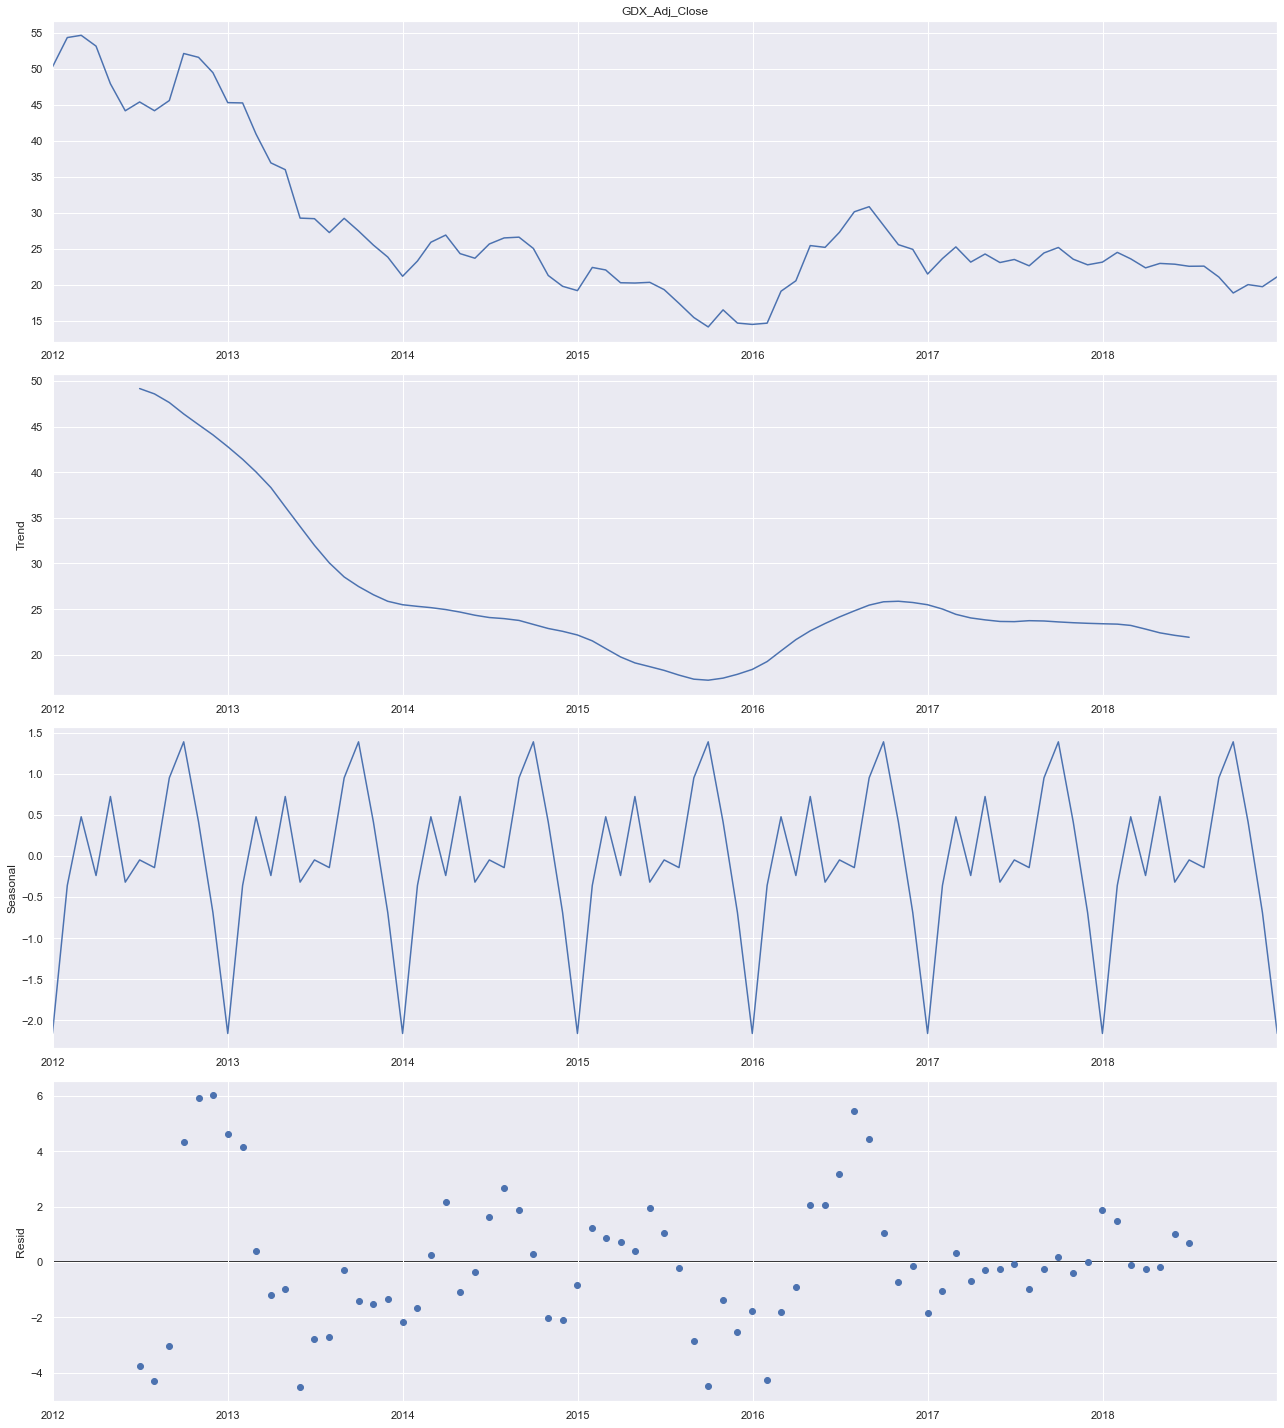

In [46]:
#Decomposition saisonière GDX_Adj_Close
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.GDX_Adj_Close)
result.plot()
plt.show()

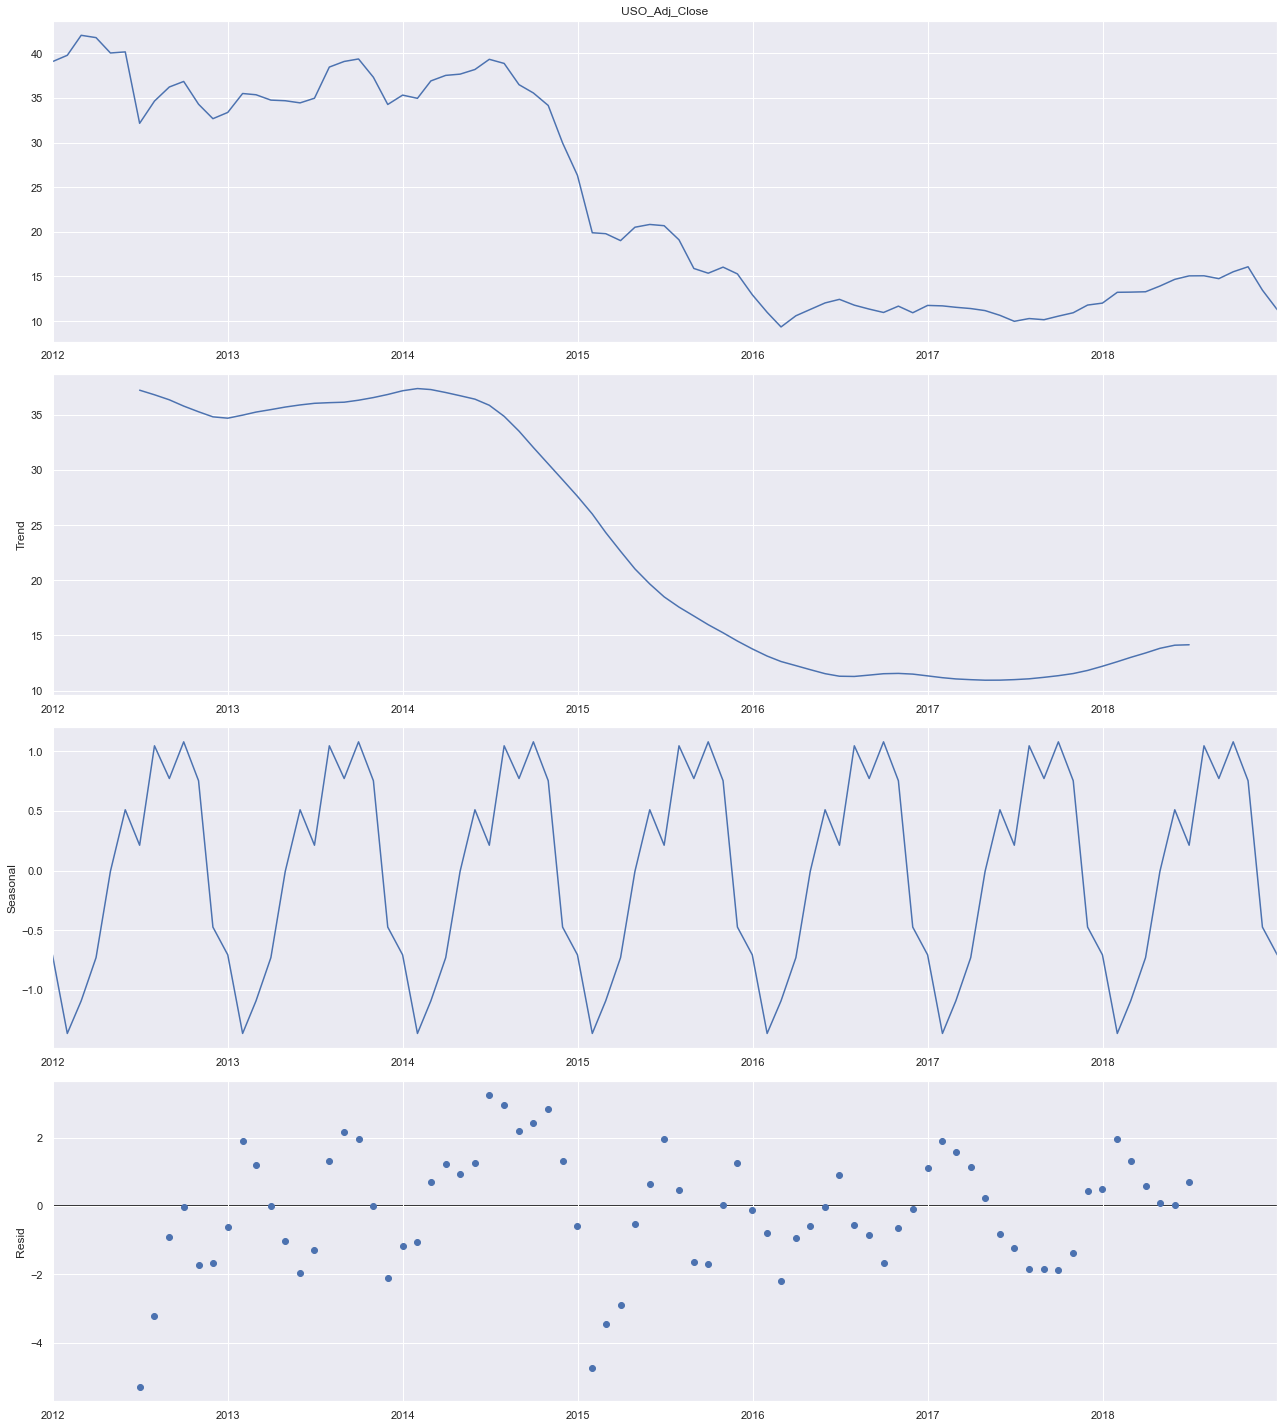

In [47]:
#Decomposition saisonière USO_Adj_Close
plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data_max.USO_Adj_Close)
result.plot()
plt.show()

### Globalement on observe une tendance a la baisse du prix des différentes matières premières ou indices boursiers ayant un impact sur le cout de l'ETF Gold. Egalement, les schemas saisoniers repetitif indique des phenomènes périodique annuel ayant un impact sur le prix de ces différents éléments.  Les différents blocs résiduels indiquants une forte sensibilité des prix aux variations externes (en hausse ou en baisse) .
### Le modèle a construire devra comporter:
### -la composante tendancielle T(t)
### -la composante saisonière S(t)
### -la composante Résiduel Ɛ(t)

### a) Pre-processing

In [48]:
df6

Adj_Close  EG_Ajclose  EU_Price  OF_Price  OS_Price  SF_Price  \
Date                                                                         
2011-12-15  152.330002   70.431755    1.3018    105.09     93.42     53604   
2011-12-16  155.229996   72.364037    1.3035    103.35     93.79     53458   
2011-12-19  154.869995   62.509384    1.2995    103.64     94.09     52961   
2011-12-20  156.979996   64.731514    1.3079    106.73     95.55     53487   
2011-12-21  157.160004   66.180725    1.3045    107.71     99.01     53148   
...                ...         ...       ...       ...       ...       ...   
2018-12-24  120.019997    2.950000    1.1400     50.47     42.27     37541   
2018-12-26  119.660004    3.000000    1.1353     54.47     46.39     38253   
2018-12-27  120.570000    2.950000    1.1430     52.16     45.23     38690   
2018-12-28  121.059998    2.900000    1.1438     52.20     44.92     38706   
2018-12-31  121.250000    2.880000    1.1470     53.80     45.00     38821   

            PLD_Price  GDX_Adj_Close  USO_Adj_Close  
Date                                                 
2011-12-15     618.85      48.973877      36.130001  
2011-12-16     623.65      49.921513      36.270000  
2011-12-19     608.80      48.490578      36.200001  
2011-12-20     626.65      50.215282      37.560001  
2011-12-21     635.90      50.186852      38.110001  
...               ...            ...            ...  
2018-12-24    1172.80      21.090000       9.290000  
2018-12-26    1190.10      20.620001       9.900000  
2018-12-27    1196.00      20.969999       9.620000  
2018-12-28    1185.20      20.600000       9.530000  
2018-12-31    1197.50      21.090000       9.660000  

[1718 rows x 9 columns]

In [49]:
X=df6.drop(["Adj_Close"], axis=1)
X

EG_Ajclose  EU_Price  OF_Price  OS_Price  SF_Price  PLD_Price  \
Date                                                                        
2011-12-15   70.431755    1.3018    105.09     93.42     53604     618.85   
2011-12-16   72.364037    1.3035    103.35     93.79     53458     623.65   
2011-12-19   62.509384    1.2995    103.64     94.09     52961     608.80   
2011-12-20   64.731514    1.3079    106.73     95.55     53487     626.65   
2011-12-21   66.180725    1.3045    107.71     99.01     53148     635.90   
...                ...       ...       ...       ...       ...        ...   
2018-12-24    2.950000    1.1400     50.47     42.27     37541    1172.80   
2018-12-26    3.000000    1.1353     54.47     46.39     38253    1190.10   
2018-12-27    2.950000    1.1430     52.16     45.23     38690    1196.00   
2018-12-28    2.900000    1.1438     52.20     44.92     38706    1185.20   
2018-12-31    2.880000    1.1470     53.80     45.00     38821    1197.50   

            GDX_Adj_Close  USO_Adj_Close  
Date                                      
2011-12-15      48.973877      36.130001  
2011-12-16      49.921513      36.270000  
2011-12-19      48.490578      36.200001  
2011-12-20      50.215282      37.560001  
2011-12-21      50.186852      38.110001  
...                   ...            ...  
2018-12-24      21.090000       9.290000  
2018-12-26      20.620001       9.900000  
2018-12-27      20.969999       9.620000  
2018-12-28      20.600000       9.530000  
2018-12-31      21.090000       9.660000  

[1718 rows x 8 columns]

In [50]:
Y=df6["Adj_Close"]
Y

Date
2011-12-15    152.330002
2011-12-16    155.229996
2011-12-19    154.869995
2011-12-20    156.979996
2011-12-21    157.160004
                 ...    
2018-12-24    120.019997
2018-12-26    119.660004
2018-12-27    120.570000
2018-12-28    121.059998
2018-12-31    121.250000
Name: Adj_Close, Length: 1718, dtype: float64

In [51]:
from sklearn.preprocessing import RobustScaler

In [52]:
stand = RobustScaler()
X_trans= pd.DataFrame(stand.fit_transform(X),index=X.index.tolist(), columns = X.columns)
X_trans

EG_Ajclose  EU_Price  OF_Price  OS_Price  SF_Price  PLD_Price  \
2011-12-15    2.112873  0.637348  0.629301  0.633633  1.528017  -0.699777   
2011-12-16    2.197887  0.646549  0.597994  0.641790  1.510964  -0.673829   
2011-12-19    1.764317  0.624899  0.603212  0.648404  1.452916  -0.754105   
2011-12-20    1.862082  0.670365  0.658810  0.680593  1.514352  -0.657612   
2011-12-21    1.925843  0.651962  0.676443  0.756876  1.474757  -0.607609   
...                ...       ...       ...       ...       ...        ...   
2018-12-24   -0.856088 -0.238430 -0.353470 -0.494075 -0.348118   2.294750   
2018-12-26   -0.853888 -0.263870 -0.281499 -0.403241 -0.264958   2.388269   
2018-12-27   -0.856088 -0.222192 -0.323062 -0.428816 -0.213917   2.420164   
2018-12-28   -0.858288 -0.217862 -0.322343 -0.435650 -0.212048   2.361781   
2018-12-31   -0.859168 -0.200541 -0.293554 -0.433886 -0.198616   2.428272   

            GDX_Adj_Close  USO_Adj_Close  
2011-12-15       4.175865       0.859283  
2011-12-16       4.326350       0.865364  
2011-12-19       4.099116       0.862324  
2011-12-20       4.373001       0.921390  
2011-12-21       4.368486       0.945277  
...                   ...            ...  
2018-12-24      -0.252112      -0.306406  
2018-12-26      -0.326749      -0.279913  
2018-12-27      -0.271169      -0.292074  
2018-12-28      -0.329925      -0.295983  
2018-12-31      -0.252112      -0.290337  

[1718 rows x 8 columns]

### b) Modelisation sans tenir compte de la date

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_trans,Y, test_size=0.2,random_state=0)

In [54]:
print("x_train set : " ,x_train.shape)
print("x_test set : " ,x_test.shape)
print("y_train set : ", y_train.shape)
print("y_train set : ", y_test.shape)

x_train set :  (1374, 8)
x_test set :  (344, 8)
y_train set :  (1374,)
y_train set :  (344,)


In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_squared_error

### Regression Linéaire

In [57]:
from sklearn.linear_model import LinearRegression

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred=model.predict(x_test)
y_pred

array([120.04371089, 115.80016326, 116.27582245, 104.53548154,
       117.98010806, 121.13519372, 162.05106196, 109.37037757,
       119.13746545, 122.32370672, 117.79499864, 150.23883832,
       107.35068666, 130.76754045, 132.32248617, 115.64939779,
       119.52099605, 127.70084957, 105.3554434 , 131.02736658,
       160.17035909, 124.50115128, 160.60712958, 152.7525755 ,
       116.06438523, 133.88148364, 128.61795444, 122.50806489,
       122.00342513, 105.90409229, 149.55408776, 133.37744632,
       114.19785017, 115.93580793, 125.32082262, 157.85098962,
       113.5890923 , 171.91996305, 112.22218263, 117.71571568,
       116.14838259, 117.05650824, 122.84117977, 130.7906814 ,
       111.69364378, 110.58282343, 161.78554024, 128.39330826,
       131.25821154, 127.31878414, 171.62886789, 151.45598922,
       173.03384459, 117.46858153, 120.2089912 , 166.42490232,
       161.13635973, 120.59312694, 128.22899078, 117.67186266,
       115.95227606, 114.36965994, 159.88773912, 123.23

In [59]:
#from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_squared_error

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [ -0.67637813   6.70925977  19.41116203 -21.06507207   3.68510901
   0.17137503   8.2392581   -0.36060321]
Mean Absolute Error: 2.292527502630668
Coefficient of Determination: 0.9730782577918251


#### Avec la prediction de la Regression Linéaire, on obtient une valeur du coeficient de Détermination a 0.973 soit r2=97%, qui inqdique une bonne qualité de prediction pour un seuil de (+ ou-)0.03%. 

     En somme , le modèle de Régression linéaire est plus adapté pour le prédiction des des futurs coûts de l'ETF Gold ,     dans le context actuel de nos Données. 

### Dignostic a postériori du model de regression linéaire

    Nous allons vérifier a posteriori les hypothèses du modèle linéaire et déterminer si il y a des individus qui influence
    beaucoup le modèle au point d’en modifier la structure.
    
    Les différents points arbordés seront :
       
    a-1. L’hypothèse de linéarité.
    
    a-2. Diagnostic, vérification des hypothèse sur les résidus . ( Homoscedasticity ou Hétéroscedasticity).
    
    a-3. test de normalité
    
    a-4. test d'autocorrelation



### a-1. L’hypothèse de linéarité.

    L'hypothèse de linéarité vérifiée avec les variables retenues ayant un coeficient de corrélation linéaire avec la target >=50% 

### a-2. Hypothèse sur les résidus.
####  vérification de la nullité de la somme des erreurs

In [59]:
#La première hypothèse sur les résidus est que la moyenne de celle doit etre null E(εi)=0.
#Pour calculer les residus, l'on va creer un vecteur y_pred2, de meme taille que x_train afin de calculer la somme des écarts éléments par éléments
y_pred2 = model.predict(x_train)

residuals = y_train.values-y_pred2
mean_residuals = np.mean(residuals)
print("Somme des Résidus : {}".format(mean_residuals))

Somme des Résidus : 1.3342068837416728e-15


     On constate que la somme des résidus est est très inférieurs à 0 donc on peut conclure que E(εi)=0, l'hypothèse est      donc vérifiée.

### a3- test de normalité

#### vérification  de la constance ou non de la variance . ( Homoscedasticité ou Hétéroscedasticité).

    vérification de la constance de la variance et test de normalité

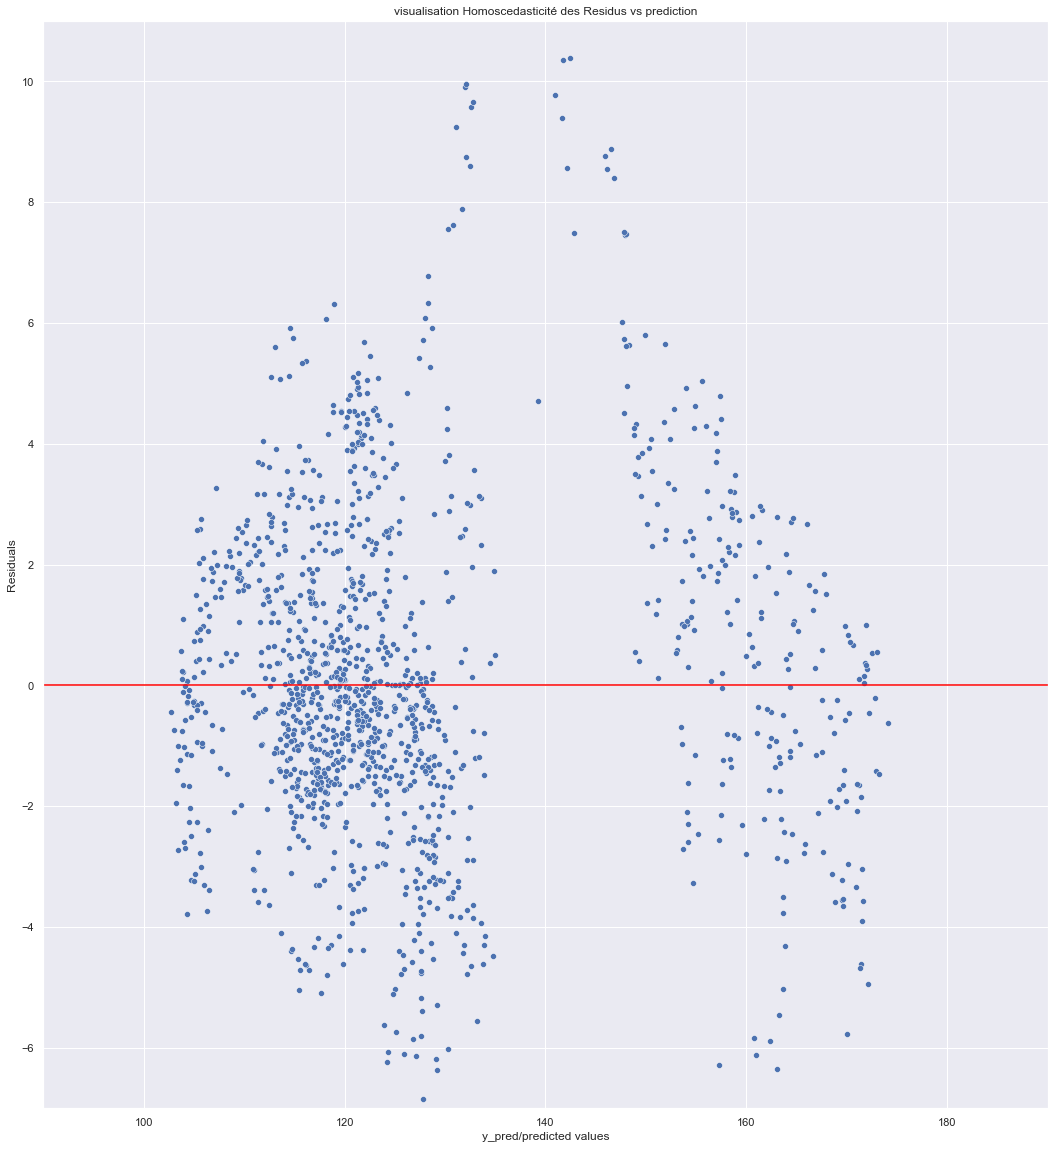

In [60]:
p = sns.scatterplot(y_pred2,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-7,11)
plt.xlim(90,190)
p = sns.lineplot([90,190],[0,0],color='red')
p = plt.title('visualisation Homoscedasticité des Residus vs prediction')
plt.show()

    Formulation des Hypothèses:
    
    Hypothesis Null(HO): les residus ont une variance constante (Homoscedasticité)
    Hypothesis Alternative (H1): les residus n'ont pas  une variance constante (Hétéroscedasticité).
    
    On procèdera pour cela par : 
    ** test graphique
    ** test de shapiro
    ** test de levene

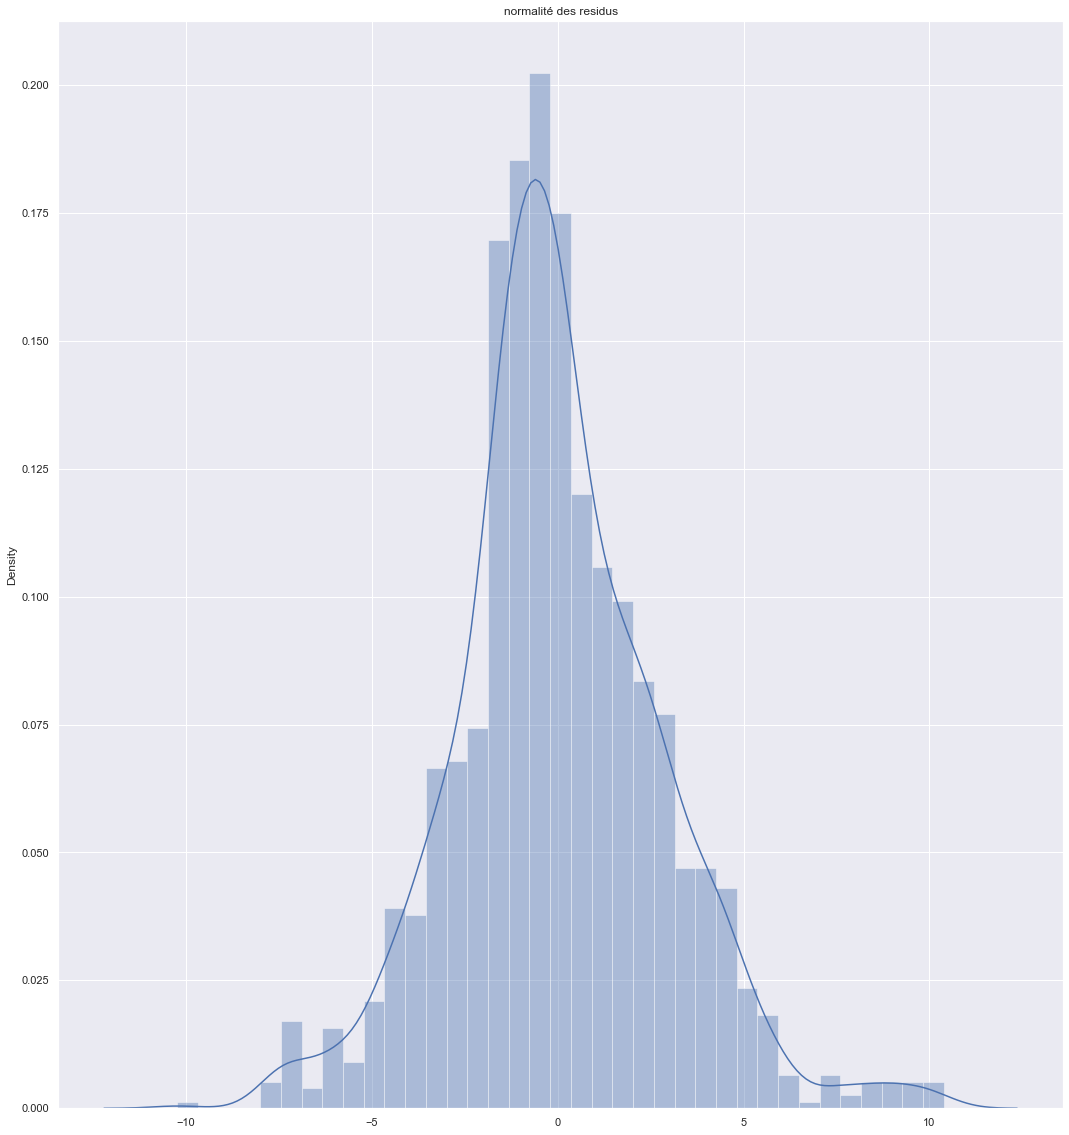

In [61]:
#test graphique
p1 = sns.distplot(residuals,kde=True)
p1 = plt.title('normalité des residus')

      Graphiquement, la distribution des residus tend a être normal, en suivant le Théoreme central limite qui stiplue " plus les données augmente, a distribution tend a être normal".
      Nous allons tester la normalité des résidus avec des test Statistiques.

##### test de Shapiro

In [62]:
from scipy.stats import shapiro
data = residuals
stat, p = shapiro(data)
print(stat, p)
if p > 0.05:
    print("les residus suivents une Distribution Normal")
else:
    print("les residus ne suivents pas une Distribution Normal")

0.9825490713119507 7.837785975794986e-12
les residus ne suivents pas une Distribution Normal


##### test de levene

In [63]:
from scipy.stats import levene
stat, p = levene(y_pred2,residuals)

print(stat, p)

689.4549129544484 9.122508259036835e-136


     Les différents test de normalités nous donnent des P-value Strictement inférieur a 0.05. On conclue donc qu'il n'y a pas Homoscedasticité, on rejete donc H0

### a4 Vérification graphique d'autocorrelation

    Lorsque les résidus sont autocorrélés, cela signifie que la valeur actuelle dépend des valeurs précédentes et qu'il existe un modèle inexpliqué défini dans la variable Y qui apparaît dans les termes d'erreur.

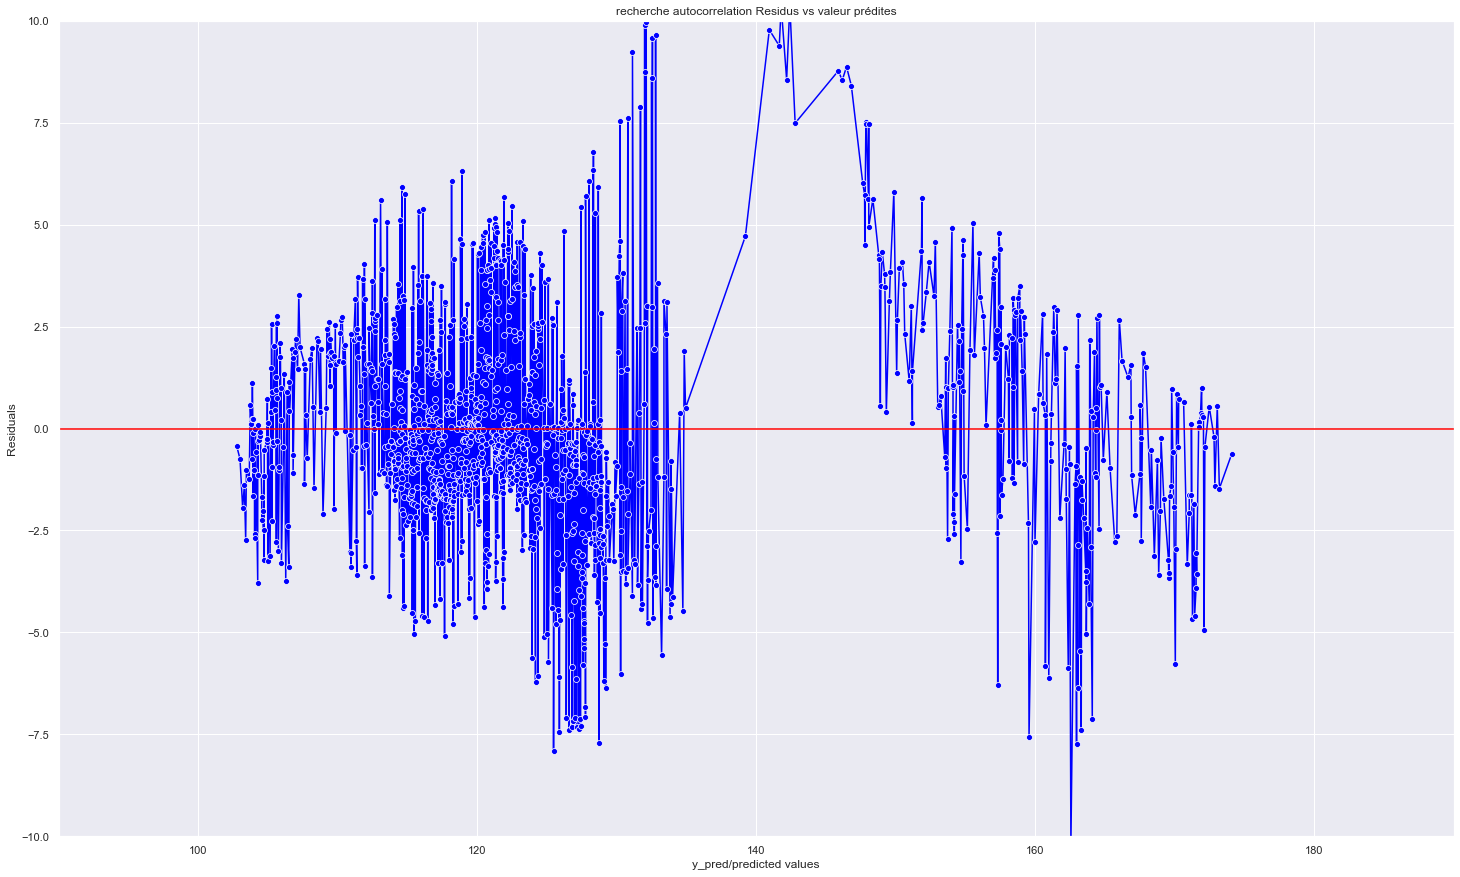

In [64]:
plt.figure(figsize=(25,15))
p = sns.lineplot(y_pred2,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(90,190)
p = sns.lineplot([90,190],[0,0],color='red')
p = plt.title('recherche autocorrelation Residus vs valeur prédites')

    formulation des hypothèses:
    
    Hypothese Null:  absence d'Autocorrelation
    Hypothese Alternative: presence d'Autocorrelation
    seuil de la p-value : 0.05

##### test avec ljungbox

In [65]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.2759591290983338

##### test avec la statistique de Durbin Waston

In [66]:
from statsmodels.stats.stattools import durbin_watson 
  
res = residuals
dw_test = durbin_watson(res) 
  
print(dw_test) 

1.9852410489361847


     On obtien une p-value > a 0.05, alors on peut conclure qu'il n'y a pas d'autocorrelation et obtient le coefficient du test de waston très proche de 2, cela nous indique qu'il n'y à pas d'auto-corrélation linéaire , on  accepter H0.

## Alternative au modèle de regression Linéaire

##### XGBoost Classifier

In [59]:
from xgboost import XGBClassifier

In [60]:
clf=XGBClassifier(n_estimators=100,max_depth=3,n_jobs=8,booster='gbtree',random_state=0)

In [61]:
clf.fit(x_train,y_train)

[05:21:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred=clf.predict(x_test)


In [63]:
y_pred

array([122.209999, 117.639999, 116.360001, 119.059998, 115.650002,
       125.800003, 156.979996, 111.760002, 117.639999, 119.510002,
       116.      , 152.300003, 106.160004, 125.389999, 127.150002,
       114.720001, 115.199997, 122.849998, 117.110001, 134.149994,
       157.210007, 118.290001, 163.350006, 155.360001, 113.419998,
       134.149994, 122.900002, 122.209999, 126.57    , 104.860001,
       154.      , 133.919998, 113.230003, 113.800003, 126.849998,
       157.75    , 113.760002, 167.139999, 111.5     , 118.519997,
       117.010002, 112.669998, 123.230003, 129.210007, 114.720001,
       112.019997, 162.020004, 123.989998, 127.400002, 124.269997,
       132.009995, 153.470001, 171.470001, 119.510002, 119.860001,
       159.570007, 161.059998, 117.059998, 124.529999, 115.510002,
       115.540001, 115.199997, 132.199997, 121.470001, 116.029999,
       127.849998, 115.269997, 157.139999, 119.059998, 116.059998,
       124.879997, 125.720001, 156.279999, 114.099998, 124.970

In [64]:
#y_pred = y_pred.astype(int)
#y_pred

In [64]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: continuous is not supported

       Le Modèle xgboost classifier  n'est clairement pas adapté pour la prédiction sans tenir compte des dates.

#### XGBRegressor

In [65]:
from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X_trans,Y, test_size=0.2,random_state=0)

In [66]:
print("x_train_1 set : " ,x_train.shape)
print("x_test_1 set : " ,x_test.shape)
print("y_train_1 set : ", y_train.shape)
print("y_train_1 set : ", y_test.shape)

x_train_1 set :  (1374, 8)
x_test_1 set :  (344, 8)
y_train_1 set :  (1374,)
y_train_1 set :  (344,)


In [67]:
from xgboost import XGBRegressor

In [68]:
clf_xg_reg1=XGBRegressor(n_estimators=100,n_jobs=8,booster='gblinear',random_state=0)

In [69]:
clf_xg_reg1.fit(x_train_1,y_train_1)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=8, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [71]:
y_pred_xgreg1=clf_xg_reg1.predict(x_test_1)

In [72]:
y_pred_xgreg1

array([122.9748  , 115.44089 , 116.78215 , 105.263306, 119.38922 ,
       121.43158 , 161.9736  , 108.41958 , 120.12925 , 121.09411 ,
       118.77972 , 148.79608 , 106.77278 , 129.79706 , 132.1183  ,
       116.59171 , 121.65689 , 128.06549 , 103.17064 , 132.64282 ,
       162.06935 , 123.54155 , 162.32689 , 150.55942 , 115.83712 ,
       136.2171  , 127.65863 , 122.00216 , 121.04729 , 104.79062 ,
       148.22638 , 131.08372 , 115.477425, 115.59285 , 123.68523 ,
       158.23024 , 115.21526 , 169.90414 , 112.39836 , 120.23526 ,
       118.59972 , 119.01763 , 122.299355, 131.1494  , 110.73271 ,
       111.12197 , 162.87726 , 129.4553  , 131.23154 , 126.241936,
       171.16394 , 147.45749 , 175.28714 , 120.60881 , 119.949425,
       164.93661 , 162.68507 , 116.10392 , 128.18953 , 114.62265 ,
       117.03695 , 116.12002 , 158.08316 , 122.67331 , 115.58416 ,
       125.484474, 120.279076, 155.52402 , 105.476135, 120.25336 ,
       124.35814 , 122.93232 , 150.56062 , 111.77368 , 122.531

In [75]:
print("Model Coefficients:", clf_xg_reg1.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test_1, y_pred_xgreg1))
print("Coefficient of Determination:", r2_score(y_test_1, y_pred_xgreg1))

Model Coefficients: [ 10.2432     8.14135   12.325      2.70416    3.19328    0.267859
   5.0043   -27.5256  ]
Mean Absolute Error: 2.6128287748001457
Coefficient of Determination: 0.9658597752702146


#### Avec la prediction du XGBoostRegressor() , on obtient une valeur du coeficient de Détermination a 0.965 soit r2=96%, qui inqdique une bonne qualité de prediction pour un seuil de (+ ou-)0.04%. 

### Prédiction du cours de l'or ETF avec des modèles de Deep learning (pytorch ou tensorflow-keras) tenant compte de la date

In [60]:
#importation des librairy
import tensorflow

In [61]:
### Create the Stacked LSTM model  # importation des modules necessaire a la constriction du modèle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
#création d'un nouveau Dataframe pour ce cas d'exemple
df7=df6.copy()

In [63]:
df7

Adj_Close  EG_Ajclose  EU_Price  OF_Price  OS_Price  SF_Price  \
Date                                                                         
2011-12-15  152.330002   70.431755    1.3018    105.09     93.42     53604   
2011-12-16  155.229996   72.364037    1.3035    103.35     93.79     53458   
2011-12-19  154.869995   62.509384    1.2995    103.64     94.09     52961   
2011-12-20  156.979996   64.731514    1.3079    106.73     95.55     53487   
2011-12-21  157.160004   66.180725    1.3045    107.71     99.01     53148   
...                ...         ...       ...       ...       ...       ...   
2018-12-24  120.019997    2.950000    1.1400     50.47     42.27     37541   
2018-12-26  119.660004    3.000000    1.1353     54.47     46.39     38253   
2018-12-27  120.570000    2.950000    1.1430     52.16     45.23     38690   
2018-12-28  121.059998    2.900000    1.1438     52.20     44.92     38706   
2018-12-31  121.250000    2.880000    1.1470     53.80     45.00     38821   

            PLD_Price  GDX_Adj_Close  USO_Adj_Close  
Date                                                 
2011-12-15     618.85      48.973877      36.130001  
2011-12-16     623.65      49.921513      36.270000  
2011-12-19     608.80      48.490578      36.200001  
2011-12-20     626.65      50.215282      37.560001  
2011-12-21     635.90      50.186852      38.110001  
...               ...            ...            ...  
2018-12-24    1172.80      21.090000       9.290000  
2018-12-26    1190.10      20.620001       9.900000  
2018-12-27    1196.00      20.969999       9.620000  
2018-12-28    1185.20      20.600000       9.530000  
2018-12-31    1197.50      21.090000       9.660000  

[1718 rows x 9 columns]

In [64]:
#creation d'ue dataframe pour la variable a prédire
df8=df7.reset_index()['Adj_Close']
df8

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Adj_Close, Length: 1718, dtype: float64

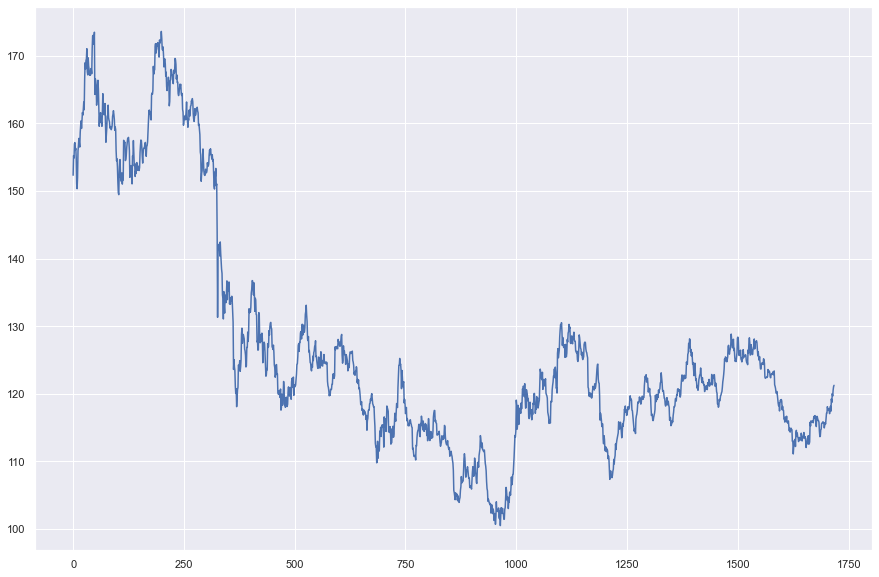

In [65]:
#Visualisation de la variable a prédire
plt.figure(figsize=(15,10))
plt.plot(df8);

In [66]:
#Utilisation du MinMaxScaler afin de transformer les données au vu du grand nombre de valeur outliers dans le dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df8=scaler.fit_transform(np.array(df8).reshape(-1,1))
df8

array([[0.70893176],
       [0.74859794],
       [0.74367384],
       ...,
       [0.27451785],
       [0.28122005],
       [0.2838189 ]])

In [67]:
##creation d'ensemble de test et d'entrainement sur la variable Adj_Close dans df8
training_size=int(len(df8)*0.80)
test_size=len(df8)-training_size
train_data,test_data=df8[0:training_size,:],df8[training_size:len(df1),:1]

In [68]:
#taille du train data et du test data
training_size,test_size

(1374, 344)

In [69]:
#visualisation du jeu d'entrainement
train_data

array([[0.70893176],
       [0.74859794],
       [0.74367384],
       ...,
       [0.26480647],
       [0.28463955],
       [0.29694978]])

In [70]:
#fonction de creation des datasets sous forme matricielle
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [71]:
#redimensionnement des vecteurs
# a cause du numpy appelé dans la fonction "create_dataset()"
import numpy   
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [72]:
#visualisation des dimentions des  train sets
print(X_train.shape), print(y_train.shape)

(1273, 100)
(1273,)


(None, None)

In [73]:
#visualisation des dimentions des  test sets
print(X_test.shape), print(ytest.shape)

(243, 100)
(243,)


(None, None)

In [74]:
#Redimensionnement de X_train et x_test en vecteur de dimension 3 necessaire pour la LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

##### Construction du modèle

In [75]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
#Entrainement du modele, le nombre d'epochs équivalent a la taille de x_test(test_size) afin d'avoir un modèle entrainé sur un vecteur de même taille que x_test, necessaire lors des prédictions.
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=343,batch_size=64,verbose=1)

Epoch 1/343
20/20 [==============================] - 3s 151ms/step - loss: 0.0200 - val_loss: 0.0028
Epoch 2/343
20/20 [==============================] - 2s 92ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 3/343
20/20 [==============================] - 2s 91ms/step - loss: 0.0028 - val_loss: 6.9155e-04
Epoch 4/343
20/20 [==============================] - 2s 91ms/step - loss: 0.0024 - val_loss: 6.0395e-04
Epoch 5/343
20/20 [==============================] - 2s 89ms/step - loss: 0.0023 - val_loss: 5.8805e-04
Epoch 6/343
20/20 [==============================] - 2s 86ms/step - loss: 0.0021 - val_loss: 5.0216e-04
Epoch 7/343
20/20 [==============================] - 2s 86ms/step - loss: 0.0021 - val_loss: 7.7015e-04
Epoch 8/343
20/20 [==============================] - 2s 86ms/step - loss: 0.0021 - val_loss: 4.8140e-04
Epoch 9/343
20/20 [==============================] - 2s 86ms/step - loss: 0.0018 - val_loss: 6.1171e-04
Epoch 10/343
20/20 [==============================] - 2s 85ms/step - lo

20/20 [==============================] - 2s 99ms/step - loss: 4.4026e-04 - val_loss: 1.4974e-04
Epoch 78/343
20/20 [==============================] - 2s 99ms/step - loss: 4.5367e-04 - val_loss: 1.5550e-04
Epoch 79/343
20/20 [==============================] - 2s 99ms/step - loss: 4.1651e-04 - val_loss: 1.8702e-04
Epoch 80/343
20/20 [==============================] - 2s 98ms/step - loss: 4.5736e-04 - val_loss: 1.3348e-04
Epoch 81/343
20/20 [==============================] - 2s 100ms/step - loss: 4.0416e-04 - val_loss: 1.3469e-04
Epoch 82/343
20/20 [==============================] - 2s 104ms/step - loss: 4.1722e-04 - val_loss: 1.6771e-04
Epoch 83/343
20/20 [==============================] - 2s 102ms/step - loss: 5.6808e-04 - val_loss: 2.8978e-04
Epoch 84/343
20/20 [==============================] - 2s 99ms/step - loss: 4.8212e-04 - val_loss: 1.3348e-04
Epoch 85/343
20/20 [==============================] - 2s 101ms/step - loss: 4.1181e-04 - val_loss: 1.8385e-04
Epoch 86/343
20/20 [========

Epoch 151/343
20/20 [==============================] - 2s 102ms/step - loss: 4.3283e-04 - val_loss: 2.1009e-04
Epoch 152/343
20/20 [==============================] - 2s 104ms/step - loss: 4.0984e-04 - val_loss: 1.0768e-04
Epoch 153/343
20/20 [==============================] - 2s 102ms/step - loss: 3.5143e-04 - val_loss: 1.1498e-04
Epoch 154/343
20/20 [==============================] - 2s 103ms/step - loss: 3.6399e-04 - val_loss: 1.2237e-04
Epoch 155/343
20/20 [==============================] - 2s 103ms/step - loss: 3.4711e-04 - val_loss: 1.4476e-04
Epoch 156/343
20/20 [==============================] - 2s 103ms/step - loss: 3.3584e-04 - val_loss: 1.3667e-04
Epoch 157/343
20/20 [==============================] - 2s 102ms/step - loss: 3.5676e-04 - val_loss: 1.1279e-04
Epoch 158/343
20/20 [==============================] - 2s 102ms/step - loss: 3.5035e-04 - val_loss: 1.8476e-04
Epoch 159/343
20/20 [==============================] - 2s 104ms/step - loss: 3.5980e-04 - val_loss: 1.4255e-04
E

Epoch 225/343
20/20 [==============================] - 2s 108ms/step - loss: 3.2905e-04 - val_loss: 1.1335e-04
Epoch 226/343
20/20 [==============================] - 2s 103ms/step - loss: 3.5488e-04 - val_loss: 1.0960e-04
Epoch 227/343
20/20 [==============================] - 2s 105ms/step - loss: 3.5210e-04 - val_loss: 1.0426e-04
Epoch 228/343
20/20 [==============================] - 2s 102ms/step - loss: 3.3136e-04 - val_loss: 1.1539e-04
Epoch 229/343
20/20 [==============================] - 2s 103ms/step - loss: 3.3420e-04 - val_loss: 1.0234e-04
Epoch 230/343
20/20 [==============================] - 2s 103ms/step - loss: 3.2832e-04 - val_loss: 1.5372e-04
Epoch 231/343
20/20 [==============================] - 2s 103ms/step - loss: 3.4672e-04 - val_loss: 1.0413e-04
Epoch 232/343
20/20 [==============================] - 2s 102ms/step - loss: 3.5924e-04 - val_loss: 1.3188e-04
Epoch 233/343
20/20 [==============================] - 2s 103ms/step - loss: 3.8105e-04 - val_loss: 1.0992e-04
E

Epoch 299/343
20/20 [==============================] - 2s 107ms/step - loss: 3.3699e-04 - val_loss: 1.6535e-04
Epoch 300/343
20/20 [==============================] - 2s 105ms/step - loss: 3.4300e-04 - val_loss: 1.2419e-04
Epoch 301/343
20/20 [==============================] - 2s 104ms/step - loss: 3.4623e-04 - val_loss: 1.3427e-04
Epoch 302/343
20/20 [==============================] - 2s 104ms/step - loss: 3.6054e-04 - val_loss: 1.0375e-04
Epoch 303/343
20/20 [==============================] - 2s 106ms/step - loss: 3.4283e-04 - val_loss: 1.0375e-04
Epoch 304/343
20/20 [==============================] - 2s 104ms/step - loss: 3.2315e-04 - val_loss: 1.0517e-04
Epoch 305/343
20/20 [==============================] - 2s 106ms/step - loss: 3.2197e-04 - val_loss: 1.1274e-04
Epoch 306/343
20/20 [==============================] - 2s 108ms/step - loss: 3.1820e-04 - val_loss: 1.0494e-04
Epoch 307/343
20/20 [==============================] - 2s 105ms/step - loss: 3.3118e-04 - val_loss: 1.3330e-04
E

In [138]:
#plt.plot(model.history['loss'])
#plt.plot(model.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
#plt.show

In [80]:
### prediction sur x_train et x_test
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [81]:
##Fonction d'inversion de la prédiction de x_train et x_test
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [82]:
### Calcul de la  RMSE, metrics de performance
import math
from sklearn.metrics import mean_squared_error

#Train Data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

127.52427941883397

In [83]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

120.17731669653234

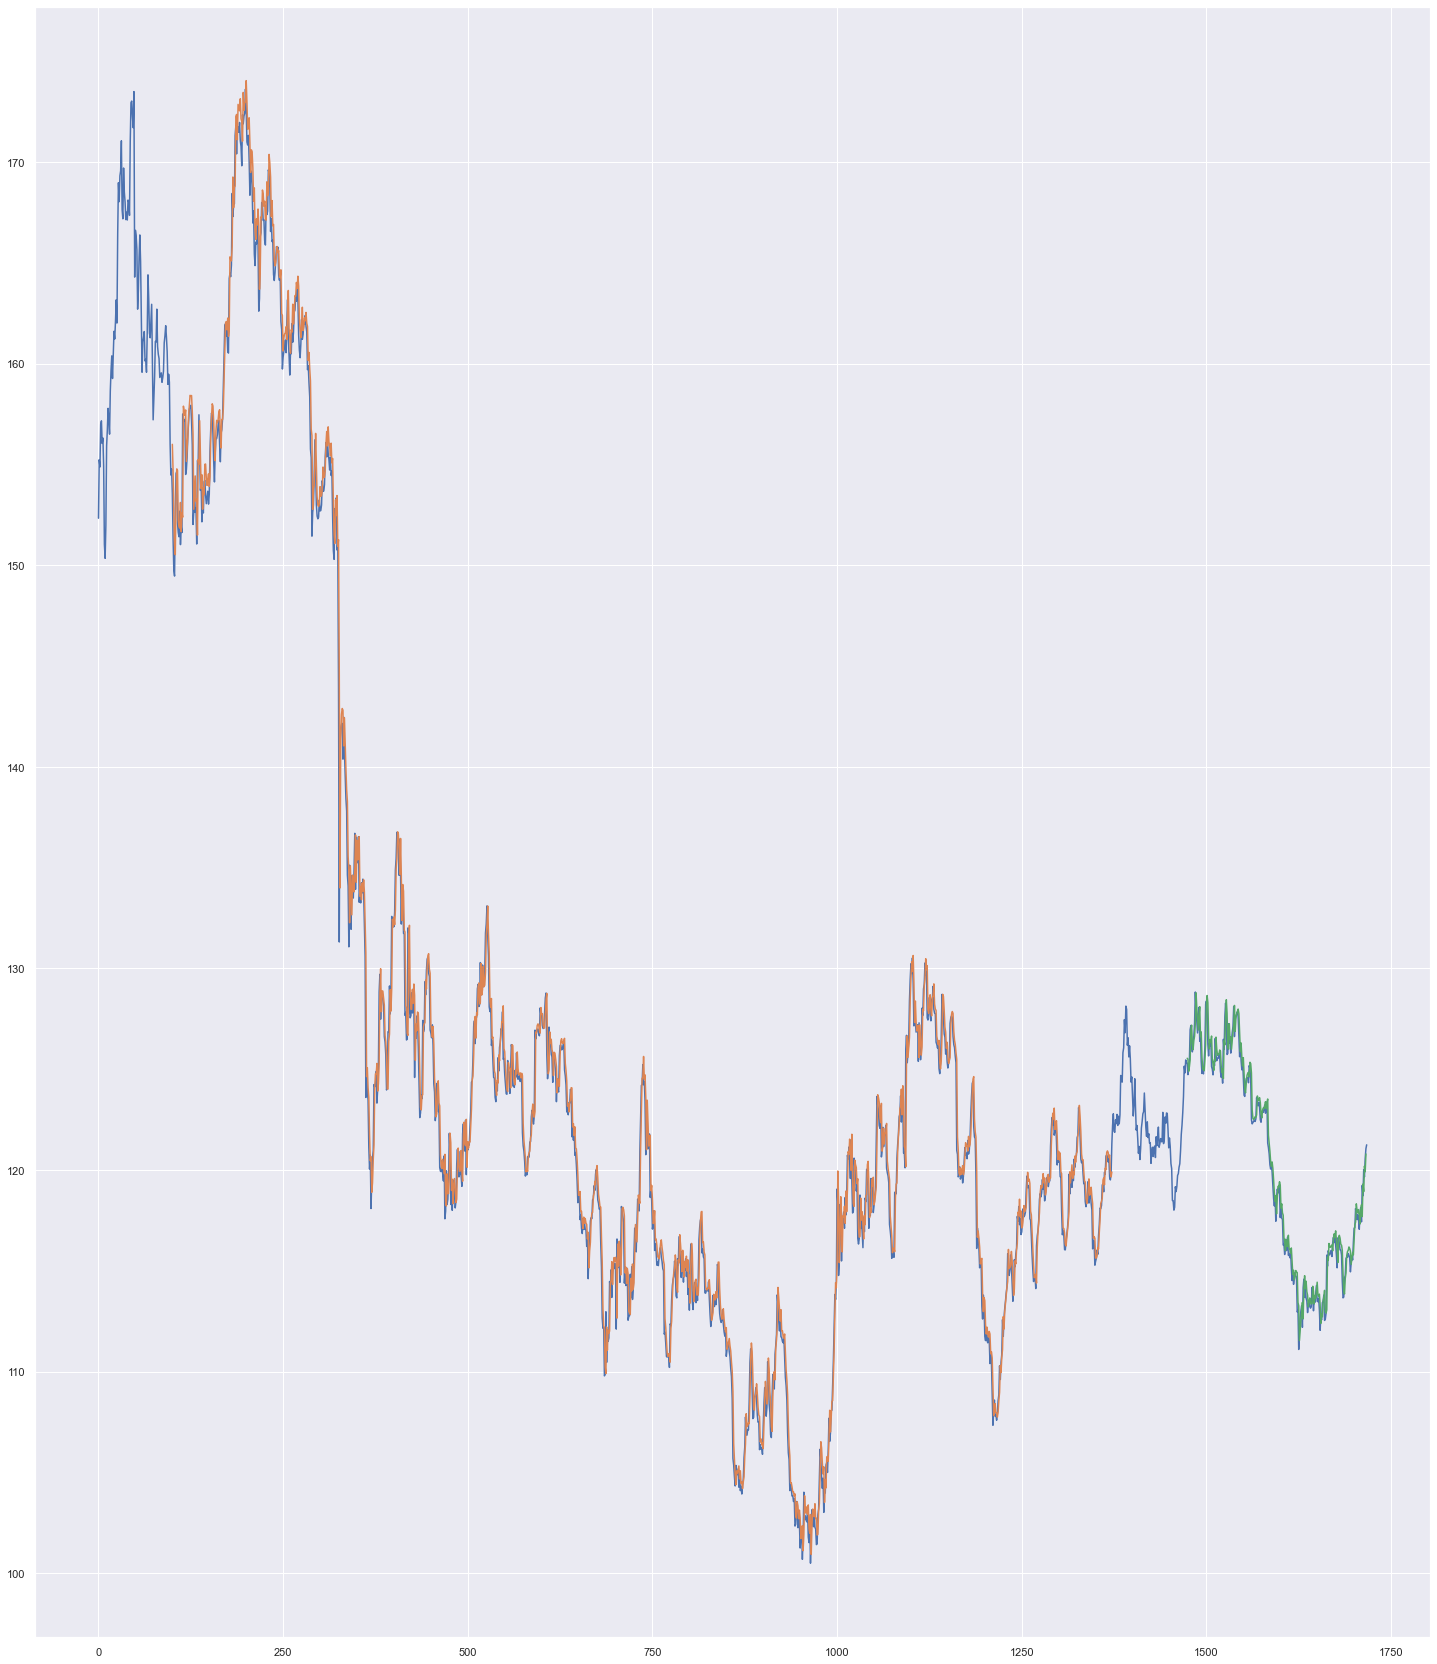

In [84]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(25,30))
look_back=100
trainPredictPlot = numpy.empty_like(df8)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df8)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df8)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df8))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [87]:
#Redimensionnement de x_input
x_input=test_data[:].reshape(1,-1)
x_input.shape

(1, 344)

In [88]:
x_input

array([[0.30488306, 0.29298314, 0.29229931, 0.30077962, 0.29818086,
        0.30447274, 0.29694978, 0.30324166, 0.29804405, 0.30419912,
        0.33087131, 0.32717819, 0.32635755, 0.34632745, 0.34961014,
        0.36875938, 0.35986866, 0.37792374, 0.3757352 , 0.35138834,
        0.35644915, 0.34345508, 0.35097803, 0.34236081, 0.32635755,
        0.32991386, 0.31623585, 0.30337847, 0.31103813, 0.32868279,
        0.30967034, 0.29380389, 0.29694978, 0.28833267, 0.27807416,
        0.28272463, 0.2738339 , 0.28163036, 0.29517168, 0.29954865,
        0.30488306, 0.30625084, 0.31897141, 0.30734511, 0.29585552,
        0.28956364, 0.29941183, 0.288743  , 0.29134185, 0.28491317,
        0.28518667, 0.27123515, 0.27903162, 0.2821775 , 0.27588562,
        0.28190399, 0.28299825, 0.27520179, 0.28929013, 0.28327176,
        0.28901651, 0.29585552, 0.2821775 , 0.28463955, 0.28805906,
        0.28600744, 0.28587063, 0.30584052, 0.28463955, 0.28737521,
        0.30269452, 0.29845438, 0.3054302 , 0.30

In [89]:
#Transformation de x_input el list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [90]:
temp_input

[0.3048830624417582,
 0.2929831446726421,
 0.29229931210095317,
 0.3007796156369906,
 0.29818086037230396,
 0.3044727355427064,
 0.29694978392901406,
 0.3032416590994167,
 0.29804405282390856,
 0.30419912044591535,
 0.33087131266760617,
 0.3271781927618904,
 0.3263575526418061,
 0.34632744704790785,
 0.3496101443084372,
 0.3687593849164357,
 0.3598686587352118,
 0.37792373987246974,
 0.37573520208268074,
 0.3513883415211554,
 0.35644915392628684,
 0.3434550766864304,
 0.3509780283001227,
 0.3423608077915359,
 0.3263575526418061,
 0.32991386499912645,
 0.3162358457634271,
 0.3033784666478121,
 0.31103813006376524,
 0.32868278855583655,
 0.3096703418182145,
 0.29380389421688013,
 0.29694978392901406,
 0.288332672844581,
 0.2780741584178066,
 0.28272463024586747,
 0.2738339040646436,
 0.28163036135097297,
 0.29517168246243064,
 0.2995486486178547,
 0.3048830624417582,
 0.30625083700928957,
 0.3189714085765092,
 0.30734510590418407,
 0.29585551503411955,
 0.28956363986371714,
 0.2994118273

In [91]:
#x_input sous un vecteur de dimension 3
x_input.reshape((1, 344,1))

array([[[0.30488306],
        [0.29298314],
        [0.29229931],
        [0.30077962],
        [0.29818086],
        [0.30447274],
        [0.29694978],
        [0.30324166],
        [0.29804405],
        [0.30419912],
        [0.33087131],
        [0.32717819],
        [0.32635755],
        [0.34632745],
        [0.34961014],
        [0.36875938],
        [0.35986866],
        [0.37792374],
        [0.3757352 ],
        [0.35138834],
        [0.35644915],
        [0.34345508],
        [0.35097803],
        [0.34236081],
        [0.32635755],
        [0.32991386],
        [0.31623585],
        [0.30337847],
        [0.31103813],
        [0.32868279],
        [0.30967034],
        [0.29380389],
        [0.29694978],
        [0.28833267],
        [0.27807416],
        [0.28272463],
        [0.2738339 ],
        [0.28163036],
        [0.29517168],
        [0.29954865],
        [0.30488306],
        [0.30625084],
        [0.31897141],
        [0.30734511],
        [0.29585552],
        [0

In [92]:
# prediction sur les 30 prochains jours
from numpy import array

lst_output=[]
n_steps=343
i=0
while(i<30):
    
    if(len(temp_input)>343):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.29298314 0.29229931 0.30077962 0.29818086 0.30447274 0.29694978
 0.30324166 0.29804405 0.30419912 0.33087131 0.32717819 0.32635755
 0.34632745 0.34961014 0.36875938 0.35986866 0.37792374 0.3757352
 0.35138834 0.35644915 0.34345508 0.35097803 0.34236081 0.32635755
 0.32991386 0.31623585 0.30337847 0.31103813 0.32868279 0.30967034
 0.29380389 0.29694978 0.28833267 0.27807416 0.28272463 0.2738339
 0.28163036 0.29517168 0.29954865 0.30488306 0.30625084 0.31897141
 0.30734511 0.29585552 0.28956364 0.29941183 0.288743   0.29134185
 0.28491317 0.28518667 0.27123515 0.27903162 0.2821775  0.27588562
 0.28190399 0.28299825 0.27520179 0.28929013 0.28327176 0.28901651
 0.29585552 0.2821775  0.28463955 0.28805906 0.28600744 0.28587063
 0.30584052 0.28463955 0.28737521 0.30269452 0.29845438 0.3054302
 0.30515658 0.29462455 0.28176717 0.28846937 0.28286144 0.27109834
 0.26767884 0.24606754 0.24593083 0.23950214 0.24141707 0.25536859
 0.25208589 0.2555054  0.26302835 0.26425933 0.268636

4 day output [[0.29978377]]
5 day input [0.29694978 0.30324166 0.29804405 0.30419912 0.33087131 0.32717819
 0.32635755 0.34632745 0.34961014 0.36875938 0.35986866 0.37792374
 0.3757352  0.35138834 0.35644915 0.34345508 0.35097803 0.34236081
 0.32635755 0.32991386 0.31623585 0.30337847 0.31103813 0.32868279
 0.30967034 0.29380389 0.29694978 0.28833267 0.27807416 0.28272463
 0.2738339  0.28163036 0.29517168 0.29954865 0.30488306 0.30625084
 0.31897141 0.30734511 0.29585552 0.28956364 0.29941183 0.288743
 0.29134185 0.28491317 0.28518667 0.27123515 0.27903162 0.2821775
 0.27588562 0.28190399 0.28299825 0.27520179 0.28929013 0.28327176
 0.28901651 0.29585552 0.2821775  0.28463955 0.28805906 0.28600744
 0.28587063 0.30584052 0.28463955 0.28737521 0.30269452 0.29845438
 0.3054302  0.30515658 0.29462455 0.28176717 0.28846937 0.28286144
 0.27109834 0.26767884 0.24606754 0.24593083 0.23950214 0.24141707
 0.25536859 0.25208589 0.2555054  0.26302835 0.26425933 0.26863628
 0.27096153 0.27957874 0.

8 day output [[0.3094211]]
9 day input [0.33087131 0.32717819 0.32635755 0.34632745 0.34961014 0.36875938
 0.35986866 0.37792374 0.3757352  0.35138834 0.35644915 0.34345508
 0.35097803 0.34236081 0.32635755 0.32991386 0.31623585 0.30337847
 0.31103813 0.32868279 0.30967034 0.29380389 0.29694978 0.28833267
 0.27807416 0.28272463 0.2738339  0.28163036 0.29517168 0.29954865
 0.30488306 0.30625084 0.31897141 0.30734511 0.29585552 0.28956364
 0.29941183 0.288743   0.29134185 0.28491317 0.28518667 0.27123515
 0.27903162 0.2821775  0.27588562 0.28190399 0.28299825 0.27520179
 0.28929013 0.28327176 0.28901651 0.29585552 0.2821775  0.28463955
 0.28805906 0.28600744 0.28587063 0.30584052 0.28463955 0.28737521
 0.30269452 0.29845438 0.3054302  0.30515658 0.29462455 0.28176717
 0.28846937 0.28286144 0.27109834 0.26767884 0.24606754 0.24593083
 0.23950214 0.24141707 0.25536859 0.25208589 0.2555054  0.26302835
 0.26425933 0.26863628 0.27096153 0.27957874 0.29093143 0.2972234
 0.3057037  0.31664617 0

12 day output [[0.3175804]]
13 day input [0.34961014 0.36875938 0.35986866 0.37792374 0.3757352  0.35138834
 0.35644915 0.34345508 0.35097803 0.34236081 0.32635755 0.32991386
 0.31623585 0.30337847 0.31103813 0.32868279 0.30967034 0.29380389
 0.29694978 0.28833267 0.27807416 0.28272463 0.2738339  0.28163036
 0.29517168 0.29954865 0.30488306 0.30625084 0.31897141 0.30734511
 0.29585552 0.28956364 0.29941183 0.288743   0.29134185 0.28491317
 0.28518667 0.27123515 0.27903162 0.2821775  0.27588562 0.28190399
 0.28299825 0.27520179 0.28929013 0.28327176 0.28901651 0.29585552
 0.2821775  0.28463955 0.28805906 0.28600744 0.28587063 0.30584052
 0.28463955 0.28737521 0.30269452 0.29845438 0.3054302  0.30515658
 0.29462455 0.28176717 0.28846937 0.28286144 0.27109834 0.26767884
 0.24606754 0.24593083 0.23950214 0.24141707 0.25536859 0.25208589
 0.2555054  0.26302835 0.26425933 0.26863628 0.27096153 0.27957874
 0.29093143 0.2972234  0.3057037  0.31664617 0.3371632  0.33264943
 0.34140335 0.3396252

16 day output [[0.32563195]]
17 day input [0.3757352  0.35138834 0.35644915 0.34345508 0.35097803 0.34236081
 0.32635755 0.32991386 0.31623585 0.30337847 0.31103813 0.32868279
 0.30967034 0.29380389 0.29694978 0.28833267 0.27807416 0.28272463
 0.2738339  0.28163036 0.29517168 0.29954865 0.30488306 0.30625084
 0.31897141 0.30734511 0.29585552 0.28956364 0.29941183 0.288743
 0.29134185 0.28491317 0.28518667 0.27123515 0.27903162 0.2821775
 0.27588562 0.28190399 0.28299825 0.27520179 0.28929013 0.28327176
 0.28901651 0.29585552 0.2821775  0.28463955 0.28805906 0.28600744
 0.28587063 0.30584052 0.28463955 0.28737521 0.30269452 0.29845438
 0.3054302  0.30515658 0.29462455 0.28176717 0.28846937 0.28286144
 0.27109834 0.26767884 0.24606754 0.24593083 0.23950214 0.24141707
 0.25536859 0.25208589 0.2555054  0.26302835 0.26425933 0.26863628
 0.27096153 0.27957874 0.29093143 0.2972234  0.3057037  0.31664617
 0.3371632  0.33264943 0.34140335 0.33962524 0.33935163 0.33141845
 0.3355218  0.34112983 

20 day output [[0.33431435]]
21 day input [0.35097803 0.34236081 0.32635755 0.32991386 0.31623585 0.30337847
 0.31103813 0.32868279 0.30967034 0.29380389 0.29694978 0.28833267
 0.27807416 0.28272463 0.2738339  0.28163036 0.29517168 0.29954865
 0.30488306 0.30625084 0.31897141 0.30734511 0.29585552 0.28956364
 0.29941183 0.288743   0.29134185 0.28491317 0.28518667 0.27123515
 0.27903162 0.2821775  0.27588562 0.28190399 0.28299825 0.27520179
 0.28929013 0.28327176 0.28901651 0.29585552 0.2821775  0.28463955
 0.28805906 0.28600744 0.28587063 0.30584052 0.28463955 0.28737521
 0.30269452 0.29845438 0.3054302  0.30515658 0.29462455 0.28176717
 0.28846937 0.28286144 0.27109834 0.26767884 0.24606754 0.24593083
 0.23950214 0.24141707 0.25536859 0.25208589 0.2555054  0.26302835
 0.26425933 0.26863628 0.27096153 0.27957874 0.29093143 0.2972234
 0.3057037  0.31664617 0.3371632  0.33264943 0.34140335 0.33962524
 0.33935163 0.33141845 0.3355218  0.34112983 0.36192038 0.36479275
 0.3507044  0.3468745

 0.34125236]
24 day output [[0.34361434]]
25 day input [0.31623585 0.30337847 0.31103813 0.32868279 0.30967034 0.29380389
 0.29694978 0.28833267 0.27807416 0.28272463 0.2738339  0.28163036
 0.29517168 0.29954865 0.30488306 0.30625084 0.31897141 0.30734511
 0.29585552 0.28956364 0.29941183 0.288743   0.29134185 0.28491317
 0.28518667 0.27123515 0.27903162 0.2821775  0.27588562 0.28190399
 0.28299825 0.27520179 0.28929013 0.28327176 0.28901651 0.29585552
 0.2821775  0.28463955 0.28805906 0.28600744 0.28587063 0.30584052
 0.28463955 0.28737521 0.30269452 0.29845438 0.3054302  0.30515658
 0.29462455 0.28176717 0.28846937 0.28286144 0.27109834 0.26767884
 0.24606754 0.24593083 0.23950214 0.24141707 0.25536859 0.25208589
 0.2555054  0.26302835 0.26425933 0.26863628 0.27096153 0.27957874
 0.29093143 0.2972234  0.3057037  0.31664617 0.3371632  0.33264943
 0.34140335 0.33962524 0.33935163 0.33141845 0.3355218  0.34112983
 0.36192038 0.36479275 0.3507044  0.34687458 0.35453423 0.35768023
 0.3662

27 day output [[0.35072947]]
28 day input [0.32868279 0.30967034 0.29380389 0.29694978 0.28833267 0.27807416
 0.28272463 0.2738339  0.28163036 0.29517168 0.29954865 0.30488306
 0.30625084 0.31897141 0.30734511 0.29585552 0.28956364 0.29941183
 0.288743   0.29134185 0.28491317 0.28518667 0.27123515 0.27903162
 0.2821775  0.27588562 0.28190399 0.28299825 0.27520179 0.28929013
 0.28327176 0.28901651 0.29585552 0.2821775  0.28463955 0.28805906
 0.28600744 0.28587063 0.30584052 0.28463955 0.28737521 0.30269452
 0.29845438 0.3054302  0.30515658 0.29462455 0.28176717 0.28846937
 0.28286144 0.27109834 0.26767884 0.24606754 0.24593083 0.23950214
 0.24141707 0.25536859 0.25208589 0.2555054  0.26302835 0.26425933
 0.26863628 0.27096153 0.27957874 0.29093143 0.2972234  0.3057037
 0.31664617 0.3371632  0.33264943 0.34140335 0.33962524 0.33935163
 0.33141845 0.3355218  0.34112983 0.36192038 0.36479275 0.3507044
 0.34687458 0.35453423 0.35768023 0.36629734 0.38749831 0.3757352
 0.36725479 0.35973195 

In [151]:
#valeur de previsiion sur les prochains 30 jours
lst_output

[[0.28730133175849915],
 [0.29077672958374023],
 [0.2939852476119995],
 [0.2969794273376465],
 [0.29978376626968384],
 [0.30241137742996216],
 [0.3048798441886902],
 [0.3072088956832886],
 [0.3094210922718048],
 [0.31154048442840576],
 [0.31359124183654785],
 [0.31559720635414124],
 [0.3175804018974304],
 [0.3195604383945465],
 [0.32155412435531616],
 [0.32357463240623474],
 [0.3256319463253021],
 [0.32773277163505554],
 [0.3298802375793457],
 [0.3320747911930084],
 [0.33431434631347656],
 [0.336594820022583],
 [0.33890992403030396],
 [0.3412523567676544],
 [0.3436143398284912],
 [0.345986932516098],
 [0.3483614921569824],
 [0.35072946548461914],
 [0.3530830442905426],
 [0.35541462898254395]]

In [152]:
#valeur de previsiion sur les prochains 30 jours en dimension normale 
scaler.inverse_transform(lst_output)

array([[121.50460065],
       [121.75868699],
       [121.99326175],
       [122.21216623],
       [122.41719145],
       [122.60929611],
       [122.78976571],
       [122.96004267],
       [123.12177637],
       [123.27672513],
       [123.426656  ],
       [123.57331207],
       [123.7183035 ],
       [123.86306397],
       [124.00882235],
       [124.1565417 ],
       [124.30695192],
       [124.46054326],
       [124.6175445 ],
       [124.77798832],
       [124.94172219],
       [125.10844763],
       [125.27770488],
       [125.44896014],
       [125.62164473],
       [125.79510498],
       [125.96870904],
       [126.14183157],
       [126.31390172],
       [126.48436388]])

on observe la prévision des 30 prochains prix de l'ETF OR avec une hausse des courts

In [93]:
#taille du vecteurs des éléments prédits
len(lst_output)

30

In [131]:
#construction des repère pour la representation vu que notre dataset fait 1718 ligne et on fait une prévision sur 30 jours
day_new=np.arange(1,1719)
day_pred=np.arange(1719,1749)  # Doit être de meme taille que lst_output
 

In [132]:
len(range(1,1719))

1718

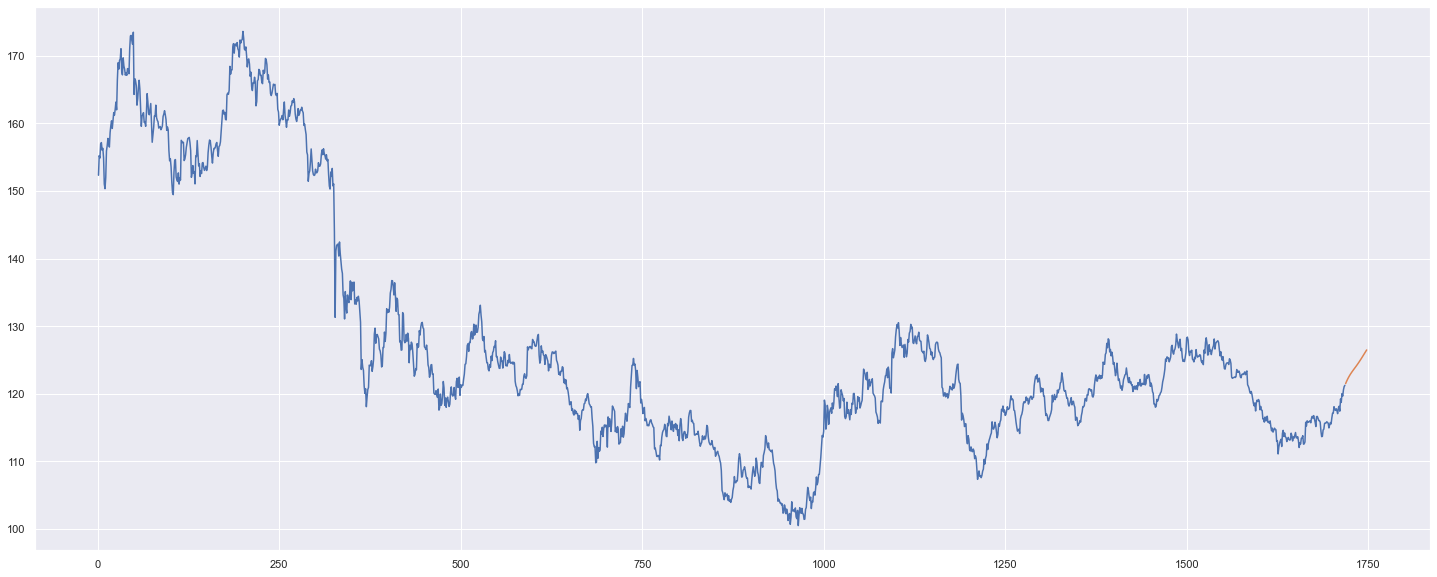

In [133]:
#visualisation des predication
plt.figure(figsize=(25,10))
plt.plot(day_new,scaler.inverse_transform(df8[:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


In [110]:
df8

array([[0.70893176],
       [0.74859794],
       [0.74367384],
       ...,
       [0.27451785],
       [0.28122005],
       [0.2838189 ]])

In [111]:
df9=df8.tolist()
df9

[[0.708931764342337],
 [0.7485979380577492],
 [0.7436738374548784],
 [0.7725344717202234],
 [0.7749966246068027],
 [0.7596770926046077],
 [0.763370226188343],
 [0.7442210813264791],
 [0.6911502983018696],
 [0.6817124239951797],
 [0.7042812788362565],
 [0.7580357986864203],
 [0.7688415569847968],
 [0.7834769281428404],
 [0.7755436496300965],
 [0.7659690771991647],
 [0.7952400246855416],
 [0.8093283708202927],
 [0.8190398602237743],
 [0.8037203418995988],
 [0.8206811541419621],
 [0.8357270573693467],
 [0.8305293416696846],
 [0.8421557400881448],
 [0.8570647400209992],
 [0.8413348947977719],
 [0.9016550006612636],
 [0.9365339907463548],
 [0.9236766253087592],
 [0.9411844762524348],
 [0.9446039810613598],
 [0.964984298112648],
 [0.918342197806836],
 [0.912050226890299],
 [0.9465188900763384],
 [0.9301053080275568],
 [0.9235399135064981],
 [0.9115031881889866],
 [0.9165640005941185],
 [0.9112295730921953],
 [0.9247708942036537],
 [0.9232662984097073],
 [0.9143756679746182],
 [0.964573971213

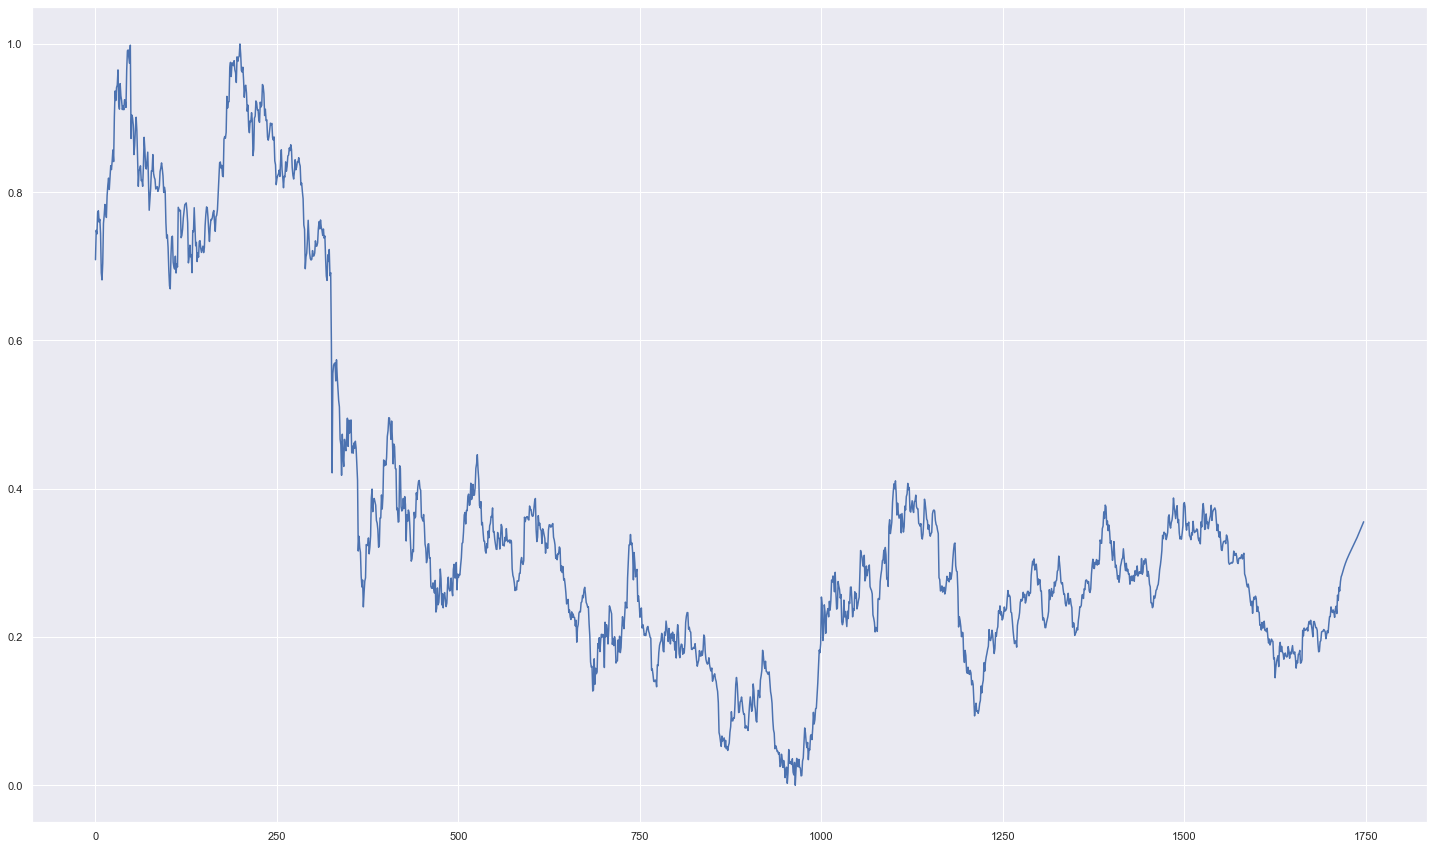

In [122]:
#visualisation d'ensemble données de base + prediction

#df9=df8.tolist()
plt.figure(figsize=(25,15))
df9.extend(lst_output)
plt.plot(df9)

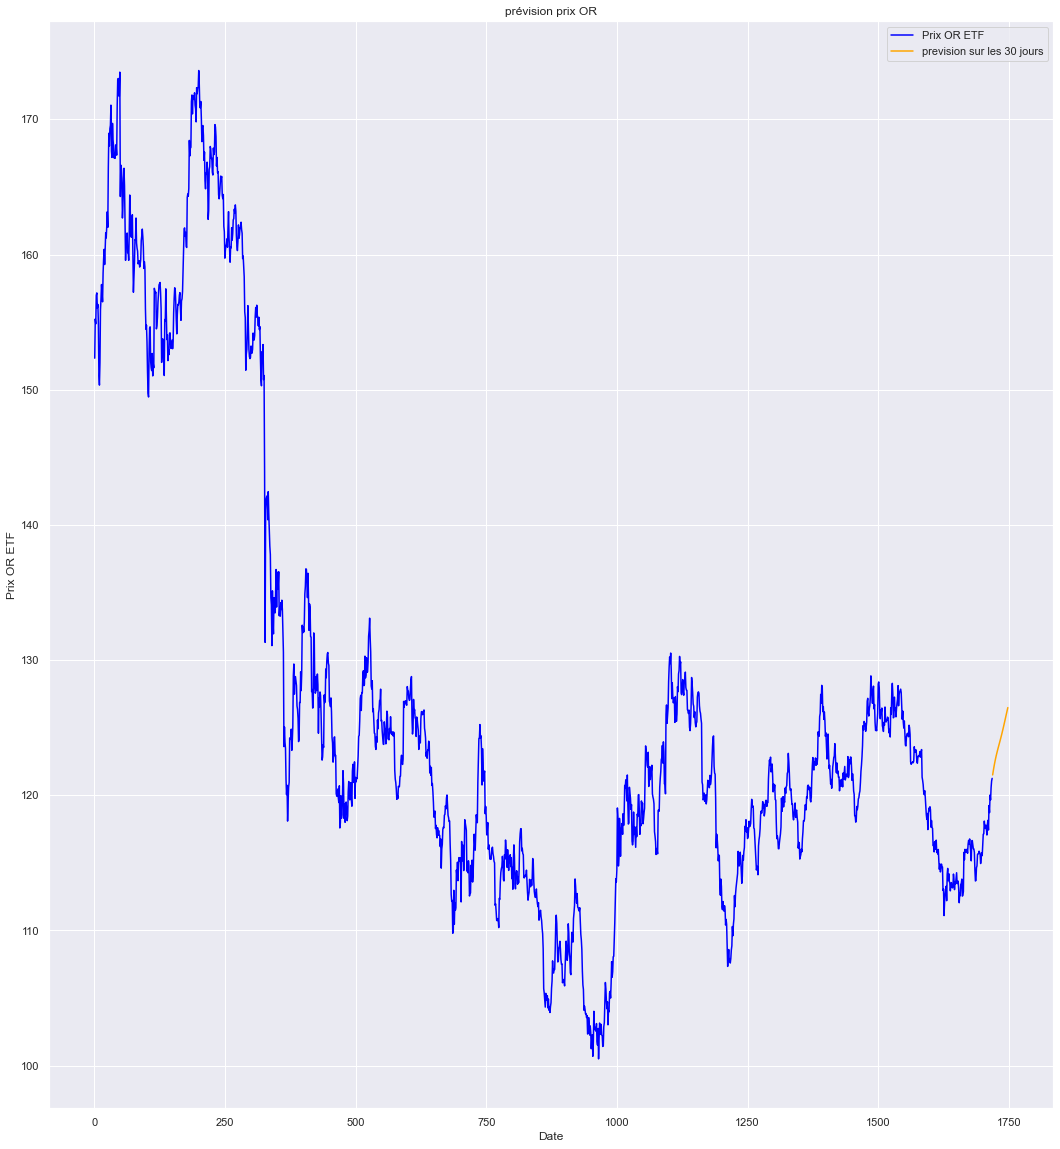

In [150]:
#visualisation graphique
plt.plot(day_new,scaler.inverse_transform(df8[:]), color = 'blue', label = 'Prix OR ETF')
#plt.plot(testPredictPlot, color = 'green', label = 'prediction Prix OR ETF')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color = 'orange', label ='prevision sur les 30 jours')
plt.title('prévision prix OR')
plt.xlabel('Date')
plt.ylabel('Prix OR ETF')
plt.legend()
plt.show()

     Globalement, On observe un hausse du court de l'or ETF sur les 30 prochains jours.